<a href="https://colab.research.google.com/github/srilamaiti/ml_works/blob/main/sales_forecast_str_csc_day_level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installing New Libraries**

In [ ]:
!pip install python-weather
!pip install meteostat
!pip install geopandas
!pip install geopy
!pip install pgeocode
!pip install pyowm
!pip install wwo-hist
!pip install openweathermap_requests
!pip install holidays
!pip install shap
!pip install optuna
!pip install hyperopt 
!pip install yellowbrick
!pip install interpret
!pip install ngboost
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for python-weather: filename=python_weather-0.4.3-py3-none-any.whl size=10344 sha256=ac9f6116f16d4a81956b11f276912dbdccc4fdbaacc156e306f7c0a1beb71da0
  Stored in directory: /root/.cache/pip/wheels/b7/7a/c7/f84adc5c4e3f87615013b2987856750dc521729dc43d656e3d
Successfully built python-weather
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 6.3 MB 48.7 MB/s 
     |████████████████████████████████| 16.7 MB 41.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: http

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 410 kB/s 
     |████████████████████████████████| 349 kB 40.9 MB/s 
     |████████████████████████████████| 41 kB 336 kB/s 
     |████████████████████████████████| 66 kB 4.6 MB/s 
     |████████████████████████████████| 77 kB 5.8 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4049 sha256=5e43ff544bb8722cec51c6c1df301e0830d87584171f114461437bb66d10ec5a
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.13.0
    Uninstallin

# **Importing Libraries**

In [ ]:
from interpret.glassbox import ExplainableBoostingClassifier
from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show
from interpret import perf
from scipy.stats import norm
from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error
import lightgbm as lgb
import matplotlib.pyplot as plt
from datetime import datetime
from meteostat import Point, Daily
from geopy.geocoders import Nominatim
import xgboost
print(xgboost.__version__)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import pgeocode
import numpy as np
import pyowm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import catboost as cb

from wwo_hist import retrieve_hist_data
from openweathermap_requests import OpenWeatherMapRequests
from statsmodels.formula.api import ols
import statsmodels.api as sm
import holidays
import datetime
from datetime import date
from datetime import timedelta
from matplotlib.pyplot import figure
import xgboost as xgb
from xgboost import plot_importance, plot_tree
import matplotlib.ticker as ticker
import shap

0.90


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option("display.precision", 8)

# **Holiday**

In [ ]:
class holiday:
    """
    This class lists both Federal and State holidays for current year 
    and next 9 years.
    """
    def __init__(self):
        """
        This initialization method obtains current year and lists all USA states.
        """
        self.current_year = date.today().year
        self.states_list = [ 'AK', 'AL', 'AR', 'AZ', 'CA', 
                             'CO', 'CT', 'DC', 'DE', 'FL', 
                             'GA', 'HI', 'IA', 'ID', 'IL', 
                             'IN', 'KS', 'KY', 'LA', 'MA', 
                             'MD', 'ME', 'MI', 'MN', 'MO', 
                             'MS', 'MT', 'NC', 'ND', 'NE', 
                             'NH', 'NJ', 'NM', 'NV', 'NY', 
                             'OH', 'OK', 'OR', 'PA', 'RI', 
                             'SC', 'SD', 'TN', 'TX', 'UT', 
                             'VA', 'VT', 'WA', 'WI', 'WV', 'WY'
                            ]
        self.holiday_date_list = []
        self.holiday_details_list = []
        self.df_holiday = pd.DataFrame()
    
    def collect_federal_holiday_list(self):
        """
        This method lists all federal holidays along with observed ones
        in USA in a given year.
        """
        for year in range(self.current_year-3, self.current_year + 11):
            # Print all the holidays in United States in the year 
            for federal_holiday_val in holidays.UnitedStates(years = year, observed = True).items():
                print(f"Federal Holiday :: {str(federal_holiday_val[0])} :: {federal_holiday_val[1]}")
                self.holiday_date_list.append(federal_holiday_val[0])
                self.holiday_details_list.append(('FE', 
                                                  year, 
                                                  str(federal_holiday_val[0]), 
                                                  federal_holiday_val[1]
                                                 )
                                                )

    def collect_state_holiday_list(self):
        """
        This method lists all state holidays along with observed ones
        in USA in a given year which are not federal holidays.
        """
        for year in range(self.current_year-3, self.current_year + 11):
            for state in self.states_list:
                for state_holiday_val in holidays.UnitedStates(years = year, observed = True, subdiv = state).items():
                    if state_holiday_val[0] not in self.holiday_date_list:
                        print(f"State {state} Holiday :: {str(state_holiday_val[0])} :: {state_holiday_val[1]}")
                        self.holiday_date_list.append(state_holiday_val[0])
                        self.holiday_details_list.append((state, 
                                                          year, 
                                                          str(state_holiday_val[0]), 
                                                          state_holiday_val[1]
                                                          )
                                                        )
    
    def get_holiday(self, year):
        """
        This method provides the list of federal and state holidays 
        in a given year. It also writes the data in a csv file with name format 
        as holiday_list_<<4 digit year, comes from input parameter>>.csv.
        """
        yearly_holiday_list = []
        print(f"List of holidays in {year}:-")
        #print(self.holiday_details_list)
        for holiday_val in self.holiday_details_list:
            if holiday_val[1] == year:
                print(f"{holiday_val[0]} :: {holiday_val[1]} :: {holiday_val[2]} :: {holiday_val[3]}")
                yearly_holiday_list.append(holiday_val)
        self.df_holiday = pd.DataFrame(yearly_holiday_list, columns =['level', 'year', 'date', 'holiday_name'])
        #print(self.df_holiday)
        self.df_holiday.to_csv('holiday_list_' + str(year) + '.csv', index = False)
        return self.df_holiday
    
    def __repr__(self):
        """
        This method prints states list and current year.
        """
        print(f"Current Year : {self.current_year}")
        print(f"State List : {self.states_list}")

    def __str__(self):
        """
        This method prints states list and current year.
        """
        print(f"Current Year : {self.current_year}")
        print(f"State List : {self.states_list}") 

current_year = date.today().year
hdy = holiday()
help(holiday)
hdy.collect_federal_holiday_list()
hdy.collect_state_holiday_list()

current_year_hdy = hdy.get_holiday(current_year)
one_year_ago_year_hdy = hdy.get_holiday(current_year-1)
two_year_ago_year_hdy = hdy.get_holiday(current_year-2)
three_year_ago_year_hdy = hdy.get_holiday(current_year-3)
df_holiday_combined = pd.concat([current_year_hdy, one_year_ago_year_hdy, two_year_ago_year_hdy])

Help on class holiday in module __main__:

class holiday(builtins.object)
 |  This class lists both Federal and State holidays for current year 
 |  and next 9 years.
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |      This initialization method obtains current year and lists all USA states.
 |  
 |  __repr__(self)
 |      This method prints states list and current year.
 |  
 |  __str__(self)
 |      This method prints states list and current year.
 |  
 |  collect_federal_holiday_list(self)
 |      This method lists all federal holidays along with observed ones
 |      in USA in a given year.
 |  
 |  collect_state_holiday_list(self)
 |      This method lists all state holidays along with observed ones
 |      in USA in a given year which are not federal holidays.
 |  
 |  get_holiday(self, year)
 |      This method provides the list of federal and state holidays 
 |      in a given year. It also writes the data in a csv file with name format 
 |      as holiday_list_<<4 d

In [ ]:
df_holiday_combined

level  year        date                          holiday_name
0     FE  2022  2022-01-01                        New Year's Day
1     FE  2022  2022-01-17            Martin Luther King Jr. Day
2     FE  2022  2022-02-21                 Washington's Birthday
3     FE  2022  2022-05-30                          Memorial Day
4     FE  2022  2022-06-19  Juneteenth National Independence Day
..   ...   ...         ...                                   ...
44    VA  2020  2020-01-17                       Lee Jackson Day
45    VT  2020  2020-03-03                      Town Meeting Day
46    VT  2020  2020-08-16                 Bennington Battle Day
47    VT  2020  2020-08-17      Bennington Battle Day (Observed)
48    WV  2020  2020-06-20                     West Virginia Day

[152 rows x 4 columns]

# **Setting up the Period**

In [ ]:
# Set time period
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2022, 10, 31)

# **Getting Weather Data at Day and Zipcode Level**

In [ ]:
df_weather = pd.read_csv('result_3zip_weather.csv')
df_weather.columns = [col.lower() for col in df_weather.columns]
df_weather['zip5'] = df_weather['zip5'].astype(str)
df_weather['zip5'] = df_weather['zip5'].apply(lambda x : x.zfill(5))
df_weather.head()

zip5      day_dt  high_temperature_amt  low_temperature_amt  sky_cd  \
0  01749  2019-03-20                  50.8                 24.3       1   
1  02747  2019-03-20                  52.2                 21.7       1   
2  05673  2019-03-20                  44.9                 16.9       3   
3  01749  2019-03-21                  51.5                 32.2      26   
4  02747  2019-03-21                  53.1                 31.7      12   

   precipitation_cd  temperature_cd  air_cd uv_index_dsc  wind_speed_amt  \
0                 0               6      30          LOW            14.9   
1                 0               6      22          LOW            17.9   
2                 0               6       0          LOW            11.9   
3                66               6      30      MINIMAL            14.9   
4                66               6      30      MINIMAL            32.8   

   humidity_pct  dew_point_amt  rain_fall_amt  snow_fall_amt  \
0            30           18.8            0.0            0.0   
1            29           19.2            0.0            0.0   
2            47           23.1            0.0            0.0   
3            41           26.5            0.5            0.0   
4            38           26.1            0.5            0.0   

   comfort_index_amt  precipitation_probability_pct feed_cd  \
0               44.8                              3     OTH   
1               46.1                              0     OTH   
2               37.1                              6     OTH   
3               46.1                             93     OTH   
4               46.1                             99     OTH   

                  last_update_ts  
0  2019-03-20 07:31:11.000 -0600  
1  2019-03-20 07:31:11.000 -0600  
2  2019-03-20 07:31:11.000 -0600  
3  2019-03-21 07:31:31.000 -0600  
4  2019-03-21 07:31:31.000 -0600

In [ ]:
df_weather['zip5'].drop_duplicates()

0    01749
1    02747
2    05673
Name: zip5, dtype: object

# **Loading 5 digit zip codes for Shaws stores.**

In [ ]:
df_zip = pd.read_csv('zipcode.txt')
df_zip.columns = [col.lower() for col in df_zip.columns]
df_zip = df_zip.drop_duplicates()
df_zip['zipcode'] = df_zip['zipcode'].apply(lambda x : x.replace("'",""))
df_zip.head()

zipcode
0   05602
1   02067
2   04530
3   02199
4   02126

In [ ]:
df_zip[df_zip.zipcode == '03458']

zipcode
148   03458

# **Loading Shaw's Stores Store-Zipcode Combination Data**

In [ ]:
df_str_zip = pd.read_csv('store_zipcode.txt')
df_str_zip['zip_code'] = df_str_zip['zip_code'].astype(str)
df_str_zip['zip_code'] =  df_str_zip['zip_code'].apply(lambda x : x.zfill(5))
df_str_zip.columns = ['store_id', 'zip_code']
df_str_zip.rename(columns={'zip_code':'zip5'}, inplace = True)
df_str_zip.head()

store_id   zip5
0       121  05602
1       418  02067
2       553  04530
3       602  02199
4       604  02126

In [ ]:
df_str_zip[df_str_zip.zip5 == '03458']

store_id   zip5
148      4694  03458

# **Combining weather and zip code data together.**

In [ ]:
df_weather = pd.merge(df_weather, df_str_zip, how = 'inner', on = 'zip5')

In [ ]:
df_weather.columns

Index(['zip5', 'day_dt', 'high_temperature_amt', 'low_temperature_amt',
       'sky_cd', 'precipitation_cd', 'temperature_cd', 'air_cd',
       'uv_index_dsc', 'wind_speed_amt', 'humidity_pct', 'dew_point_amt',
       'rain_fall_amt', 'snow_fall_amt', 'comfort_index_amt',
       'precipitation_probability_pct', 'feed_cd', 'last_update_ts',
       'store_id'],
      dtype='object')

In [ ]:
df_weather = df_weather [['zip5', 'day_dt', 'high_temperature_amt', 'low_temperature_amt',
       'sky_cd', 'precipitation_cd', 'temperature_cd', 'air_cd',
       'uv_index_dsc', 'wind_speed_amt', 'humidity_pct', 'dew_point_amt',
       'rain_fall_amt', 'snow_fall_amt', 'comfort_index_amt',
       'precipitation_probability_pct', 'feed_cd', 
       'store_id']]
df_weather = df_weather[df_weather['zip5'].isin(['02747','05673','05764'])]

In [ ]:
df_weather.iloc[0]

zip5                                  02747
day_dt                           2019-03-20
high_temperature_amt                   52.2
low_temperature_amt                    21.7
sky_cd                                    1
precipitation_cd                          0
temperature_cd                            6
air_cd                                   22
uv_index_dsc                            LOW
wind_speed_amt                         17.9
humidity_pct                             29
dew_point_amt                          19.2
rain_fall_amt                           0.0
snow_fall_amt                           0.0
comfort_index_amt                      46.1
precipitation_probability_pct             0
feed_cd                                 OTH
store_id                                619
Name: 1329, dtype: object

# **Getting historical min, max and avg temp weather data on a particular day and zipcode level.**

In [ ]:
us_zip = pgeocode.Nominatim('us')
temp_df = pd.DataFrame()
addr_weather_df = pd.DataFrame()
lat_long_list = []
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2022, 10, 24)
err_list = []
for zip in df_zip['zipcode'].values.tolist():
    print(zip)
    lat, long = us_zip.query_postal_code(zip)[9:11][0], us_zip.query_postal_code(zip)[9:11][1]
    lat_long_list.append((lat, long))
    location = Point(lat, long)
    data = Daily(location, start, end)
    data = data.fetch()
    if len(data) == 0:
        err_list.append(zip)
        continue
    #data.reset_index(inplace = True)
    data['lat'] = lat
    data['long'] = long
    data['zip'] = zip

    data['tmin'] = data['tmin'].apply(lambda x : ((9 * x) / 5) + 32)
    data['tmax'] = data['tmax'].apply(lambda x : ((9 * x) / 5) + 32)
    data['tavg'] = data['tavg'].apply(lambda x : ((9 * x) / 5) + 32)

    addr_weather_df = addr_weather_df.append(data)
    data.plot(y=['tavg', 'tmin', 'tmax'])
    plt.title('zip_code ' + zip)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()
    
#addr_weather_df['time'] = addr_weather_df['time'].apply(lambda x : x.strftime("%Y-%m-%d"))
addr_weather_df

# **Error List**

In [ ]:
err_list

['04426', '03818', '03584']

Combining weather with weather at a zipcode.

# **Combining Weather Data along with Historical Weather Details**

In [ ]:
addr_weather_df.reset_index(inplace = True)
addr_weather_df['time'] = addr_weather_df['time'].apply(lambda x : x.strftime("%Y-%m-%d"))
df_weather_consolidated = pd.merge(df_weather, addr_weather_df, how = 'inner', left_on = ['zip5', 'day_dt'], right_on = ['zip', 'time'])
df_weather_consolidated

zip5      day_dt  high_temperature_amt  low_temperature_amt  sky_cd  \
0     02747  2019-03-20                  52.2                 21.7       1   
1     02747  2019-03-21                  53.1                 31.7      12   
2     02747  2019-03-22                  45.1                 38.6      18   
3     02747  2019-03-23                  52.2                 32.7      32   
4     02747  2019-03-24                  59.1                 25.7       3   
...     ...         ...                   ...                  ...     ...   
2625  05673  2022-10-20                  53.7                 34.2      17   
2626  05673  2022-10-21                  55.3                 29.9       3   
2627  05673  2022-10-22                  62.3                 35.9       1   
2628  05673  2022-10-23                  62.1                 35.9       3   
2629  05673  2022-10-24                  57.1                 41.6      18   

      precipitation_cd  temperature_cd  air_cd uv_index_dsc  wind_speed_amt  \
0                    0               6      22          LOW            17.9   
1                   66               6      30      MINIMAL            32.8   
2                    7               6      32      MINIMAL            29.8   
3                    0               6      30          LOW            35.8   
4                    0               7      30          LOW            32.8   
...                ...             ...     ...          ...             ...   
2625                 0               6       0      MINIMAL            29.8   
2626                 0               6       0      MINIMAL            17.9   
2627                 0               8      20      MINIMAL            14.9   
2628                65               6      20      MINIMAL             3.0   
2629                 5               6      32      MINIMAL             3.0   

      humidity_pct  dew_point_amt  rain_fall_amt  snow_fall_amt  \
0               29           19.2            0.0            0.0   
1               38           26.1            0.5            0.0   
2               83           37.1            0.2            0.0   
3               36           23.2            0.0            0.0   
4               23           19.2            0.0            0.0   
...            ...            ...            ...            ...   
2625            50           32.7            0.0            0.0   
2626            43           31.4            0.0            0.0   
2627            46           39.4            0.0            0.0   
2628            45           40.4            0.1            0.0   
2629            90           53.1            0.0            0.0   

      comfort_index_amt  precipitation_probability_pct feed_cd  store_id  \
0                  46.1                              0     OTH       619   
1                  46.1                             99     OTH       619   
2                  36.1                             75     OTH       619   
3                  43.1                              3     OTH       619   
4                  53.7                             19     OTH       619   
...                 ...                            ...     ...       ...   
2625               45.2                             12     OTH       326   
2626               50.1                              1     OTH       326   
2627               60.4                              2     OTH       326   
2628               62.3                             69     OTH       326   
2629               56.1                             54     OTH       326   

      index        time   tavg   tmin   tmax  prcp  snow   wdir  wspd  wpgt  \
0     10991  2019-03-20  35.42  21.02  48.02   0.0   NaN    NaN   9.9   NaN   
1     10992  2019-03-21  40.82  26.96  48.02   0.0   NaN  123.0  13.2   NaN   
2     10993  2019-03-22  41.18  37.94  44.06   NaN   NaN  333.0  23.2   NaN   
3     10994  2019-03-23  38.12  30.92  46.94   NaN   NaN  283.0  31.6   NaN   
4     10

In [ ]:
df_weather_consolidated['avg_temperature_amt'] = (df_weather_consolidated['high_temperature_amt'] + df_weather_consolidated['low_temperature_amt'] )/ 2
df_weather_consolidated['historic_tmin'] = df_weather_consolidated['tmin']
df_weather_consolidated['historic_tmax'] = df_weather_consolidated['tmax']
df_weather_consolidated['historic_tavg'] = df_weather_consolidated['tavg']

# **Combining Weather and Holiday Data Together**

In [ ]:
df_weather_consolidated = pd.merge(df_weather_consolidated, df_holiday_combined[df_holiday_combined.level == 'FE'], how = 'left', left_on = 'day_dt', right_on = 'date')
df_weather_consolidated.columns

Index(['zip5', 'day_dt', 'high_temperature_amt', 'low_temperature_amt',
       'sky_cd', 'precipitation_cd', 'temperature_cd', 'air_cd',
       'uv_index_dsc', 'wind_speed_amt', 'humidity_pct', 'dew_point_amt',
       'rain_fall_amt', 'snow_fall_amt', 'comfort_index_amt',
       'precipitation_probability_pct', 'feed_cd', 'store_id', 'index', 'time',
       'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres',
       'tsun', 'lat', 'long', 'zip', 'avg_temperature_amt', 'historic_tmin',
       'historic_tmax', 'historic_tavg', 'level', 'year', 'date',
       'holiday_name'],
      dtype='object')

In [ ]:
df_weather_consolidated.iloc[0]

zip5                                  02747
day_dt                           2019-03-20
high_temperature_amt                   52.2
low_temperature_amt                    21.7
sky_cd                                    1
precipitation_cd                          0
temperature_cd                            6
air_cd                                   22
uv_index_dsc                            LOW
wind_speed_amt                         17.9
humidity_pct                             29
dew_point_amt                          19.2
rain_fall_amt                           0.0
snow_fall_amt                           0.0
comfort_index_amt                      46.1
precipitation_probability_pct             0
feed_cd                                 OTH
store_id                                619
index                                 10991
time                             2019-03-20
tavg                                  35.42
tmin                                  21.02
tmax                            

In [ ]:
'''
df_weather_refined = df_weather_consolidated[['zip5', 'day_dt', 'high_temperature_amt', 'low_temperature_amt', 'avg_temperature_amt',
                                              'historic_tmin', 'historic_tmax', 'historic_tavg', 'date', 'store_id']]
'''
df_weather_consolidated['holiday_ind'] = np.where(df_weather_consolidated['date'].isna(),0,1)
df_weather_refined = df_weather_consolidated[['zip5', 'day_dt', 'high_temperature_amt', 'low_temperature_amt', 'avg_temperature_amt',
                                              'historic_tmin', 'historic_tmax', 'historic_tavg', 'holiday_ind', 'store_id']]

In [ ]:
df_weather_refined.iloc[0]

zip5                         02747
day_dt                  2019-03-20
high_temperature_amt          52.2
low_temperature_amt           21.7
avg_temperature_amt          36.95
historic_tmin                21.02
historic_tmax                48.02
historic_tavg                35.42
holiday_ind                      0
store_id                       619
Name: 0, dtype: object

In [ ]:
df_weather_refined[df_weather_refined.zip5.isin(['02747','05673','05764'])]

zip5      day_dt  high_temperature_amt  low_temperature_amt  \
0     02747  2019-03-20                  52.2                 21.7   
1     02747  2019-03-21                  53.1                 31.7   
2     02747  2019-03-22                  45.1                 38.6   
3     02747  2019-03-23                  52.2                 32.7   
4     02747  2019-03-24                  59.1                 25.7   
...     ...         ...                   ...                  ...   
2625  05673  2022-10-20                  53.7                 34.2   
2626  05673  2022-10-21                  55.3                 29.9   
2627  05673  2022-10-22                  62.3                 35.9   
2628  05673  2022-10-23                  62.1                 35.9   
2629  05673  2022-10-24                  57.1                 41.6   

      avg_temperature_amt  historic_tmin  historic_tmax  historic_tavg  \
0                   36.95          21.02          48.02          35.42   
1                   42.40          26.96          48.02          40.82   
2                   41.85          37.94          44.06          41.18   
3                   42.45          30.92          46.94          38.12   
4                   42.40          26.06          53.06          40.82   
...                   ...            ...            ...            ...   
2625                43.95          37.40          50.00          43.70   
2626                42.60          35.60          57.92          46.22   
2627                49.10          33.98          69.80          51.44   
2628                49.00          37.04          68.00          51.26   
2629                49.35          50.00          60.80          55.40   

      holiday_ind  store_id  
0               0       619  
1               0       619  
2               0       619  
3               0       619  
4               0       619  
...           ...       ...  
2625            0       326  
2626            0       326  
2627            0       326  
2628            0       326  
2629            0       326  

[2630 rows x 10 columns]

In [ ]:
df_weather_refined.columns

Index(['zip5', 'day_dt', 'high_temperature_amt', 'low_temperature_amt',
       'avg_temperature_amt', 'historic_tmin', 'historic_tmax',
       'historic_tavg', 'holiday_ind', 'store_id'],
      dtype='object')

# **Get Transaction Data at Store-CSC-Day Level**

In [ ]:
#df_txn_1 = pd.read_csv('result_txn_1.csv')
#df_txn_2 = pd.read_csv('result_txn_2.csv')
#df_txn_1.columns = [col.lower() for col in df_txn_1.columns]
#df_txn_2.columns = [col.lower() for col in df_txn_2.columns]
df_txn = pd.read_csv('result_txn_619_326_3087.csv')
df_txn.columns = [col.lower() for col in df_txn.columns]
df_txn['eff_price'] = np.where((df_txn['promo_unit_prc'] == 0) | (df_txn['promo_unit_prc'].isna()), df_txn['reg_unit_prc'], df_txn['promo_unit_prc'])
df_txn['promo_depth'] = df_txn['eff_price'] / df_txn['reg_unit_prc']
df_txn.head()

txn_dte  consumer_selling_cd  smic_group_cd  store_id  reg_unit_prc  \
0  2020-01-01               146385             25       619          1.99   
1  2020-01-01               146393             25       619          1.99   
2  2020-01-01               146399             25       619          1.99   
3  2020-01-01               146408             25       619          2.69   
4  2020-01-01               146408             25      3087          2.69   

   promo_unit_prc  total_gross_amt  total_item_qty  total_mkdn_qty  \
0            1.79             9.95               5               5   
1             NaN            15.92               8               8   
2             NaN            37.81              19              21   
3             NaN             5.38               2               0   
4             NaN            13.45               5               0   

   total_mkdn_amt  total_net_amt  total_mkdn_wod_alloc_amt  \
0           -1.00           8.95                       0.0   
1           -2.58          13.34                       0.0   
2           -6.45          31.36                       0.0   
3            0.00           5.38                       0.0   
4            0.00          13.45                       0.0   

   total_mkdn_pod_alloc_amt  eff_price  promo_depth  
0                       0.0       1.79   0.89949749  
1                       0.0       1.99   1.00000000  
2                       0.0       1.99   1.00000000  
3                       0.0       2.69   1.00000000  
4                       0.0       2.69   1.00000000

In [ ]:
df_txn[df_txn['promo_depth'] < 1].head()

txn_dte  consumer_selling_cd  smic_group_cd  store_id  reg_unit_prc  \
0   2020-01-01               146385             25       619          1.99   
15  2020-01-01               322058             11       619          3.99   
17  2020-01-01               322058             11      3087          3.99   
18  2020-01-01               322060             11       326          4.99   
29  2020-01-01               460913             11       326          4.99   

    promo_unit_prc  total_gross_amt  total_item_qty  total_mkdn_qty  \
0             1.79             9.95               5               5   
15            2.99            10.47               3               3   
17            2.99             6.98               2               2   
18            4.69             4.99               1               1   
29            4.69             4.99               1               1   

    total_mkdn_amt  total_net_amt  total_mkdn_wod_alloc_amt  \
0             -1.0           8.95                       0.0   
15            -1.5           8.97                       0.0   
17            -1.0           5.98                       0.0   
18            -0.3           4.69                       0.0   
29            -0.3           4.69                       0.0   

    total_mkdn_pod_alloc_amt  eff_price  promo_depth  
0                        0.0       1.79   0.89949749  
15                       0.0       2.99   0.74937343  
17                       0.0       2.99   0.74937343  
18                       0.0       4.69   0.93987976  
29                       0.0       4.69   0.93987976

In [ ]:
len(df_txn[['consumer_selling_cd']].drop_duplicates())

33

In [ ]:
df_weather_refined['day_dt'].min(), df_txn['txn_dte'].min()

('2019-03-20', '2020-01-01')

In [ ]:
df_txn.groupby(['store_id','consumer_selling_cd']).agg({'txn_dte': np.min})

txn_dte
store_id consumer_selling_cd            
326      146399               2020-01-03
         146408               2020-01-03
         146629               2020-01-02
         146761               2020-01-03
         146835               2020-01-03
         147065               2020-01-01
         322059               2020-01-01
         322060               2020-01-01
         322082               2020-01-01
         322087               2020-01-02
         322325               2020-01-03
         322389               2020-01-02
         322390               2020-01-01
         322455               2020-01-02
         410691               2020-01-01
         460651               2020-01-01
         460913               2020-01-01
         461103               2020-12-18
         466564               2020-01-01
         778229               2020-01-01
619      146385               2020-01-01
         146393               2020-01-01
         146399               2020-01-01
         146408               2020-01-01
         146453               2020-01-01
         146629               2020-01-01
         146675               2020-01-01
         146761               2020-01-02
         146835               2020-01-01
         322045               2020-01-01
         322058               2020-01-01
         322059               2020-01-01
         322060               2020-01-01
         322082               2020-01-02
         322087               2020-01-01
         322554               2020-01-01
         322557               2020-01-03
         322625               2020-01-02
         413364               2020-07-12
         460913               2020-01-02
3087     146404               2020-01-01
         146408               2020-01-01
         146453               2020-01-02
         146629               2020-01-01
         146675               2020-01-04
         146761               2020-01-03
         146835               2020-01-01
         322045               2020-01-02
         322058               2020-01-01
         322059               2020-01-02
         322060               2020-01-04
         322082               2020-01-01
         322087               2020-01-04
         322325               2020-01-02
         322554               2020-01-01
         322557               2020-01-01
         437609               2020-01-02
         460913               2020-01-01
         464561               2020-01-02
         778229               2020-01-01

In [ ]:
top_csc_list = df_txn['consumer_selling_cd'].drop_duplicates().tolist()
top_csc_list

[146385,
 146393,
 146399,
 146408,
 146404,
 146453,
 146629,
 146675,
 146835,
 147065,
 322045,
 322059,
 322058,
 322060,
 322082,
 322087,
 322390,
 322554,
 322557,
 410691,
 460651,
 460913,
 466564,
 778229,
 146761,
 322325,
 322389,
 322455,
 322625,
 437609,
 464561,
 413364,
 461103]

In [ ]:
df_weather_txn_combined = pd.merge(df_weather_refined[df_weather_refined.day_dt >= '2020-01-01'], df_txn, how='inner', left_on=['day_dt', 'store_id'], right_on=['txn_dte', 'store_id'])
df_weather_txn_combined.drop(columns = ['txn_dte'], axis = 1, inplace = True)
df_weather_txn_combined.columns

Index(['zip5', 'day_dt', 'high_temperature_amt', 'low_temperature_amt',
       'avg_temperature_amt', 'historic_tmin', 'historic_tmax',
       'historic_tavg', 'holiday_ind', 'store_id', 'consumer_selling_cd',
       'smic_group_cd', 'reg_unit_prc', 'promo_unit_prc', 'total_gross_amt',
       'total_item_qty', 'total_mkdn_qty', 'total_mkdn_amt', 'total_net_amt',
       'total_mkdn_wod_alloc_amt', 'total_mkdn_pod_alloc_amt', 'eff_price',
       'promo_depth'],
      dtype='object')

In [ ]:
df_weather_txn_combined.iloc[0]

zip5                             02747
day_dt                      2020-01-01
high_temperature_amt              41.2
low_temperature_amt               29.7
avg_temperature_amt              35.45
historic_tmin                    33.08
historic_tmax                    42.08
historic_tavg                    37.76
holiday_ind                          1
store_id                           619
consumer_selling_cd             146385
smic_group_cd                       25
reg_unit_prc                      1.99
promo_unit_prc                    1.79
total_gross_amt                   9.95
total_item_qty                       5
total_mkdn_qty                       5
total_mkdn_amt                    -1.0
total_net_amt                     8.95
total_mkdn_wod_alloc_amt           0.0
total_mkdn_pod_alloc_amt           0.0
eff_price                         1.79
promo_depth                 0.89949749
Name: 0, dtype: object

In [ ]:
#try with z transformation as well and add info on the dataset
df_weather_txn_combined['log_total_item_qty'] = np.log(df_weather_txn_combined['total_item_qty'] + 1)
df_weather_txn_combined['log_avg_temperature_amt'] = np.log(df_weather_txn_combined['avg_temperature_amt'] + 1)
df_weather_txn_combined['log_historic_tavg'] = np.log(df_weather_txn_combined['historic_tavg'] + 1)
df_weather_txn_combined['log_historic_tmin'] = np.log(df_weather_txn_combined['historic_tmin'] + 1)
df_weather_txn_combined['log_historic_tmax'] = np.log(df_weather_txn_combined['historic_tmax'] + 1)
df_weather_txn_combined['log_eff_price'] = np.log(df_weather_txn_combined['eff_price'] + 1)
df_weather_txn_combined.set_index('day_dt', inplace = True)


invalid value encountered in log


In [ ]:
df_weather_txn_combined.columns

Index(['zip5', 'high_temperature_amt', 'low_temperature_amt',
       'avg_temperature_amt', 'historic_tmin', 'historic_tmax',
       'historic_tavg', 'holiday_ind', 'store_id', 'consumer_selling_cd',
       'smic_group_cd', 'reg_unit_prc', 'promo_unit_prc', 'total_gross_amt',
       'total_item_qty', 'total_mkdn_qty', 'total_mkdn_amt', 'total_net_amt',
       'total_mkdn_wod_alloc_amt', 'total_mkdn_pod_alloc_amt', 'eff_price',
       'promo_depth', 'log_total_item_qty', 'log_avg_temperature_amt',
       'log_historic_tavg', 'log_historic_tmin', 'log_historic_tmax',
       'log_eff_price'],
      dtype='object')

In [ ]:
df_weather_txn_combined.iloc[0]

zip5                             02747
high_temperature_amt              41.2
low_temperature_amt               29.7
avg_temperature_amt              35.45
historic_tmin                    33.08
historic_tmax                    42.08
historic_tavg                    37.76
holiday_ind                          1
store_id                           619
consumer_selling_cd             146385
smic_group_cd                       25
reg_unit_prc                      1.99
promo_unit_prc                    1.79
total_gross_amt                   9.95
total_item_qty                       5
total_mkdn_qty                       5
total_mkdn_amt                    -1.0
total_net_amt                     8.95
total_mkdn_wod_alloc_amt           0.0
total_mkdn_pod_alloc_amt           0.0
eff_price                         1.79
promo_depth                 0.89949749
log_total_item_qty          1.79175947
log_avg_temperature_amt     3.59594146
log_historic_tavg           3.65738879
log_historic_tmin        

In [ ]:
orig_df_weather_txn_combined = df_weather_txn_combined.copy()
df_weather_txn_combined = df_weather_txn_combined[['zip5', 'store_id', 'consumer_selling_cd', 'promo_depth', 'log_avg_temperature_amt', 'log_historic_tavg', 'log_historic_tmin', 'log_historic_tmax','log_eff_price', 'log_total_item_qty']]

In [ ]:
df_weather_txn_combined.iloc[0]

zip5                            02747
store_id                          619
consumer_selling_cd            146385
promo_depth                0.89949749
log_avg_temperature_amt    3.59594146
log_historic_tavg          3.65738879
log_historic_tmin           3.5287107
log_historic_tmax          3.76305885
log_eff_price               1.0260416
log_total_item_qty         1.79175947
Name: 2020-01-01, dtype: object

In [ ]:
df_weather_txn_combined['transaction_date'] = df_weather_txn_combined.index
df_weather_txn_combined['transaction_date'] = pd.to_datetime(df_weather_txn_combined['transaction_date'])
df_weather_txn_combined['dayofweek'] = df_weather_txn_combined['transaction_date'].dt.dayofweek
df_weather_txn_combined['quarter'] = df_weather_txn_combined['transaction_date'].dt.quarter
df_weather_txn_combined['month'] = df_weather_txn_combined['transaction_date'].dt.month
df_weather_txn_combined['year'] = df_weather_txn_combined['transaction_date'].dt.year
df_weather_txn_combined['dayofyear'] = df_weather_txn_combined['transaction_date'].dt.dayofyear
df_weather_txn_combined['dayofmonth'] = df_weather_txn_combined['transaction_date'].dt.day
df_weather_txn_combined['weekofyear'] = df_weather_txn_combined['transaction_date'].dt.isocalendar().week


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [ ]:
df_weather_txn_combined['transaction_date'] = pd.to_datetime(df_weather_txn_combined['transaction_date'].astype(str), format='%Y-%m-%d')
df_weather_txn_combined['transaction_date'] = df_weather_txn_combined['transaction_date'].astype(int)

casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.


In [ ]:
df_weather_txn_combined.drop(columns = ['transaction_date'], axis = 1, inplace=True)

In [ ]:
df_weather_txn_combined.iloc[0]

zip5                            02747
store_id                          619
consumer_selling_cd            146385
promo_depth                0.89949749
log_avg_temperature_amt    3.59594146
log_historic_tavg          3.65738879
log_historic_tmin           3.5287107
log_historic_tmax          3.76305885
log_eff_price               1.0260416
log_total_item_qty         1.79175947
dayofweek                           2
quarter                             1
month                               1
year                             2020
dayofyear                           1
dayofmonth                          1
weekofyear                          1
Name: 2020-01-01, dtype: object

In [ ]:
df_weather_txn_combined.columns

Index(['zip5', 'store_id', 'consumer_selling_cd', 'promo_depth',
       'log_avg_temperature_amt', 'log_historic_tavg', 'log_historic_tmin',
       'log_historic_tmax', 'log_eff_price', 'log_total_item_qty', 'dayofweek',
       'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear'],
      dtype='object')

In [ ]:
unique_str_csc_list = df_weather_txn_combined[['store_id', 'consumer_selling_cd']].drop_duplicates().values.tolist()
unique_str_csc_list

[[619, 146385],
 [619, 146393],
 [619, 146399],
 [619, 146408],
 [619, 146453],
 [619, 146629],
 [619, 146675],
 [619, 146835],
 [619, 322045],
 [619, 322058],
 [619, 322059],
 [619, 322060],
 [619, 322087],
 [619, 322554],
 [619, 146761],
 [619, 322082],
 [619, 322625],
 [619, 460913],
 [619, 322557],
 [619, 413364],
 [326, 147065],
 [326, 322059],
 [326, 322060],
 [326, 322082],
 [326, 322390],
 [326, 410691],
 [326, 460651],
 [326, 460913],
 [326, 466564],
 [326, 778229],
 [326, 146629],
 [326, 322087],
 [326, 322389],
 [326, 322455],
 [326, 146399],
 [326, 146408],
 [326, 146761],
 [326, 146835],
 [326, 322325],
 [326, 461103]]

# **Obtaining Train, Validation and Test Dates**

In [ ]:
unique_date_list = sorted(list(set(list(df_weather_txn_combined.index))))
#test_dates = [dt for dt in unique_date_list if dt >= '2022-07-24' and dt <= '2022-10-22']
#val_dates =  [dt for dt in unique_date_list if dt >= '2022-05-01' and dt <= '2022-07-23']
test_dates = [dt for dt in unique_date_list if dt >= '2022-05-01']
train_dates = [dt for dt in unique_date_list if dt < '2022-05-01']

In [ ]:
print(min(train_dates), max(train_dates))
#print(min(val_dates), max(val_dates))
print(min(test_dates), max(test_dates))

2020-01-01 2022-04-30
2022-05-01 2022-10-24


In [ ]:
train_indices = df_weather_txn_combined.index.isin(train_dates)
#val_indices = df_weather_txn_combined.index.isin(val_dates)
test_indices = df_weather_txn_combined.index.isin(test_dates)

In [ ]:
df_train = df_weather_txn_combined.iloc[train_indices]
#df_val = df_weather_txn_combined.iloc[val_indices]
df_test = df_weather_txn_combined.iloc[test_indices]

In [ ]:
print(len(df_train))
#print(len(df_val)) 
print(len(df_test))

24714
4858


In [ ]:
df_train.columns

Index(['zip5', 'store_id', 'consumer_selling_cd', 'promo_depth',
       'log_avg_temperature_amt', 'log_historic_tavg', 'log_historic_tmin',
       'log_historic_tmax', 'log_eff_price', 'log_total_item_qty', 'dayofweek',
       'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear'],
      dtype='object')

In [ ]:
#df_val.columns

In [ ]:
df_test.columns

Index(['zip5', 'store_id', 'consumer_selling_cd', 'promo_depth',
       'log_avg_temperature_amt', 'log_historic_tavg', 'log_historic_tmin',
       'log_historic_tmax', 'log_eff_price', 'log_total_item_qty', 'dayofweek',
       'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear'],
      dtype='object')

In [ ]:
df_train.head()

zip5  store_id  consumer_selling_cd  promo_depth  \
day_dt                                                          
2020-01-01  02747       619               146385   0.89949749   
2020-01-01  02747       619               146393   1.00000000   
2020-01-01  02747       619               146399   1.00000000   
2020-01-01  02747       619               146408   1.00000000   
2020-01-01  02747       619               146453   1.00000000   

            log_avg_temperature_amt  log_historic_tavg  log_historic_tmin  \
day_dt                                                                      
2020-01-01               3.59594146         3.65738879          3.5287107   
2020-01-01               3.59594146         3.65738879          3.5287107   
2020-01-01               3.59594146         3.65738879          3.5287107   
2020-01-01               3.59594146         3.65738879          3.5287107   
2020-01-01               3.59594146         3.65738879          3.5287107   

            log_historic_tmax  log_eff_price  log_total_item_qty  dayofweek  \
day_dt                                                                        
2020-01-01         3.76305885     1.02604160          1.79175947          2   
2020-01-01         3.76305885     1.09527339          2.19722458          2   
2020-01-01         3.76305885     1.09527339          2.99573227          2   
2020-01-01         3.76305885     1.30562646          1.09861229          2   
2020-01-01         3.76305885     1.30562646          0.69314718          2   

            quarter  month  year  dayofyear  dayofmonth  weekofyear  
day_dt                                                               
2020-01-01        1      1  2020          1           1           1  
2020-01-01        1      1  2020          1           1           1  
2020-01-01        1      1  2020          1           1           1  
2020-01-01        1      1  2020          1           1           1  
2020-01-01        1      1  2020          1           1           1

In [ ]:
df_test.head()

zip5  store_id  consumer_selling_cd  promo_depth  \
day_dt                                                          
2022-05-01  02747       619               146385          1.0   
2022-05-01  02747       619               146393          1.0   
2022-05-01  02747       619               146399          1.0   
2022-05-01  02747       619               146408          1.0   
2022-05-01  02747       619               146453          1.0   

            log_avg_temperature_amt  log_historic_tavg  log_historic_tmin  \
day_dt                                                                      
2022-05-01               3.89079937         3.93885966         3.55477647   
2022-05-01               3.89079937         3.93885966         3.55477647   
2022-05-01               3.89079937         3.93885966         3.55477647   
2022-05-01               3.89079937         3.93885966         3.55477647   
2022-05-01               3.89079937         3.93885966         3.55477647   

            log_historic_tmax  log_eff_price  log_total_item_qty  dayofweek  \
day_dt                                                                        
2022-05-01         4.17500247     1.19088756          2.63905733          6   
2022-05-01         4.17500247     1.09527339          1.94591015          6   
2022-05-01         4.17500247     1.09527339          2.07944154          6   
2022-05-01         4.17500247     1.56653041          1.94591015          6   
2022-05-01         4.17500247     1.56653041          1.60943791          6   

            quarter  month  year  dayofyear  dayofmonth  weekofyear  
day_dt                                                               
2022-05-01        2      5  2022        121           1          17  
2022-05-01        2      5  2022        121           1          17  
2022-05-01        2      5  2022        121           1          17  
2022-05-01        2      5  2022        121           1          17  
2022-05-01        2      5  2022        121           1          17

In [ ]:
#df_val.head()

In [ ]:
df_train['store_id'].drop_duplicates()

day_dt
2020-01-01    619
2020-01-01    326
Name: store_id, dtype: int64

In [ ]:
df_test['store_id'].drop_duplicates()

day_dt
2022-05-01    619
2022-05-01    326
Name: store_id, dtype: int64

In [ ]:
#df_val['store_id'].drop_duplicates()

# **WMAPE**

In [ ]:
import tensorflow as tf

def weighted_mape(y_true,y_pred):
    tot = tf.reduce_sum(y_true)
    tot = tf.clip_by_value(tot, clip_value_min=1,clip_value_max=100000)
    wmape = tf.realdiv(tf.reduce_sum(tf.abs(tf.subtract(y_true,y_pred))),tot)*100#/tot
    #print("a")
    #print(tf.reduce_sum(y_true))
    #print("b")
    #print(tf.subtract(y_true,y_pred))
    #print("c")
    #print(tf.abs(tf.subtract(y_true,y_pred)))
    #print("d")
    #print(tf.reduce_sum(tf.abs(tf.subtract(y_true,y_pred))))
    #print("e")
    #print(tf.realdiv(tf.reduce_sum(tf.abs(tf.subtract(y_true,y_pred))),tot))

    return(wmape)

In [ ]:
def wmape_test(actual, forecast):
    # we take two series and calculate an output a wmape from it

    # make a series called mape
    se_mape = abs(actual-forecast)/actual

    # get a float of the sum of the actual
    ft_actual_sum = actual.sum()

    # get a series of the multiple of the actual & the mape
    se_actual_prod_mape = actual * se_mape

    # summate the prod of the actual and the mape
    ft_actual_prod_mape_sum = se_actual_prod_mape.sum()

    # float: wmape of forecast
    ft_wmape_forecast = ft_actual_prod_mape_sum / ft_actual_sum

    # return a float
    return ft_wmape_forecast

# ***Get UPC Information***

In [ ]:
df_upc = pd.read_csv("result_upc.csv")
df_upc.columns = [col.lower() for col in df_upc.columns]
df_upc.head()

upc_d1_sk      upc_nbr  corporation_id                            item_dsc  \
0   74153190   3800019975               1    KLLGGS RAISIN BRAN CEREAL CRUNCH   
1   62015452   3800024741               1      KLLGG CINNAMON SNACKING CEREAL   
2   64208231   2113015286               1                 S SEL CEREAL MUESLI   
3   73352816  88397814726               1  MOMS BEST CEREAL COCOA RICE CRISPY   
4   64794413   1600016349               1              GM CHEERIOS VERY BERRY   

                           internet_item_dsc  smic_sub_sub_class_id  \
0         KELLOGGS RAISIN BRAN CEREAL CRUNCH             1101020302   
1          KELLOGGS CINNAMON SNACKING CEREAL             1101040201   
2  SIGNATURE SELECT CEREAL MUESLI 15.3 OUNCE             1101030203   
3         MOMS BEST CRISPY COCOA RICE CEREAL             1101030101   
4          GENERAL MILLS VERY BERRY CHEERIOS             1101020202   

   smic_sub_sub_class_cd                     smic_sub_sub_class_dsc  \
0                      2   RTE CEREAL MAINSTREAM BOX ADULT LARGE SZ   
1                      1         RTE CEREAL OTG MULTI SERVE CADDIES   
2                      3  RTE CEREAL NATURAL/ORGANIC GRANOLA MUESLI   
3                      1      RTE CEREAL NATURAL/ORGANIC COLD SWEET   
4                      2     RTE CEREAL MAINSTREAM BOX FAM LARGE SZ   

   smic_sub_class_id  smic_sub_class_cd  \
0           11010203                  3   
1           11010402                  2   
2           11010302                  2   
3           11010301                  1   
4           11010202                  2   

                       smic_sub_class_dsc  smic_class_id  smic_class_cd  \
0     RTE CEREAL MAINSTREAM BOX ADULT -NS         110102              2   
1          RTE CEREAL OTG MULTI SERVE -NS         110104              4   
2  RTE CEREAL NATURAL/ORGANIC GRANOLA -NS         110103              3   
3     RTE CEREAL NATURAL/ORGANIC COLD -NS         110103              3   
4    RTE CEREAL MAINSTREAM BOX FAMILY -NS         110102              2   

               smic_class_dsc  smic_category_id  smic_category_cd  \
0   RTE CEREAL MAINSTREAM BOX              1101                 1   
1        RTE CEREAL ON THE GO              1101                 1   
2  RTE CEREAL NATURAL/ORGANIC              1101                 1   
3  RTE CEREAL NATURAL/ORGANIC              1101                 1   
4   RTE CEREAL MAINSTREAM BOX              1101                 1   

     smic_category_dsc  smic_group_id  smic_group_cd        smic_group_dsc  \
0  READY TO EAT CEREAL             11             11  CEREAL AND BREAKFAST   
1  READY TO EAT CEREAL             11             11  CEREAL AND BREAKFAST   
2  READY TO EAT CEREAL             11             11  CEREAL AND BREAKFAST   
3  READY TO EAT CEREAL             11             11  CEREAL AND BREAKFAST   
4  READY TO EAT CEREAL             11             11  CEREAL AND BREAKFAST   

   section_cd         section_nm  retail_department_id department_nm  \
0         301  GROCERY MAIN MEAL                   301       GROCERY   
1         301  GROCERY MAIN MEAL                   301       GROCERY   
2         301  GROCERY MAIN MEAL                   301       GROCERY   
3         301  GROCERY MAIN MEAL                   301       GROCERY   
4         301  GROCERY MAIN MEAL                   301       GROCERY   

   corporate_item_cd  corporate_item_integration_id  consumer_selling_cd  \
0           11014346                           7699               605137   
1           11010140                        3566968              1215895   
2           11012908                           7186               322244   
3           11010630                         436485               525025   
4           11010513                           6369               792850   

   primary_consumer_selling_code_ind  prefered_corporate_item_lock_ind  \
0                               True                             False   
1                             

In [ ]:
df_upc.iloc[0]

upc_d1_sk                                                               74153190
upc_nbr                                                               3800019975
corporation_id                                                                 1
item_dsc                                        KLLGGS RAISIN BRAN CEREAL CRUNCH
internet_item_dsc                             KELLOGGS RAISIN BRAN CEREAL CRUNCH
smic_sub_sub_class_id                                                 1101020302
smic_sub_sub_class_cd                                                          2
smic_sub_sub_class_dsc                  RTE CEREAL MAINSTREAM BOX ADULT LARGE SZ
smic_sub_class_id                                                       11010203
smic_sub_class_cd                                                              3
smic_sub_class_dsc                           RTE CEREAL MAINSTREAM BOX ADULT -NS
smic_class_id                                                             110102
smic_class_cd               

In [ ]:
df_upc.columns

Index(['upc_d1_sk', 'upc_nbr', 'corporation_id', 'item_dsc',
       'internet_item_dsc', 'smic_sub_sub_class_id', 'smic_sub_sub_class_cd',
       'smic_sub_sub_class_dsc', 'smic_sub_class_id', 'smic_sub_class_cd',
       'smic_sub_class_dsc', 'smic_class_id', 'smic_class_cd',
       'smic_class_dsc', 'smic_category_id', 'smic_category_cd',
       'smic_category_dsc', 'smic_group_id', 'smic_group_cd', 'smic_group_dsc',
       'section_cd', 'section_nm', 'retail_department_id', 'department_nm',
       'corporate_item_cd', 'corporate_item_integration_id',
       'consumer_selling_cd', 'primary_consumer_selling_code_ind',
       'prefered_corporate_item_lock_ind', 'preferred_cic_update_dt',
       'preferred_cic_update_cd', 'retail_status_ind', 'create_dt',
       'scan_unit_ind', 'common_retail_cd', 'brand_cd',
       'manufacturer_type_ind', 'equivalized_unit_fctr', 'safeway_upc_ind',
       'equivalized_factor_source_update_ind', 'own_brands_brand_cd',
       'own_brands_ind', 'dw_creat

In [ ]:
df_upc.groupby(['consumer_selling_cd'])['retail_status_ind'].count()

consumer_selling_cd
103589     1
146273     2
146275     2
146276     2
146279     2
          ..
1274442    1
1274454    1
1274455    1
1274456    1
1274457    1
Name: retail_status_ind, Length: 1177, dtype: int64

In [ ]:
df_upc[(df_upc.consumer_selling_cd == 460913) & (df_upc.retail_status_ind == 'V')]

upc_d1_sk     upc_nbr  corporation_id               item_dsc  \
114   64860460  1600016968               1  GM CHEERIOS HONEY NUT   

                    internet_item_dsc  smic_sub_sub_class_id  \
114  GENERAL MILLS HONEY NUT CHEERIOS             1101020203   

     smic_sub_sub_class_cd                   smic_sub_sub_class_dsc  \
114                      3  RTE CEREAL MAINSTREAM BOX FAM FAMILY SZ   

     smic_sub_class_id  smic_sub_class_cd  \
114           11010202                  2   

                       smic_sub_class_dsc  smic_class_id  smic_class_cd  \
114  RTE CEREAL MAINSTREAM BOX FAMILY -NS         110102              2   

                smic_class_dsc  smic_category_id  smic_category_cd  \
114  RTE CEREAL MAINSTREAM BOX              1101                 1   

       smic_category_dsc  smic_group_id  smic_group_cd        smic_group_dsc  \
114  READY TO EAT CEREAL             11             11  CEREAL AND BREAKFAST   

     section_cd         section_nm  retail_department_id department_nm  \
114         301  GROCERY MAIN MEAL                   301       GROCERY   

     corporate_item_cd  corporate_item_integration_id  consumer_selling_cd  \
114           11011576                         959633               460913   

     primary_consumer_selling_code_ind  prefered_corporate_item_lock_ind  \
114                               True                             False   

    preferred_cic_update_dt preferred_cic_update_cd retail_status_ind  \
114              2021-02-27                       A                 V   

      create_dt  scan_unit_ind  common_retail_cd  brand_cd  \
114  2021-02-10           True             40884      1416   

    manufacturer_type_ind  equivalized_unit_fctr  safeway_upc_ind  \
114                     N                  1.175             True   

     equivalized_factor_source_update_ind  own_brands_brand_cd  \
114                                  True                    0   

     own_brands_ind                   dw_create_ts  \
114           False  2022-08-10 06:48:17.000 -0600   

                 dw_last_update_ts  dw_logical_delete_ind  
114  2022-08-12 13:15:42.338 -0600                  False

In [ ]:
df_upc[(df_upc.consumer_selling_cd == 146276) & (df_upc.retail_status_ind == 'V')].groupby(['consumer_selling_cd', 'retail_status_ind']).agg({'dw_last_update_ts': np.max})

dw_last_update_ts
consumer_selling_cd retail_status_ind                               
146276              V                  2022-10-15 05:03:22.579 -0600

In [ ]:
df_upc_1 = df_upc[df_upc.retail_status_ind == 'V'].groupby(['consumer_selling_cd', 'retail_status_ind']).agg({'dw_last_update_ts': np.max}).reset_index()
df_upc_2 = pd.merge(df_upc, df_upc_1, how = 'inner', on = ['consumer_selling_cd', 'retail_status_ind', 'dw_last_update_ts'])

In [ ]:
df_upc[(df_upc.consumer_selling_cd == 146276)]

upc_d1_sk      upc_nbr  corporation_id  \
922   65728259  76026300026               1   
929   64540151  76026352934               1   

                                 item_dsc  \
922  BEAR CREEK SOUP MIX CHEDDAR BROCCOLI   
929  BEAR CREEK CHDR BROC SOUP MIX - EACH   

                               internet_item_dsc  smic_sub_sub_class_id  \
922         BEAR CREEK CHEDDAR BROCCOLI SOUP MIX             2510020205   
929  BEAR CREEK CHEDDAR BROCCOLI SOUP MIX - EACH             2510020103   

     smic_sub_sub_class_cd                      smic_sub_sub_class_dsc  \
922                      5  DRY SOUP REG PREP DIP/SOUP CHICKEN MIX -NS   
929                      3           DRY SOUP REG PREP PILLOW PACK -NS   

     smic_sub_class_id  smic_sub_class_cd              smic_sub_class_dsc  \
922           25100202                  2  DRY SOUP REG PREP DRY DIP/SOUP   
929           25100201                  1         DRY SOUP REG PREP PACKS   

     smic_class_id  smic_class_cd          smic_class_dsc  smic_category_id  \
922         251002              2  DRY SOUP REGULAR  PREP              2510   
929         251002              2  DRY SOUP REGULAR  PREP              2510   

     smic_category_cd smic_category_dsc  smic_group_id  smic_group_cd  \
922                10          DRY SOUP             25             25   
929                10          DRY SOUP             25             25   

    smic_group_dsc  section_cd         section_nm  retail_department_id  \
922          SOUPS         302  MEALS/INGREDIENTS                   301   
929          SOUPS         302  MEALS/INGREDIENTS                   301   

    department_nm  corporate_item_cd  corporate_item_integration_id  \
922       GROCERY           25050036                          32076   
929       GROCERY           25100022                        3061504   

     consumer_selling_cd  primary_consumer_selling_code_ind  \
922               146276                               True   
929               146276                               True   

     prefered_corporate_item_lock_ind preferred_cic_update_dt  \
922                             False              2007-03-25   
929                             False              2022-04-23   

    preferred_cic_update_cd retail_status_ind   create_dt  scan_unit_ind  \
922                       A                 V  2004-02-03           True   
929                       A                 V  2022-04-07           True   

     common_retail_cd  brand_cd manufacturer_type_ind  equivalized_unit_fctr  \
922             27129         0                     N                 0.7000   
929             79657         0                     N                 0.6625   

     safeway_upc_ind  equivalized_factor_source_update_ind  \
922             True                                  True   
929             True                                  True   

     own_brands_brand_cd  own_brands_ind                   dw_create_ts  \
922                    0           False  2022-08-10 06:48:17.000 -0600   
929                    0           False  2022-05-05 00:30:18.000 -0600   

                 dw_last_update_ts  dw_logical_delete_ind  
922  2022-08-12 13:15:42.338 -0600                  False  
929  2022-10-15 05:03:22.579 -0600                  False

In [ ]:
df_upc_2[(df_upc_2.consumer_selling_cd == 146276)]

upc_d1_sk      upc_nbr  corporation_id  \
773   64540151  76026352934               1   

                                 item_dsc  \
773  BEAR CREEK CHDR BROC SOUP MIX - EACH   

                               internet_item_dsc  smic_sub_sub_class_id  \
773  BEAR CREEK CHEDDAR BROCCOLI SOUP MIX - EACH             2510020103   

     smic_sub_sub_class_cd             smic_sub_sub_class_dsc  \
773                      3  DRY SOUP REG PREP PILLOW PACK -NS   

     smic_sub_class_id  smic_sub_class_cd       smic_sub_class_dsc  \
773           25100201                  1  DRY SOUP REG PREP PACKS   

     smic_class_id  smic_class_cd          smic_class_dsc  smic_category_id  \
773         251002              2  DRY SOUP REGULAR  PREP              2510   

     smic_category_cd smic_category_dsc  smic_group_id  smic_group_cd  \
773                10          DRY SOUP             25             25   

    smic_group_dsc  section_cd         section_nm  retail_department_id  \
773          SOUPS         302  MEALS/INGREDIENTS                   301   

    department_nm  corporate_item_cd  corporate_item_integration_id  \
773       GROCERY           25100022                        3061504   

     consumer_selling_cd  primary_consumer_selling_code_ind  \
773               146276                               True   

     prefered_corporate_item_lock_ind preferred_cic_update_dt  \
773                             False              2022-04-23   

    preferred_cic_update_cd retail_status_ind   create_dt  scan_unit_ind  \
773                       A                 V  2022-04-07           True   

     common_retail_cd  brand_cd manufacturer_type_ind  equivalized_unit_fctr  \
773             79657         0                     N                 0.6625   

     safeway_upc_ind  equivalized_factor_source_update_ind  \
773             True                                  True   

     own_brands_brand_cd  own_brands_ind                   dw_create_ts  \
773                    0           False  2022-05-05 00:30:18.000 -0600   

                 dw_last_update_ts  dw_logical_delete_ind  
773  2022-10-15 05:03:22.579 -0600                  False

In [ ]:
df_upc_2[(df_upc_2.consumer_selling_cd == 460913)]

upc_d1_sk     upc_nbr  corporation_id               item_dsc  \
92   64860460  1600016968               1  GM CHEERIOS HONEY NUT   

                   internet_item_dsc  smic_sub_sub_class_id  \
92  GENERAL MILLS HONEY NUT CHEERIOS             1101020203   

    smic_sub_sub_class_cd                   smic_sub_sub_class_dsc  \
92                      3  RTE CEREAL MAINSTREAM BOX FAM FAMILY SZ   

    smic_sub_class_id  smic_sub_class_cd  \
92           11010202                  2   

                      smic_sub_class_dsc  smic_class_id  smic_class_cd  \
92  RTE CEREAL MAINSTREAM BOX FAMILY -NS         110102              2   

               smic_class_dsc  smic_category_id  smic_category_cd  \
92  RTE CEREAL MAINSTREAM BOX              1101                 1   

      smic_category_dsc  smic_group_id  smic_group_cd        smic_group_dsc  \
92  READY TO EAT CEREAL             11             11  CEREAL AND BREAKFAST   

    section_cd         section_nm  retail_department_id department_nm  \
92         301  GROCERY MAIN MEAL                   301       GROCERY   

    corporate_item_cd  corporate_item_integration_id  consumer_selling_cd  \
92           11011576                         959633               460913   

    primary_consumer_selling_code_ind  prefered_corporate_item_lock_ind  \
92                               True                             False   

   preferred_cic_update_dt preferred_cic_update_cd retail_status_ind  \
92              2021-02-27                       A                 V   

     create_dt  scan_unit_ind  common_retail_cd  brand_cd  \
92  2021-02-10           True             40884      1416   

   manufacturer_type_ind  equivalized_unit_fctr  safeway_upc_ind  \
92                     N                  1.175             True   

    equivalized_factor_source_update_ind  own_brands_brand_cd  own_brands_ind  \
92                                  True                    0           False   

                     dw_create_ts              dw_last_update_ts  \
92  2022-08-10 06:48:17.000 -0600  2022-08-12 13:15:42.338 -0600   

    dw_logical_delete_ind  
92                  False

# ***Get Day Week Information***

In [ ]:
df_day_week = pd.read_csv('result_day_week.csv')
df_day_week.columns = [col.lower() for col in df_day_week.columns]
df_day_week.head()

date_val  year week_start_date week_end_date  week_nbr
0  2019-12-29  2020      2019-12-29    2020-01-04         1
1  2019-12-30  2020      2019-12-29    2020-01-04         1
2  2019-12-31  2020      2019-12-29    2020-01-04         1
3  2020-01-01  2020      2019-12-29    2020-01-04         1
4  2020-01-02  2020      2019-12-29    2020-01-04         1

# ***Get Weekly Weather Aggregate***

In [ ]:
df_weather.head()

In [ ]:
df_weather_refined.iloc[0]

In [ ]:
df_weather_refined_extended = pd.merge(df_weather_refined, df_day_week, how = 'inner', left_on='day_dt', right_on='date_val' )
df_weather_refined_extended.head()

In [ ]:
df_weather_refined_extended.iloc[0]

In [ ]:
df_weather_refined_extended.columns

In [ ]:
df_weather_refined_extended = df_weather_refined_extended[['zip5', 'day_dt', 'high_temperature_amt', 'low_temperature_amt',
       'avg_temperature_amt', 'historic_tmin', 'historic_tmax',
       'historic_tavg', 'holiday_ind', 'store_id', 
       'week_start_date', 'week_end_date']]

In [ ]:
df_weather_refined_extended.iloc[0]

In [ ]:
df_wkly_weather_stats = df_weather_refined_extended.groupby(['zip5', 'week_start_date', 'week_end_date']).agg({'high_temperature_amt' : np.mean, 
                                                                                                       'low_temperature_amt' : np.mean,
                                                                                                       'avg_temperature_amt' : np.mean
                                                                                                      }
                                                                                                     )
df_wkly_weather_stats.columns = ['wkly_avg_high_temperature_amt', 'wkly_avg_low_temperature_amt', 'wkly_avg_temperature_amt']
df_wkly_weather_stats.reset_index(inplace = True)
df_wkly_weather_stats.sort_values(by=['week_end_date','zip5'])
df_wkly_weather_stats

In [ ]:
df_wkly_weather_stats = pd.merge(df_wkly_weather_stats, df_str_zip, how = 'inner', on = 'zip5')
df_wkly_weather_stats

# ***Variables***

In [98]:
x_cols = [#'zip5', 'store_id', 'consumer_selling_cd', 
          'promo_depth',
       'log_avg_temperature_amt', 'log_historic_tavg', 'log_historic_tmin',
       'log_historic_tmax', 'log_eff_price', 
       'dayofweek', 'quarter', 'month', #'year',
       'dayofyear', 'dayofmonth', 'weekofyear']
y_col = ['log_total_item_qty']

In [99]:
feature_importance_xgbmr_list = []
feature_importance_lgbmr_list = []
feature_importance_cbstr_list = []

df_test_actual_vs_predicted_xgbmr = pd.DataFrame()
df_test_actual_vs_predicted_lgbmr = pd.DataFrame()
df_test_actual_vs_predicted_cbstr = pd.DataFrame()

In [100]:
def catboost_regression(X_train, y_train, X_test, y_test, test_indices, store, csc, csc_info, smic_ctg_info, smic_grp_info):
    """
    This function runs CATBOOST regression.
    """
    train_dataset = cb.Pool(X_train, y_train) 
    test_dataset = cb.Pool(X_test, y_test)
    cbr = cb.CatBoostRegressor(loss_function='RMSE')
    params = { 'iterations': [100, 150, 200],
               'learning_rate': [0.03, 0.1],
               'depth': [2, 4, 6, 8],
               'l2_leaf_reg': [0.2, 0.5, 1, 3]
            }
    cbr.grid_search(params, train_dataset)
    
    y_test_predicted = clf.predict(X_test)
    y_test_combined = pd.DataFrame()
    y_test_combined = pd.DataFrame(y_test_predicted, y_test.ravel()).reset_index()
    y_test_combined.columns = ['y_test_actual', 'y_test_predicted']
    y_test_combined['store_id'] = store
    y_test_combined['csc'] = csc
    y_test_combined.index = test_indices

    store_csc_list = [store, csc, csc_info, smic_ctg_info]
    #sorted_feature_importance = model.feature_importances_.argsort()
    plt.barh(x_cols, 
             cbr.feature_importances_, 
             color='turquoise')
    plt.xlabel("CATBOOST : Feature Importance for store " + str(store) + " and csc " + csc_info + ' : ' + smic_ctg_info)
    plt.show(block = False)
    feature_importance_cbstr_list.append(store_csc_list + list(cbr.feature_importances_))
    
    # Shap
    explainer = shap.TreeExplainer(cbr)
    shap_values = explainer(X_train)
    shap.plots.waterfall(shap_values[0])
    #shap.plots.bar(shap_values)
    plt.show(block = False)
    
    #return
    return y_test_combined

# ***XGBOOST***

In [ ]:
def xgboost_regression(X_train, y_train, X_test, y_test, test_indices, store, csc, csc_info, smic_ctg_info, smic_grp_info):
    """
    This function runs XGBOOST regression.
    """

    xgboost_reg = xgboost.XGBRegressor(objective ='reg:linear', seed=20, verbosity = 0)# for test
    params = { 'max_depth': [3, 5, 6, 10, 15, 20],
               'learning_rate': [.001, 0.01, 0.1, 0.2, 0.3],
               'subsample': np.arange(0.5, 1.0, 0.1),
               'colsample_bytree': np.arange(0.4, 1.0, 0.1),
               'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
               'n_estimators': [10, 50, 100, 500, 1000]
            }
    clf = RandomizedSearchCV(estimator=xgboost_reg,
                             param_distributions=params,
                             scoring='neg_mean_squared_error',
                             #loss = 'huber',
                             n_iter=25,
                             verbose=0)
    clf.fit(X_train, y_train)
    print("Best parameters:", clf.best_params_)
    print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))
    
    y_test_predicted = clf.predict(X_test)
    y_test_combined = pd.DataFrame()
    y_test_combined = pd.DataFrame(y_test_predicted, y_test.ravel()).reset_index()
    y_test_combined.columns = ['y_test_actual', 'y_test_predicted']
    y_test_combined['store_id'] = store
    y_test_combined['csc'] = csc
    y_test_combined.index = test_indices

    store_csc_list = [store, csc, csc_info, smic_ctg_info]
    feature_importance_xgbmr_list.append(store_csc_list + list(clf.best_estimator_.feature_importances_))
    plt.barh(x_cols, clf.best_estimator_.feature_importances_)
    plt.xlabel("XGBBOST : Feature Importance for store " + str(store) + " and csc " + csc_info + ' : ' + smic_ctg_info)
    plt.show(block = False)
    #df_test_actual_vs_predicted_xgbmr = df_test_actual_vs_predicted_xgbmr.append(y_test_combined)

    # Shap
    model = clf.best_estimator_
    explainer = shap.TreeExplainer(model)
    shap_values = explainer(X_train)
    shap.plots.waterfall(shap_values[0])
    #shap.plots.bar(shap_values)
    plt.show(block = False)
    
    #return
    return y_test_combined

# ***LIGHTGBM***

In [ ]:
def lightgbm_regression(X_train, y_train, X_test, y_test, test_indices, store, csc, csc_info, smic_ctg_info, smic_grp_info):
    """
    This function runs Light GBM regression.
    """
    lgbmr = lgb.LGBMRegressor()
    params = {
    'learning_rate': [.1, 0.05],
    'num_leaves': [10,20,30,40,50],
    'boosting_type' : ['gbdt'],
    'objective' : ['regression'],
    'max_depth' : [5,6,7,8],
    'random_state' : [501], 
    'colsample_bytree' : [0.5,0.7],
    'subsample' : [0.5,0.7],
    'min_split_gain' : [0.01],
    'min_data_in_leaf':[10],
    'metric':['mse']
    }

    clf = RandomizedSearchCV(lgbmr,params,verbose=1,n_jobs = -1,n_iter=np.random.randint(10, 100))
    clf.fit(X_train,y_train)
    print(clf.best_params_)
    
    y_test_predicted = clf.predict(X_test)
    y_test_combined = pd.DataFrame()
    y_test_combined = pd.DataFrame(y_test_predicted, y_test.ravel()).reset_index()
    y_test_combined.columns = ['y_test_actual', 'y_test_predicted']
    y_test_combined['store_id'] = store
    y_test_combined['csc'] = csc
    y_test_combined.index = test_indices

    store_csc_list = [store, csc, csc_info, smic_ctg_info]
    feature_importance_lgbmr_list.append(store_csc_list + list(clf.best_estimator_.feature_importances_))
    plt.barh(x_cols, clf.best_estimator_.feature_importances_)
    plt.xlabel("LIGHTGBM : Feature Importance for store " + str(store) + " and csc " + csc_info + ' : ' + smic_ctg_info)
    plt.show(block = False)
    
    # Shap
    model = clf.best_estimator_
    explainer = shap.TreeExplainer(model)
    shap_values = explainer(X_train)
    shap.plots.waterfall(shap_values[0])
    #shap.plots.bar(shap_values)
    plt.show(block = False)
    
    #return
    return y_test_combined

# ***CATBOOST***

In [109]:
def catboost_regression(X_train, y_train, X_test, y_test, test_indices, store, csc, csc_info, smic_ctg_info, smic_grp_info):
    """
    This function runs catboost regression.
    """
    train_dataset = cb.Pool(X_train, y_train) 
    test_dataset = cb.Pool(X_test, y_test)
    cbr = cb.CatBoostRegressor(loss_function='RMSE', verbose=False)
    grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
    cbr.grid_search(grid, train_dataset)

    y_test_predicted = cbr.predict(X_test)
    y_test_combined = pd.DataFrame()
    y_test_combined = pd.DataFrame(y_test_predicted, y_test.ravel()).reset_index()
    y_test_combined.columns = ['y_test_actual', 'y_test_predicted']
    y_test_combined['store_id'] = store
    y_test_combined['csc'] = csc
    y_test_combined.index = test_indices

    store_csc_list = [store, csc, csc_info, smic_ctg_info]
    plt.barh(x_cols, cbr.feature_importances_, color='turquoise')
    plt.xlabel("CATBOOST : Feature Importance for store " + str(store) + " and csc " + csc_info + ' : ' + smic_ctg_info)
    plt.show(block = False)
    feature_importance_cbstr_list.append(store_csc_list + list(cbr.feature_importances_))
    
    # Shap
    explainer = shap.TreeExplainer(cbr)
    shap_values = explainer(X_train)
    shap.plots.waterfall(shap_values[0])
    #shap.plots.bar(shap_values)
    plt.show(block = False)
    
    #return
    return y_test_combined

# ***Testing***

In [ ]:
store, csc = unique_str_csc_list[0]
df_train_modified = df_train[(df_train.store_id == store) & (df_train.consumer_selling_cd == csc)]
df_test_modified = df_test[(df_test.store_id == store) & (df_test.consumer_selling_cd == csc)]

train_indices = df_train_modified.index
test_indices = df_test_modified.index

X_train = df_train_modified[x_cols].values
y_train = df_train_modified[y_col].values

X_test = df_test_modified[x_cols].values
y_test = df_test_modified[y_col].values

csc_desc          = df_upc_2[df_upc_2['consumer_selling_cd'] == csc]['item_dsc'].values[0]
smic_group_dsc    = df_upc_2[df_upc_2['consumer_selling_cd'] == csc]['smic_group_dsc'].values[0]
smic_group_cd     = df_upc_2[df_upc_2['consumer_selling_cd'] == csc]['smic_group_cd'].values[0]
smic_category_dsc = df_upc_2[df_upc_2['consumer_selling_cd'] == csc]['smic_category_dsc'].values[0]
smic_category_cd = df_upc_2[df_upc_2['consumer_selling_cd'] == csc]['smic_category_cd'].values[0]
smic_grp_info    = str(smic_group_cd) + '-' + smic_group_dsc
smic_ctg_info    = str(smic_category_cd) + '-' + smic_category_dsc
csc_info         = str(csc) + '-' + csc_desc
print(csc_info, smic_ctg_info)
test = catboost_regression(X_train, y_train, X_test, y_test, test_indices, store, csc, csc_info, smic_ctg_info, smic_grp_info)
test['y_test_actual_transformed'] = test['y_test_actual'].apply(lambda x : np.round(np.exp(x) - 1))
test['y_test_predicted_transformed'] = test['y_test_predicted'].apply(lambda x : np.round(np.exp(x) - 1))
test

In [ ]:
df_test_actual_vs_predicted_xgbmr[(df_test_actual_vs_predicted_xgbmr.store_id == 619) & (df_test_actual_vs_predicted_xgbmr.csc == 146385)]

In [ ]:
weighted_mape(df_test_actual_vs_predicted_xgbmr[(df_test_actual_vs_predicted_xgbmr.store_id == 619) & (df_test_actual_vs_predicted_xgbmr.csc == 146385)]['y_test_actual_transformed'],
              df_test_actual_vs_predicted_xgbmr[(df_test_actual_vs_predicted_xgbmr.store_id == 619) & (df_test_actual_vs_predicted_xgbmr.csc == 146385)]['y_test_predicted_transformed'],
              ).numpy()

In [ ]:
weighted_mape(df_test_actual_vs_predicted_lgbmr[(df_test_actual_vs_predicted_lgbmr.store_id == 619) & (df_test_actual_vs_predicted_lgbmr.csc == 146385)]['y_test_actual_transformed'],
              df_test_actual_vs_predicted_lgbmr[(df_test_actual_vs_predicted_lgbmr.store_id == 619) & (df_test_actual_vs_predicted_lgbmr.csc == 146385)]['y_test_predicted_transformed'],
              ).numpy()

In [ ]:
weighted_mape(test[(test.store_id == 619) & (test.csc == 146385)]['y_test_actual_transformed'],
              test[(test.store_id == 619) & (test.csc == 146385)]['y_test_predicted_transformed'],
              ).numpy()

In [ ]:
store, csc = unique_str_csc_list[0]
df_train_modified = df_train[(df_train.store_id == store) & (df_train.consumer_selling_cd == csc)]
df_test_modified = df_test[(df_test.store_id == store) & (df_test.consumer_selling_cd == csc)]

train_indices = df_train_modified.index
test_indices = df_test_modified.index

X_train = df_train_modified[x_cols].values
y_train = df_train_modified[y_col].values

X_test = df_test_modified[x_cols].values
y_test = df_test_modified[y_col].values

csc_desc          = df_upc_2[df_upc_2['consumer_selling_cd'] == csc]['item_dsc'].values[0]
smic_group_dsc    = df_upc_2[df_upc_2['consumer_selling_cd'] == csc]['smic_group_dsc'].values[0]
smic_group_cd     = df_upc_2[df_upc_2['consumer_selling_cd'] == csc]['smic_group_cd'].values[0]
smic_category_dsc = df_upc_2[df_upc_2['consumer_selling_cd'] == csc]['smic_category_dsc'].values[0]
smic_category_cd = df_upc_2[df_upc_2['consumer_selling_cd'] == csc]['smic_category_cd'].values[0]
smic_grp_info    = str(smic_group_cd) + '-' + smic_group_dsc
smic_ctg_info    = str(smic_category_cd) + '-' + smic_category_dsc
csc_info         = str(csc) + '-' + csc_desc
print(csc_info, smic_ctg_info)

lgbmr = lgb.LGBMRegressor()
params = {
    'learning_rate': [.1, 0.05],
    'num_leaves': [10,20,30,40,50],
    'boosting_type' : ['gbdt'],
    'objective' : ['regression'],
    'max_depth' : [5,6,7,8],
    'random_state' : [501], 
    'colsample_bytree' : [0.5,0.7],
    'subsample' : [0.5,0.7],
    'min_split_gain' : [0.01],
    'min_data_in_leaf':[10],
    'metric':['mse']
}

clf = RandomizedSearchCV(lgbmr,params,verbose=1,n_jobs = -1,n_iter=np.random.randint(10, 100))
clf.fit(X_train,y_train)
print(clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))
store_csc_list = [store, csc, csc_info, smic_ctg_info]
feature_importance_xgbmr_list.append(store_csc_list + list(clf.best_estimator_.feature_importances_))
plt.barh(x_cols, clf.best_estimator_.feature_importances_)
plt.xlabel("LIGHTGBM : Feature Importance for store " + str(store) + " and csc " + csc_info + ' : ' + smic_ctg_info)
plt.show(block = False)

y_test_predicted = clf.predict(X_test)
y_test_combined = pd.DataFrame()
y_test_combined = pd.DataFrame(y_test_predicted, y_test.ravel()).reset_index()
y_test_combined.columns = ['y_test_actual', 'y_test_predicted']
y_test_combined['store_id'] = store
y_test_combined['csc'] = csc
y_test_combined.index = test_indices
   
# Shap
model = clf.best_estimator_
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_train)
shap.plots.waterfall(shap_values[0])
#shap.plots.bar(shap_values)
plt.show(block = False)

In [ ]:
store, csc = unique_str_csc_list[0]
df_train_modified = df_train[(df_train.store_id == store) & (df_train.consumer_selling_cd == csc)]
df_test_modified = df_test[(df_test.store_id == store) & (df_test.consumer_selling_cd == csc)]

train_indices = df_train_modified.index
test_indices = df_test_modified.index

X_train = df_train_modified[x_cols].values
y_train = df_train_modified[y_col].values

X_test = df_test_modified[x_cols].values
y_test = df_test_modified[y_col].values

xgboost_reg_2 = xgboost.XGBRegressor(objective ='reg:linear', seed=20, verbosity = 0)# for test
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [.001, 0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [10, 50, 100, 500, 1000]
        }
clf = RandomizedSearchCV(estimator=xgboost_reg_2,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         #loss = 'huber',
                         n_iter=25,
                         verbose=0)
clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))
y_test_predicted = clf.predict(X_test)
    


In [ ]:
x_cols

In [ ]:
model = clf.best_estimator_
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_train)
shap.plots.waterfall(shap_values[0])

In [ ]:
shap_values[1]

In [ ]:
1.9252355 - -0.02605975  + 0.06360624 + 0.0226022 + 0.01015111 + 0.00196281 + -0.13001737 + -0.01087128 + -0.01174232 + -0.05748597 + 0.00888286 + 0.03381166

In [ ]:
shap.plots.bar(shap_values)

# **Model**

Processing store : 619 and csc : 146385
146385-LIPTON SOUP ONION MIX 10-DRY SOUP
Length of train data :  810
Length of test data :  171


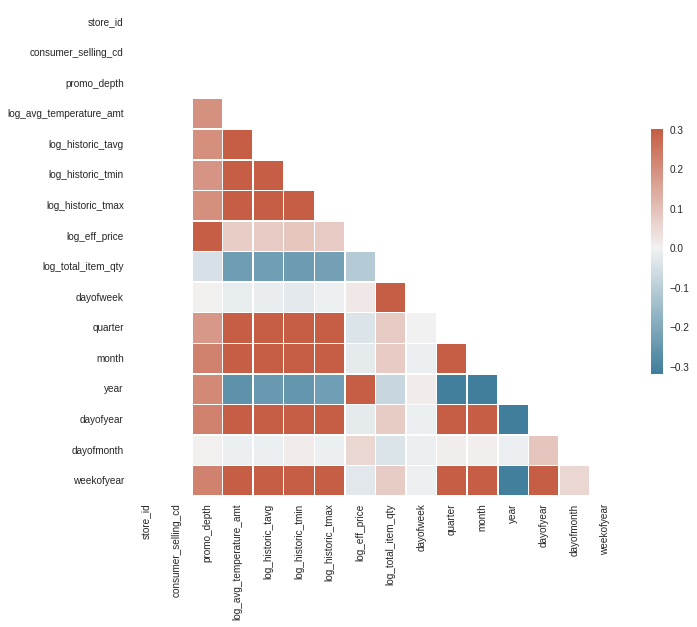

Calling xgboost_regression
Best parameters: {'subsample': 0.8999999999999999, 'n_estimators': 10, 'max_depth': 5, 'learning_rate': 0.3, 'colsample_bytree': 0.7999999999999999, 'colsample_bylevel': 0.6}
Lowest RMSE:  0.5174565467193727


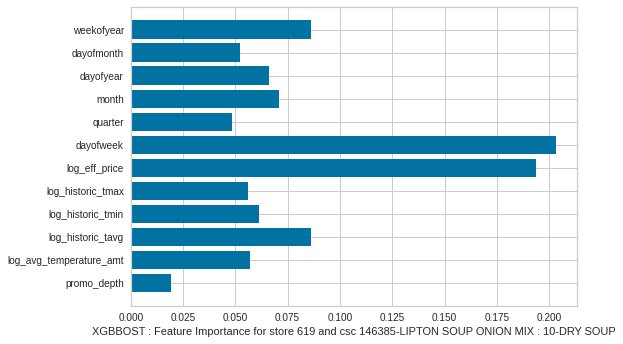

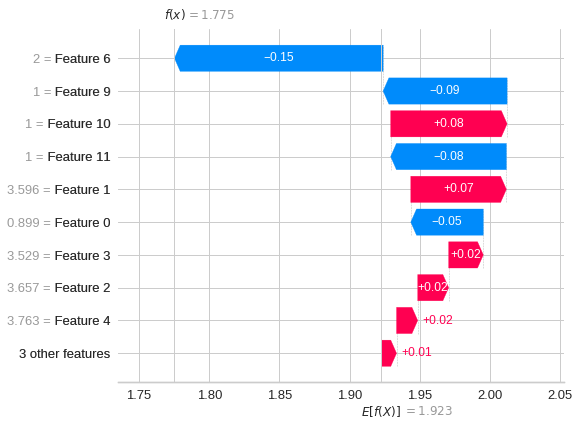

Calling lightgbm_regression
Fitting 5 folds for each of 15 candidates, totalling 75 fits


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


{'subsample': 0.7, 'random_state': 501, 'objective': 'regression', 'num_leaves': 10, 'min_split_gain': 0.01, 'min_data_in_leaf': 10, 'metric': 'mse', 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.5, 'boosting_type': 'gbdt'}


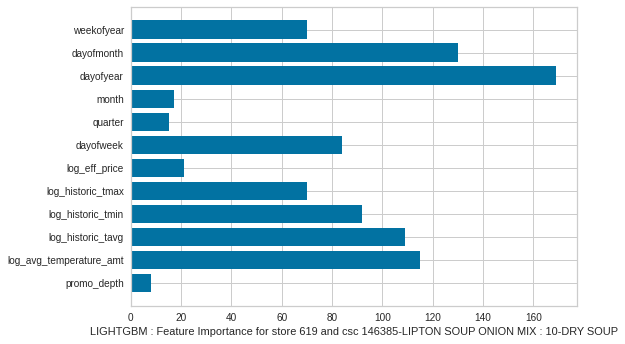

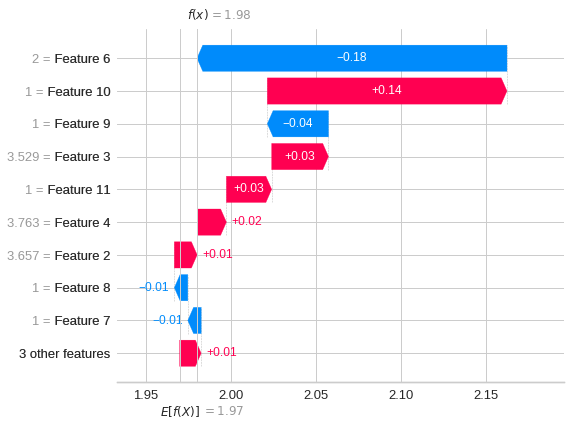

Calling catboost_regression

bestTest = 0.4384680604
bestIteration = 99

0:	loss: 0.4384681	best: 0.4384681 (0)	total: 64.5ms	remaining: 6.12s

bestTest = 0.4129661387
bestIteration = 91

1:	loss: 0.4129661	best: 0.4129661 (1)	total: 112ms	remaining: 5.24s

bestTest = 0.439007938
bestIteration = 99

2:	loss: 0.4390079	best: 0.4129661 (1)	total: 160ms	remaining: 4.97s

bestTest = 0.4135832665
bestIteration = 79

3:	loss: 0.4135833	best: 0.4129661 (1)	total: 210ms	remaining: 4.84s

bestTest = 0.4388302921
bestIteration = 99

4:	loss: 0.4388303	best: 0.4129661 (1)	total: 256ms	remaining: 4.66s

bestTest = 0.4126029938
bestIteration = 91

5:	loss: 0.4126030	best: 0.4126030 (5)	total: 303ms	remaining: 4.54s

bestTest = 0.4412590414
bestIteration = 99

6:	loss: 0.4412590	best: 0.4126030 (5)	total: 349ms	remaining: 4.44s

bestTest = 0.4137465286
bestIteration = 96

7:	loss: 0.4137465	best: 0.4126030 (5)	total: 393ms	remaining: 4.32s

bestTest = 0.4211170269
bestIteration = 149

8:	loss: 0.421

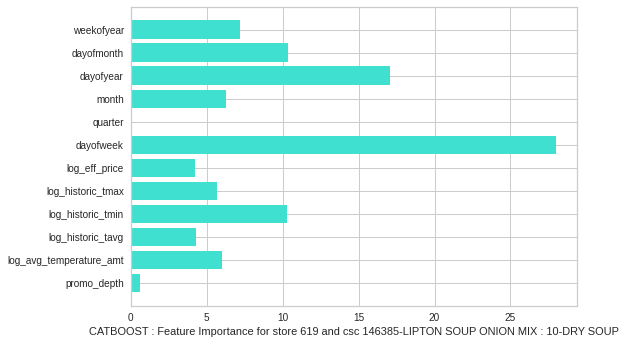

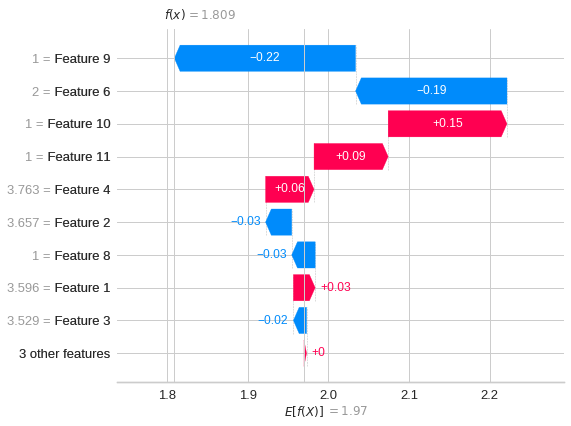

Processing store : 619 and csc : 146393
146393-S SEL BROTH CHICKN REDUCD SODIUM ASEPTIC 15-BOUILON BROTH
Length of train data :  797
Length of test data :  127


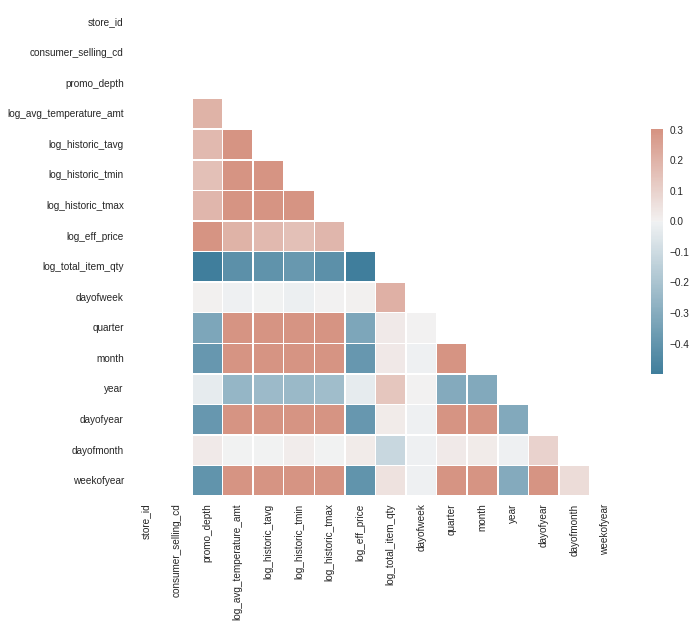

Calling xgboost_regression
Best parameters: {'subsample': 0.7, 'n_estimators': 10, 'max_depth': 5, 'learning_rate': 0.3, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.7999999999999999}
Lowest RMSE:  0.651311224052325


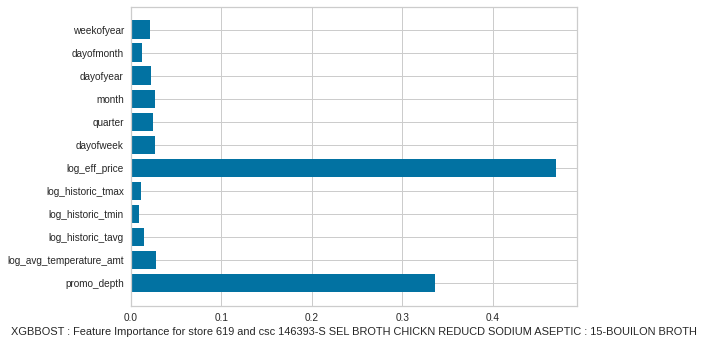

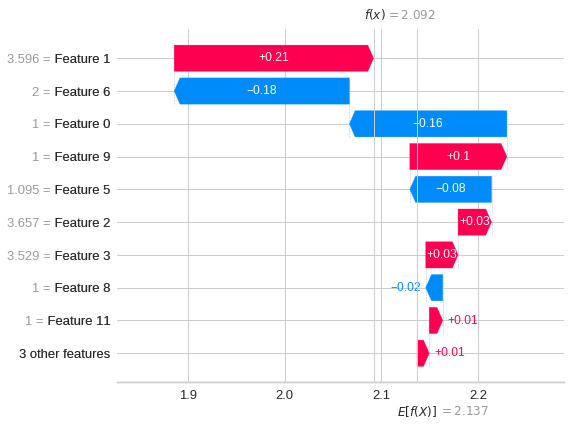

Calling lightgbm_regression
Fitting 5 folds for each of 31 candidates, totalling 155 fits


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


{'subsample': 0.5, 'random_state': 501, 'objective': 'regression', 'num_leaves': 10, 'min_split_gain': 0.01, 'min_data_in_leaf': 10, 'metric': 'mse', 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.7, 'boosting_type': 'gbdt'}


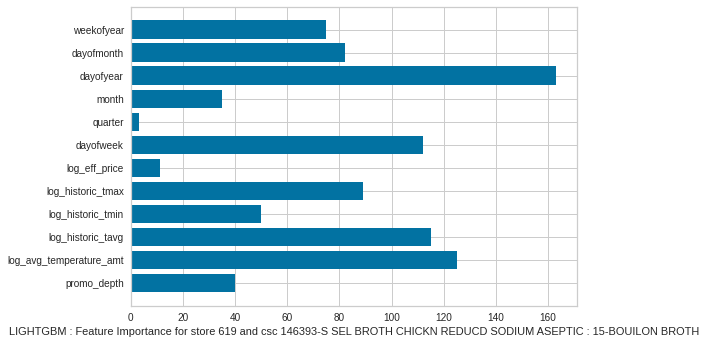

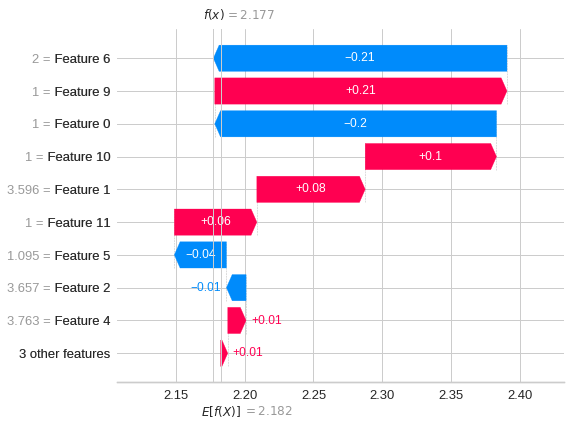

Calling catboost_regression

bestTest = 0.6403147605
bestIteration = 99

0:	loss: 0.6403148	best: 0.6403148 (0)	total: 78.4ms	remaining: 7.45s

bestTest = 0.5706055531
bestIteration = 99

1:	loss: 0.5706056	best: 0.5706056 (1)	total: 125ms	remaining: 5.88s

bestTest = 0.6407855333
bestIteration = 99

2:	loss: 0.6407855	best: 0.5706056 (1)	total: 172ms	remaining: 5.33s

bestTest = 0.5698626577
bestIteration = 99

3:	loss: 0.5698627	best: 0.5698627 (3)	total: 227ms	remaining: 5.22s

bestTest = 0.641844866
bestIteration = 99

4:	loss: 0.6418449	best: 0.5698627 (3)	total: 275ms	remaining: 5.01s

bestTest = 0.5742330266
bestIteration = 99

5:	loss: 0.5742330	best: 0.5698627 (3)	total: 318ms	remaining: 4.78s

bestTest = 0.6455918428
bestIteration = 99

6:	loss: 0.6455918	best: 0.5698627 (3)	total: 364ms	remaining: 4.63s

bestTest = 0.5751014962
bestIteration = 99

7:	loss: 0.5751015	best: 0.5698627 (3)	total: 410ms	remaining: 4.51s

bestTest = 0.5980411478
bestIteration = 149

8:	loss: 0.598

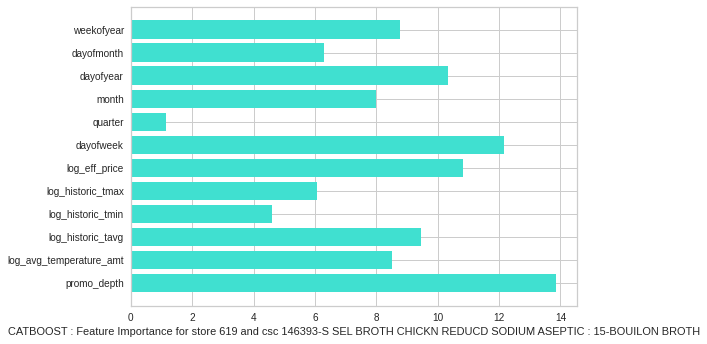

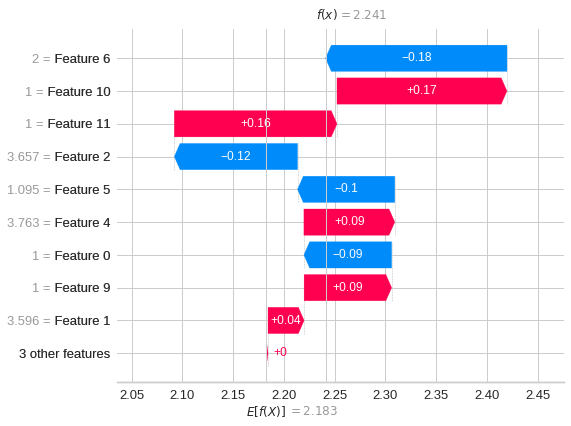

Processing store : 619 and csc : 146399
146399-S SEL BROTH CHICKEN ASEPTIC 15-BOUILON BROTH
Length of train data :  815
Length of test data :  174


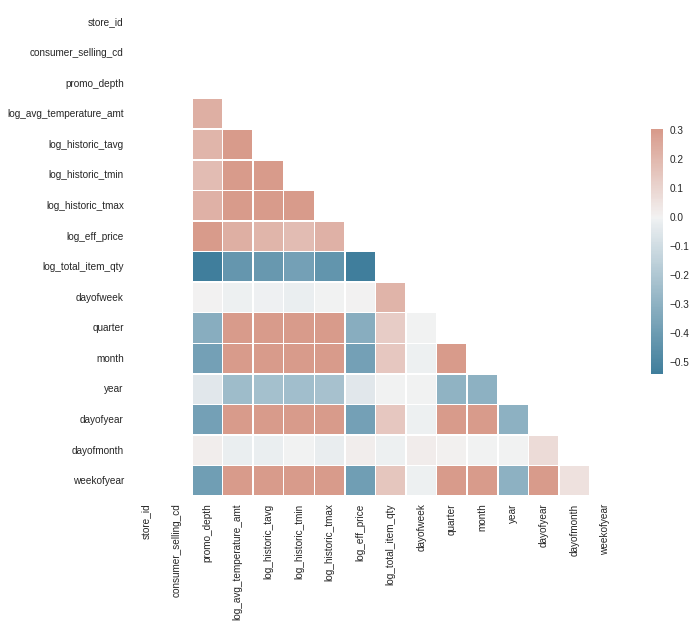

Calling xgboost_regression
Best parameters: {'subsample': 0.5, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.6}
Lowest RMSE:  0.5749407333593549


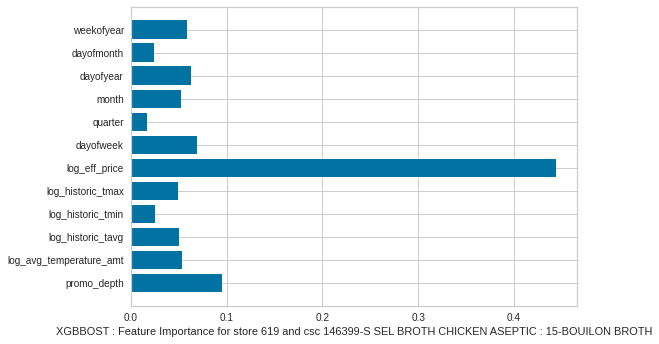

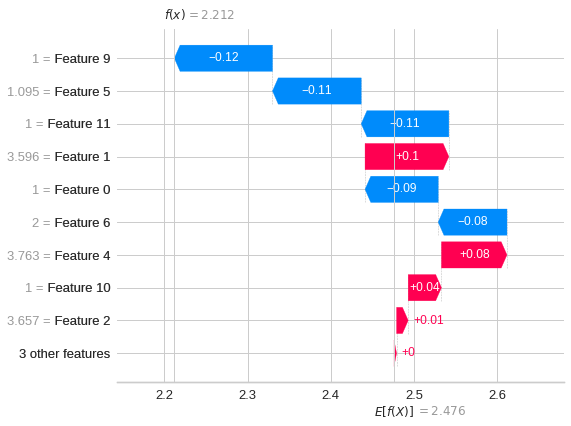

Calling lightgbm_regression
Fitting 5 folds for each of 27 candidates, totalling 135 fits


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


{'subsample': 0.5, 'random_state': 501, 'objective': 'regression', 'num_leaves': 10, 'min_split_gain': 0.01, 'min_data_in_leaf': 10, 'metric': 'mse', 'max_depth': 6, 'learning_rate': 0.05, 'colsample_bytree': 0.7, 'boosting_type': 'gbdt'}


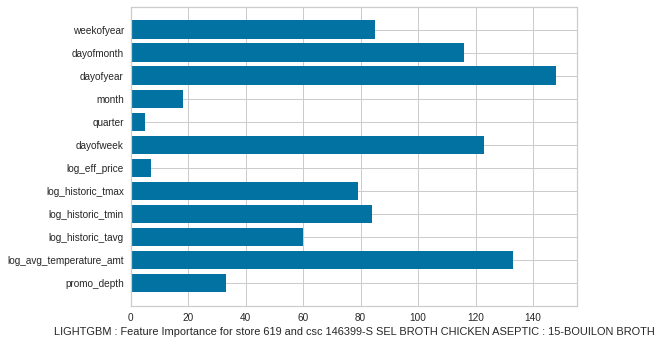

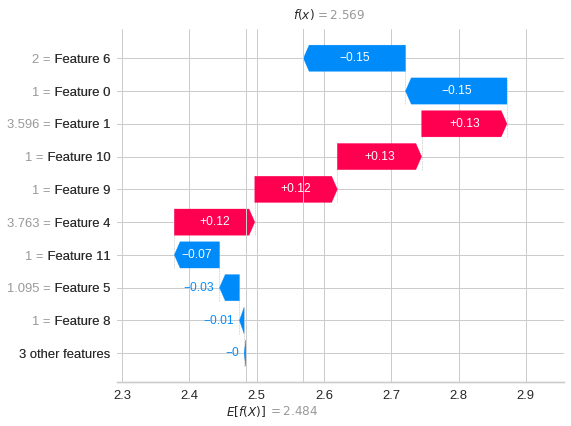

Calling catboost_regression

bestTest = 0.5567068854
bestIteration = 99

0:	loss: 0.5567069	best: 0.5567069 (0)	total: 63ms	remaining: 5.98s

bestTest = 0.5265352161
bestIteration = 82

1:	loss: 0.5265352	best: 0.5265352 (1)	total: 109ms	remaining: 5.11s

bestTest = 0.556917101
bestIteration = 99

2:	loss: 0.5569171	best: 0.5265352 (1)	total: 155ms	remaining: 4.82s

bestTest = 0.5227460064
bestIteration = 80

3:	loss: 0.5227460	best: 0.5227460 (3)	total: 217ms	remaining: 4.99s

bestTest = 0.5568872912
bestIteration = 99

4:	loss: 0.5568873	best: 0.5227460 (3)	total: 262ms	remaining: 4.77s

bestTest = 0.5219750764
bestIteration = 94

5:	loss: 0.5219751	best: 0.5219751 (5)	total: 307ms	remaining: 4.6s

bestTest = 0.5585561867
bestIteration = 99

6:	loss: 0.5585562	best: 0.5219751 (5)	total: 352ms	remaining: 4.47s

bestTest = 0.5228257766
bestIteration = 96

7:	loss: 0.5228258	best: 0.5219751 (5)	total: 400ms	remaining: 4.39s

bestTest = 0.5352543859
bestIteration = 149

8:	loss: 0.535254

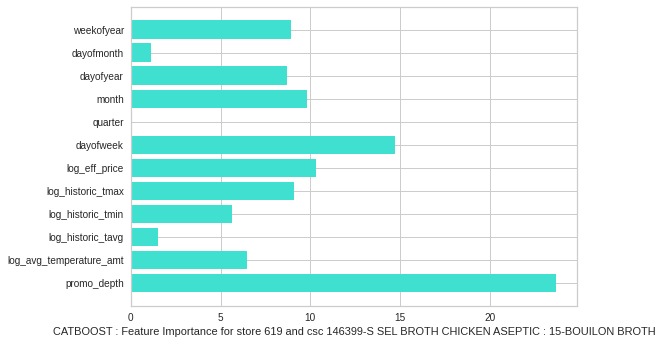

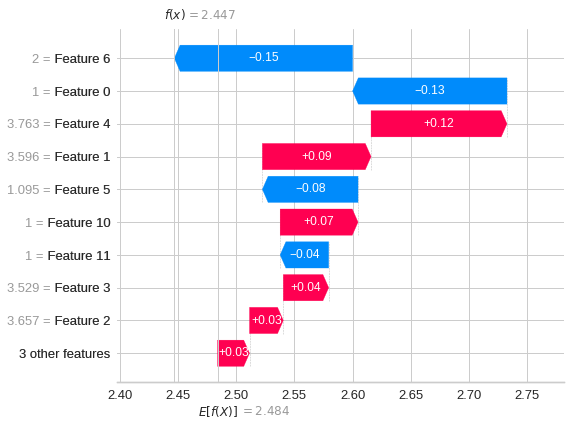

Processing store : 619 and csc : 146408
146408-PROGRESSO RTS SOUP CHICKEN NOODLE TRAD 20-READY TO SERVE SOUP
Length of train data :  733
Length of test data :  140


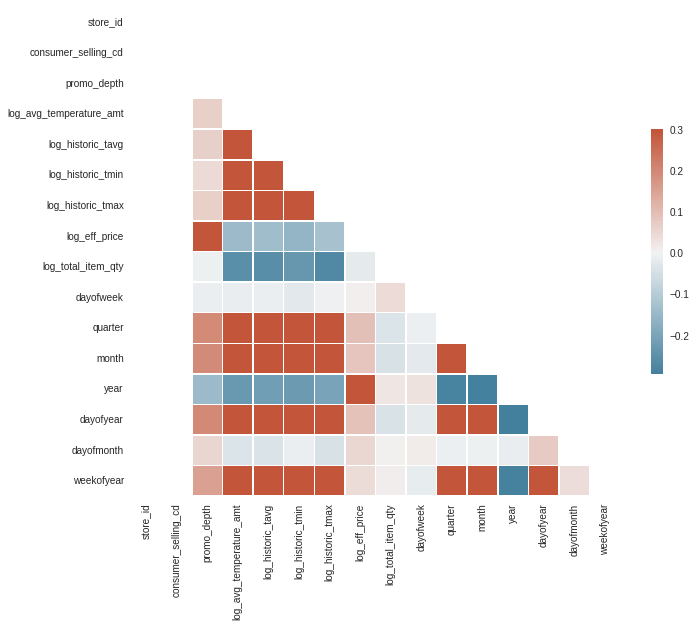

Calling xgboost_regression
Best parameters: {'subsample': 0.6, 'n_estimators': 10, 'max_depth': 3, 'learning_rate': 0.3, 'colsample_bytree': 0.7999999999999999, 'colsample_bylevel': 0.8999999999999999}
Lowest RMSE:  0.8243527927654284


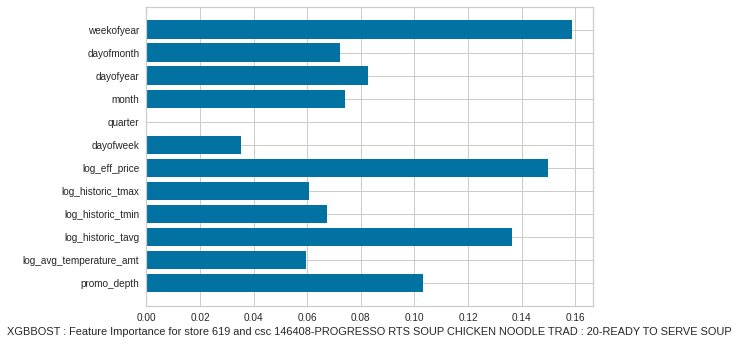

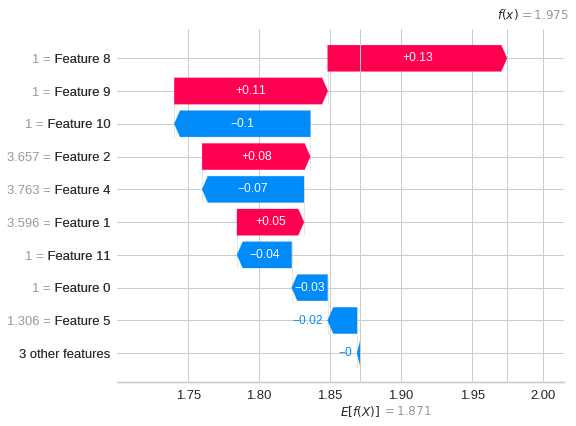

Calling lightgbm_regression
Fitting 5 folds for each of 37 candidates, totalling 185 fits


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


{'subsample': 0.5, 'random_state': 501, 'objective': 'regression', 'num_leaves': 10, 'min_split_gain': 0.01, 'min_data_in_leaf': 10, 'metric': 'mse', 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.5, 'boosting_type': 'gbdt'}


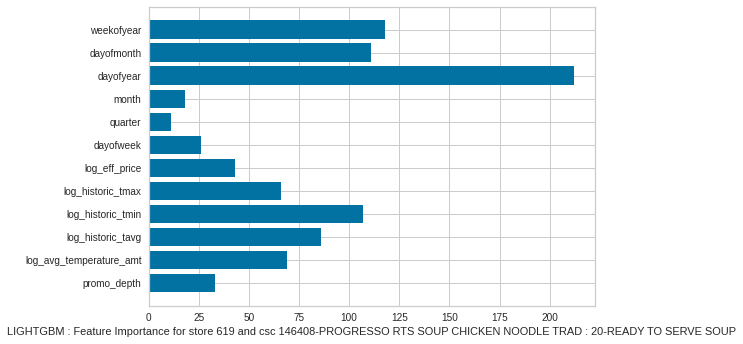

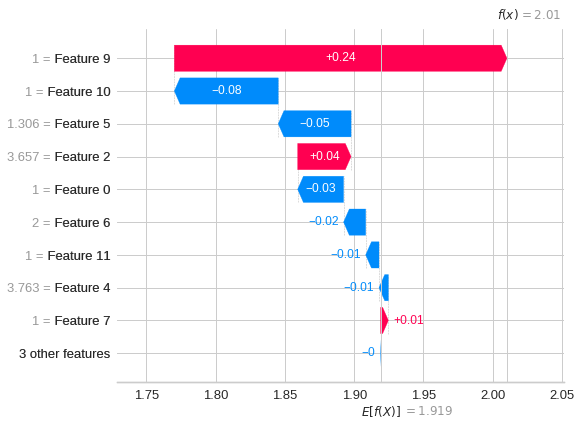

Calling catboost_regression

bestTest = 0.7677632243
bestIteration = 99

0:	loss: 0.7677632	best: 0.7677632 (0)	total: 52.6ms	remaining: 5s

bestTest = 0.7013415653
bestIteration = 94

1:	loss: 0.7013416	best: 0.7013416 (1)	total: 95.3ms	remaining: 4.48s

bestTest = 0.7698727858
bestIteration = 99

2:	loss: 0.7698728	best: 0.7013416 (1)	total: 140ms	remaining: 4.35s

bestTest = 0.7006749076
bestIteration = 98

3:	loss: 0.7006749	best: 0.7006749 (3)	total: 186ms	remaining: 4.28s

bestTest = 0.7736949489
bestIteration = 99

4:	loss: 0.7736949	best: 0.7006749 (3)	total: 246ms	remaining: 4.48s

bestTest = 0.7066654604
bestIteration = 98

5:	loss: 0.7066655	best: 0.7006749 (3)	total: 289ms	remaining: 4.33s

bestTest = 0.7857499199
bestIteration = 99

6:	loss: 0.7857499	best: 0.7006749 (3)	total: 336ms	remaining: 4.27s

bestTest = 0.7137293899
bestIteration = 96

7:	loss: 0.7137294	best: 0.7006749 (3)	total: 404ms	remaining: 4.44s

bestTest = 0.7323954599
bestIteration = 149

8:	loss: 0.7323

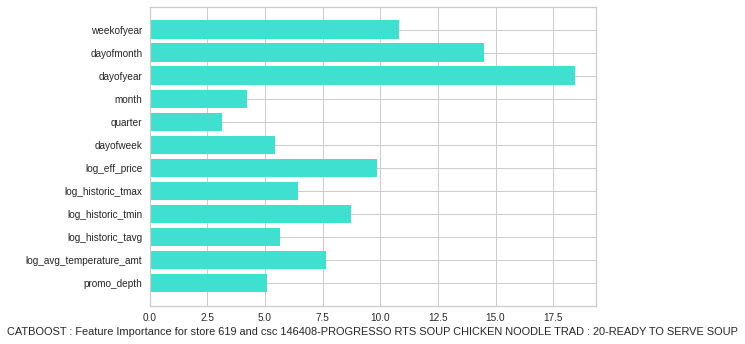

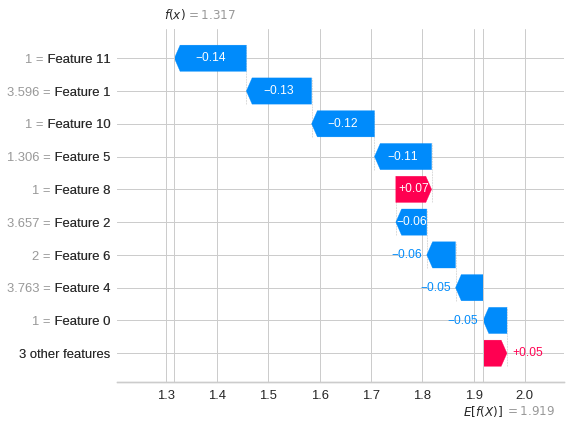

Processing store : 619 and csc : 146453
146453-PROGRESSO RCH & HRTY SOUP CHKN & NOODLE 20-READY TO SERVE SOUP
Length of train data :  684
Length of test data :  110


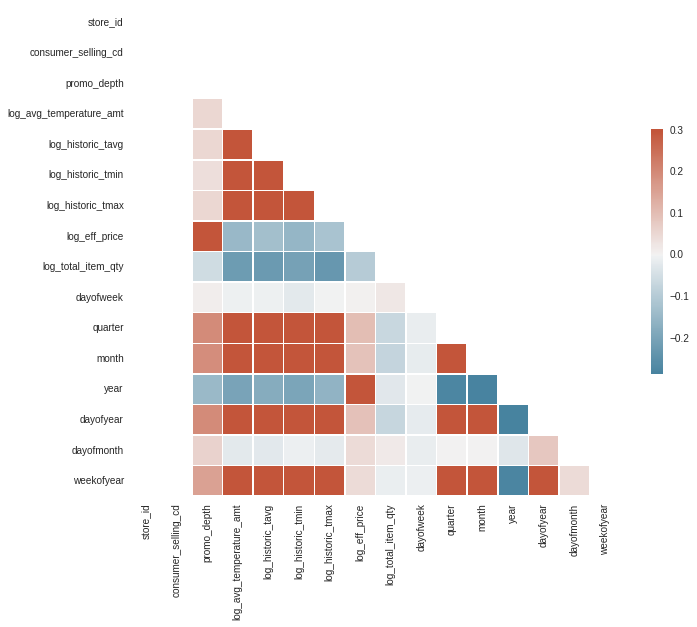

Calling xgboost_regression
Best parameters: {'subsample': 0.7999999999999999, 'n_estimators': 10, 'max_depth': 6, 'learning_rate': 0.2, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.4}
Lowest RMSE:  0.9065402992689477


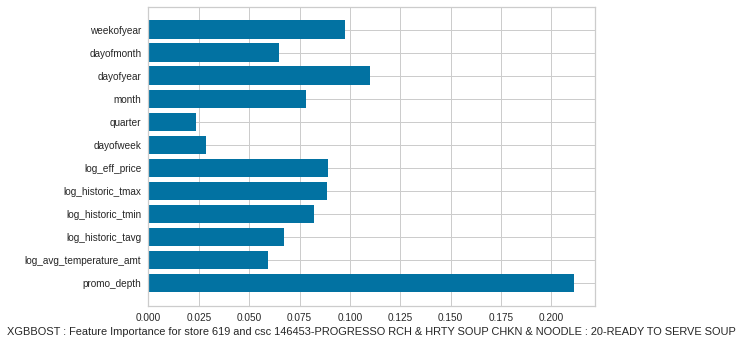

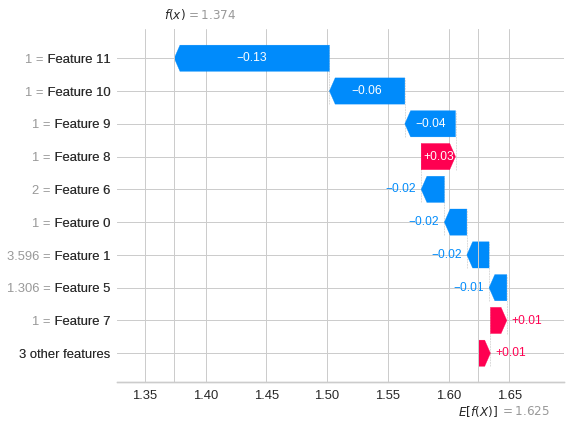

Calling lightgbm_regression
Fitting 5 folds for each of 38 candidates, totalling 190 fits


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


{'subsample': 0.5, 'random_state': 501, 'objective': 'regression', 'num_leaves': 10, 'min_split_gain': 0.01, 'min_data_in_leaf': 10, 'metric': 'mse', 'max_depth': 8, 'learning_rate': 0.05, 'colsample_bytree': 0.5, 'boosting_type': 'gbdt'}


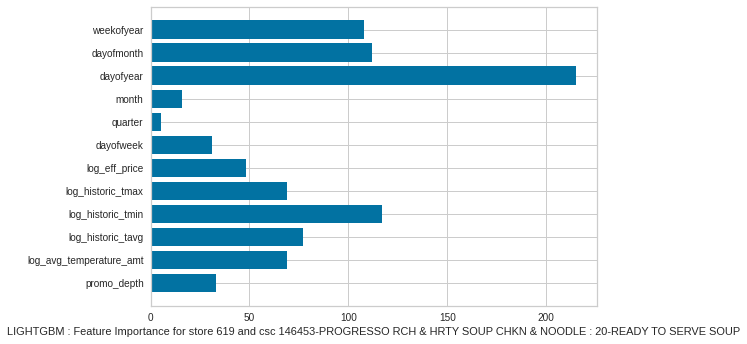

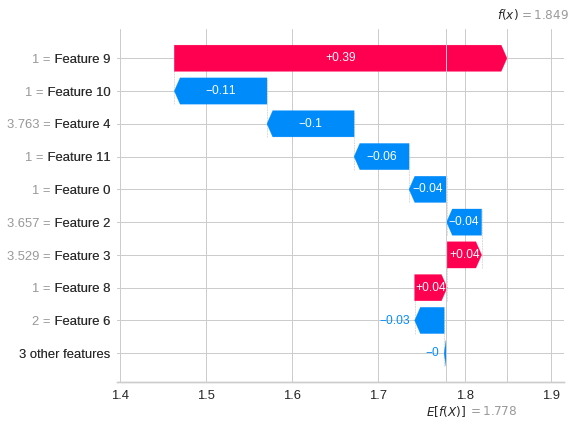

Calling catboost_regression

bestTest = 0.7611558207
bestIteration = 99

0:	loss: 0.7611558	best: 0.7611558 (0)	total: 53.1ms	remaining: 5.04s

bestTest = 0.7233850087
bestIteration = 90

1:	loss: 0.7233850	best: 0.7233850 (1)	total: 97.9ms	remaining: 4.6s

bestTest = 0.7627390981
bestIteration = 99

2:	loss: 0.7627391	best: 0.7233850 (1)	total: 144ms	remaining: 4.47s

bestTest = 0.7245055371
bestIteration = 87

3:	loss: 0.7245055	best: 0.7233850 (1)	total: 218ms	remaining: 5s

bestTest = 0.765332757
bestIteration = 99

4:	loss: 0.7653328	best: 0.7233850 (1)	total: 271ms	remaining: 4.92s

bestTest = 0.7196831177
bestIteration = 90

5:	loss: 0.7196831	best: 0.7196831 (5)	total: 315ms	remaining: 4.73s

bestTest = 0.7724937324
bestIteration = 99

6:	loss: 0.7724937	best: 0.7196831 (5)	total: 365ms	remaining: 4.64s

bestTest = 0.7294607403
bestIteration = 99

7:	loss: 0.7294607	best: 0.7196831 (5)	total: 428ms	remaining: 4.71s

bestTest = 0.7400579675
bestIteration = 149

8:	loss: 0.740058

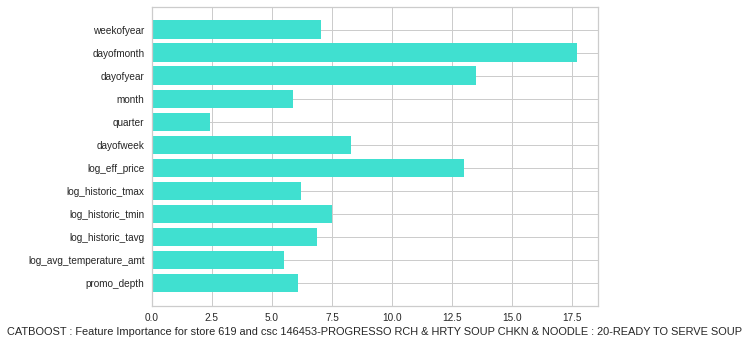

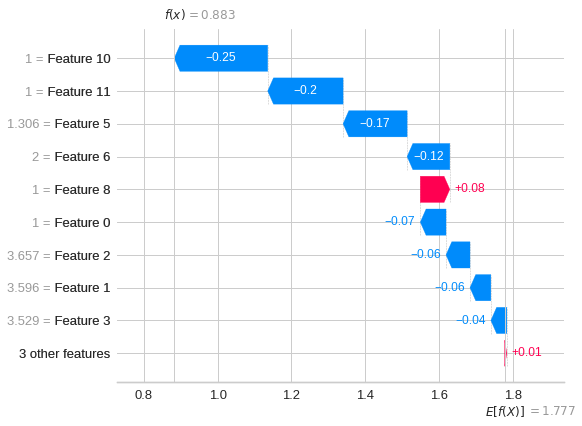

Processing store : 619 and csc : 146629
146629-CMPBL COND SOUP TOMATO 1-CONDENSED MULTI-SERVE EATING SOUP
Length of train data :  754
Length of test data :  157


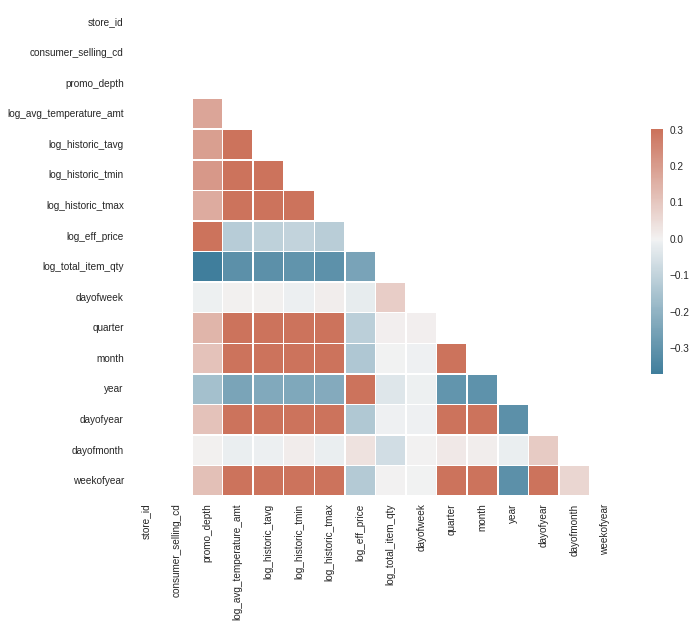

Calling xgboost_regression
Best parameters: {'subsample': 0.7999999999999999, 'n_estimators': 10, 'max_depth': 3, 'learning_rate': 0.3, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.7}
Lowest RMSE:  0.7420341975586401


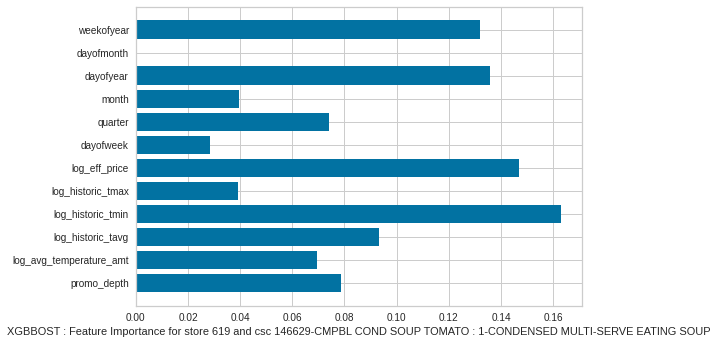

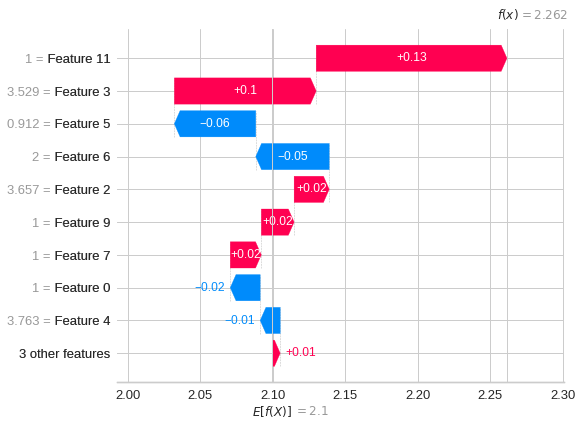

Calling lightgbm_regression
Fitting 5 folds for each of 69 candidates, totalling 345 fits


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


{'subsample': 0.5, 'random_state': 501, 'objective': 'regression', 'num_leaves': 10, 'min_split_gain': 0.01, 'min_data_in_leaf': 10, 'metric': 'mse', 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.5, 'boosting_type': 'gbdt'}


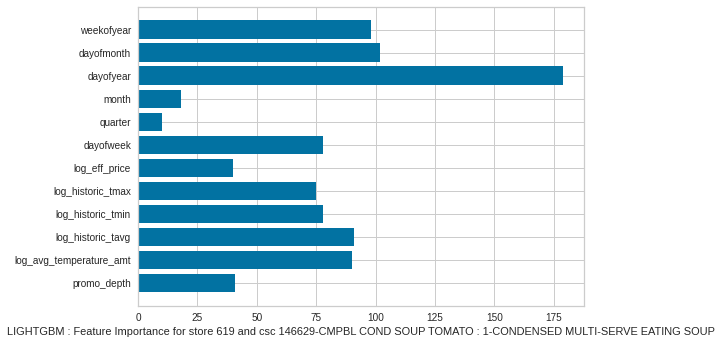

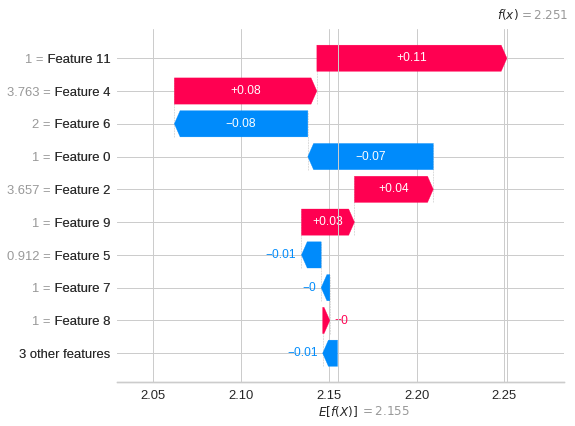

Calling catboost_regression

bestTest = 0.7167400711
bestIteration = 99

0:	loss: 0.7167401	best: 0.7167401 (0)	total: 63.6ms	remaining: 6.05s

bestTest = 0.6727517111
bestIteration = 96

1:	loss: 0.6727517	best: 0.6727517 (1)	total: 113ms	remaining: 5.32s

bestTest = 0.7171030338
bestIteration = 99

2:	loss: 0.7171030	best: 0.6727517 (1)	total: 161ms	remaining: 5s

bestTest = 0.6765933696
bestIteration = 99

3:	loss: 0.6765934	best: 0.6727517 (1)	total: 234ms	remaining: 5.38s

bestTest = 0.7179988358
bestIteration = 99

4:	loss: 0.7179988	best: 0.6727517 (1)	total: 281ms	remaining: 5.11s

bestTest = 0.6727778808
bestIteration = 96

5:	loss: 0.6727779	best: 0.6727517 (1)	total: 332ms	remaining: 4.98s

bestTest = 0.7205775284
bestIteration = 99

6:	loss: 0.7205775	best: 0.6727517 (1)	total: 387ms	remaining: 4.92s

bestTest = 0.6749122439
bestIteration = 96

7:	loss: 0.6749122	best: 0.6727517 (1)	total: 454ms	remaining: 5s

bestTest = 0.6932726514
bestIteration = 149

8:	loss: 0.6932727	

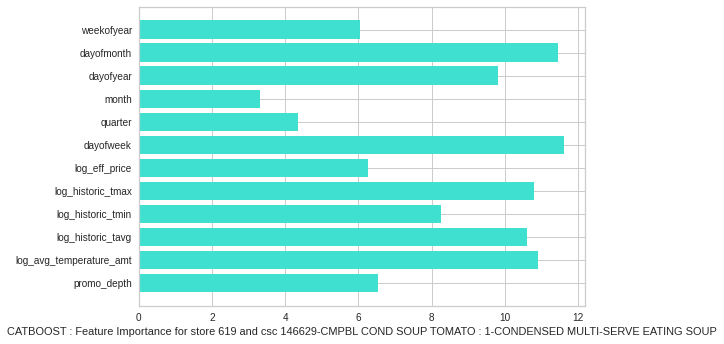

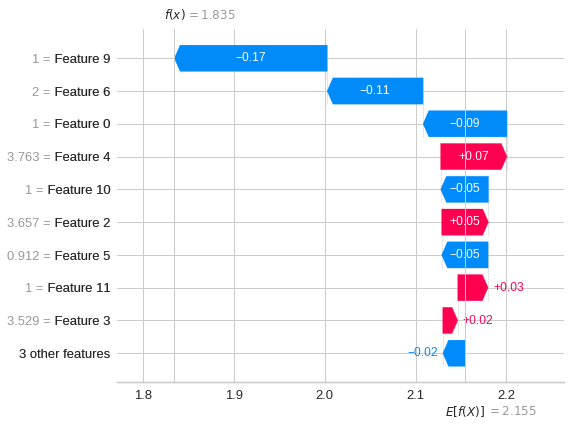

Processing store : 619 and csc : 146675
146675-CMPBL COND SOUP CHICKEN NOODLE 1-CONDENSED MULTI-SERVE EATING SOUP
Length of train data :  739
Length of test data :  144


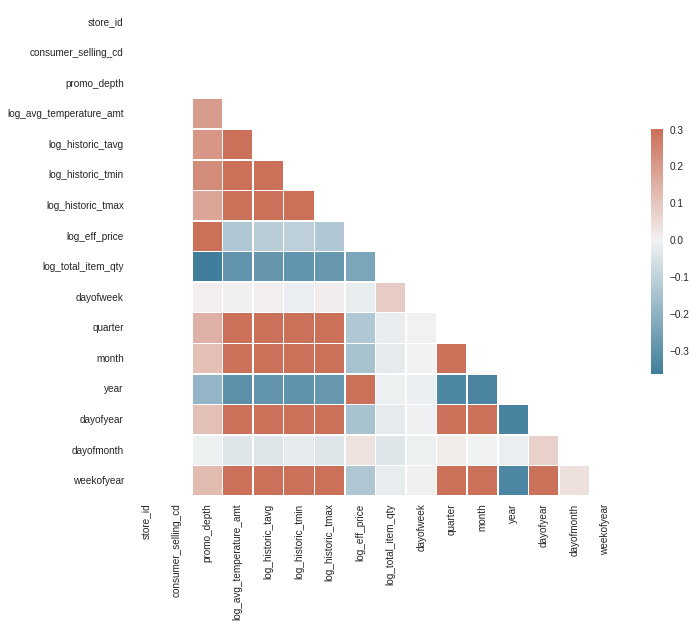

Calling xgboost_regression
Best parameters: {'subsample': 0.7999999999999999, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.8999999999999999, 'colsample_bylevel': 0.7999999999999999}
Lowest RMSE:  0.8331379517298967


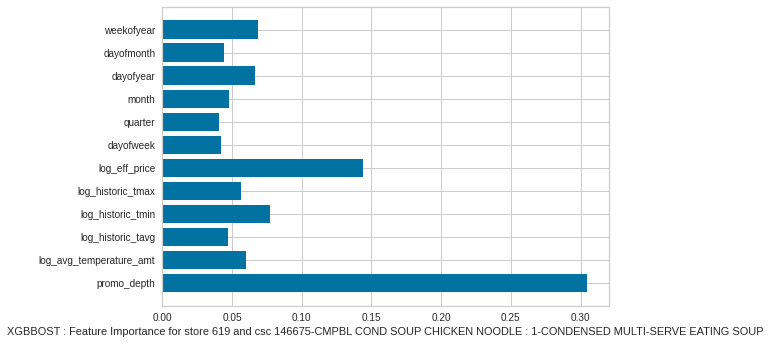

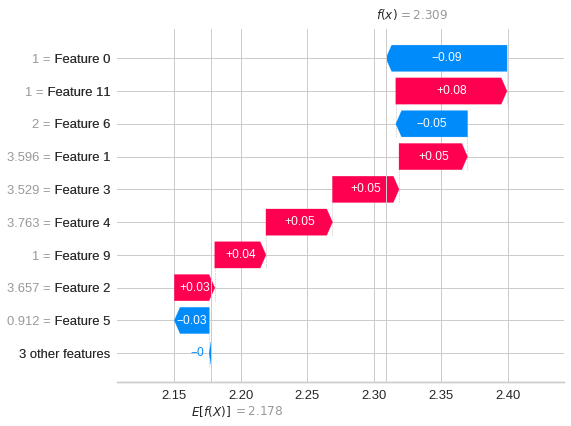

Calling lightgbm_regression
Fitting 5 folds for each of 50 candidates, totalling 250 fits


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


{'subsample': 0.5, 'random_state': 501, 'objective': 'regression', 'num_leaves': 10, 'min_split_gain': 0.01, 'min_data_in_leaf': 10, 'metric': 'mse', 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.5, 'boosting_type': 'gbdt'}


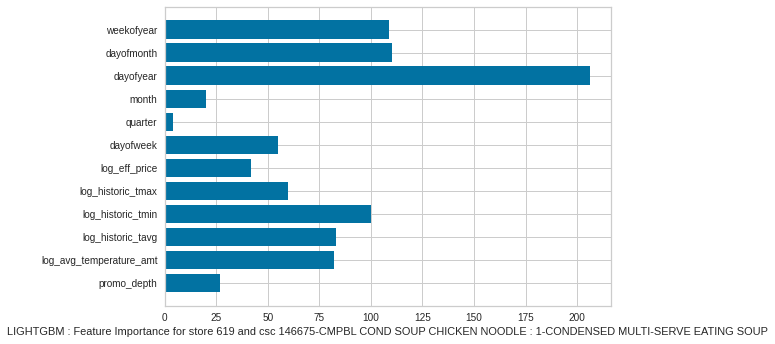

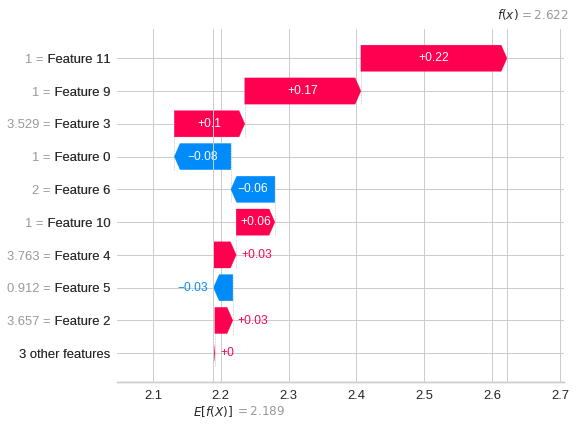

Calling catboost_regression

bestTest = 0.7730223738
bestIteration = 99

0:	loss: 0.7730224	best: 0.7730224 (0)	total: 63.9ms	remaining: 6.07s

bestTest = 0.7580555539
bestIteration = 91

1:	loss: 0.7580556	best: 0.7580556 (1)	total: 114ms	remaining: 5.36s

bestTest = 0.7737934489
bestIteration = 99

2:	loss: 0.7737934	best: 0.7580556 (1)	total: 163ms	remaining: 5.04s

bestTest = 0.7582352883
bestIteration = 99

3:	loss: 0.7582353	best: 0.7580556 (1)	total: 230ms	remaining: 5.29s

bestTest = 0.7733703682
bestIteration = 99

4:	loss: 0.7733704	best: 0.7580556 (1)	total: 280ms	remaining: 5.09s

bestTest = 0.753333731
bestIteration = 98

5:	loss: 0.7533337	best: 0.7533337 (5)	total: 327ms	remaining: 4.9s

bestTest = 0.7733237179
bestIteration = 99

6:	loss: 0.7733237	best: 0.7533337 (5)	total: 371ms	remaining: 4.72s

bestTest = 0.7533931581
bestIteration = 91

7:	loss: 0.7533932	best: 0.7533337 (5)	total: 416ms	remaining: 4.58s

bestTest = 0.7581861173
bestIteration = 149

8:	loss: 0.7581

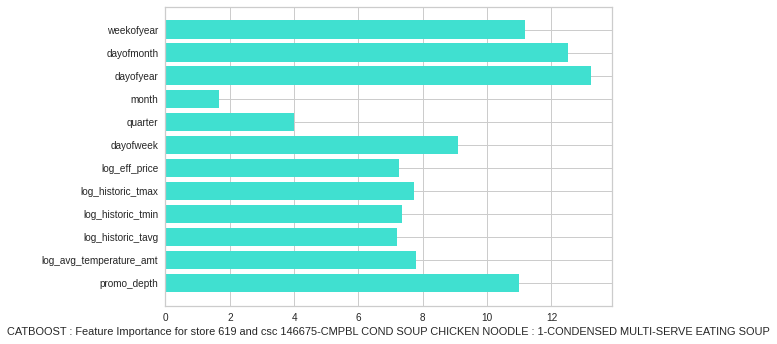

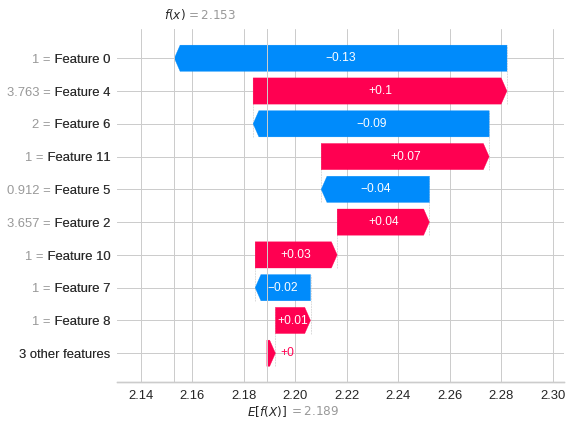

Processing store : 619 and csc : 146835
146835-COLLEGE INN CHICKEN BROTH 15-BOUILON BROTH
Length of train data :  758
Length of test data :  158


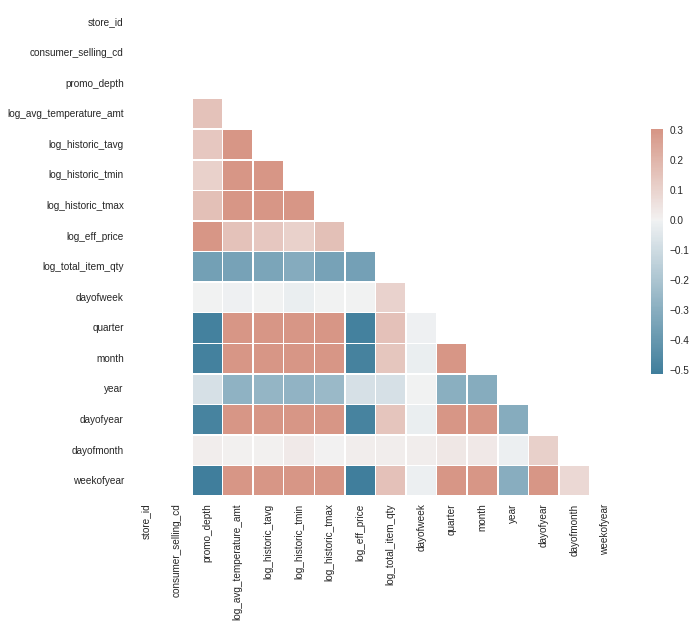

Calling xgboost_regression
Best parameters: {'subsample': 0.7999999999999999, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.7}
Lowest RMSE:  0.601187010150945


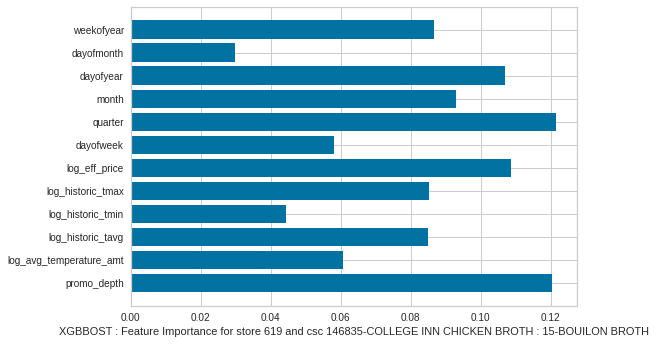

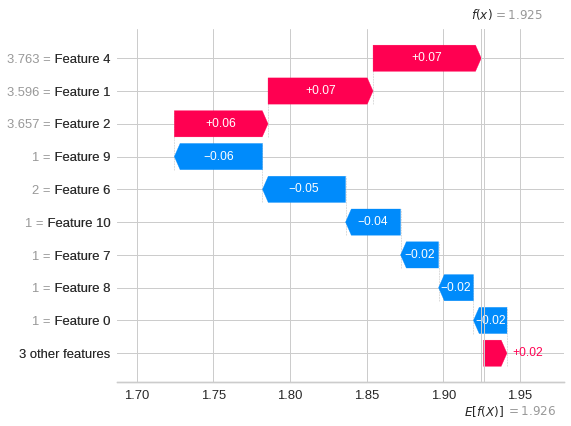

Calling lightgbm_regression
Fitting 5 folds for each of 14 candidates, totalling 70 fits


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


{'subsample': 0.7, 'random_state': 501, 'objective': 'regression', 'num_leaves': 10, 'min_split_gain': 0.01, 'min_data_in_leaf': 10, 'metric': 'mse', 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.5, 'boosting_type': 'gbdt'}


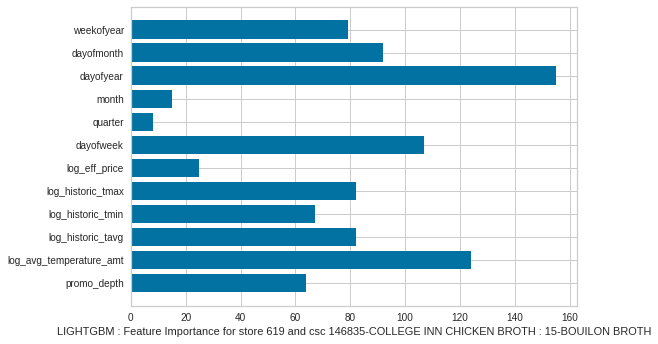

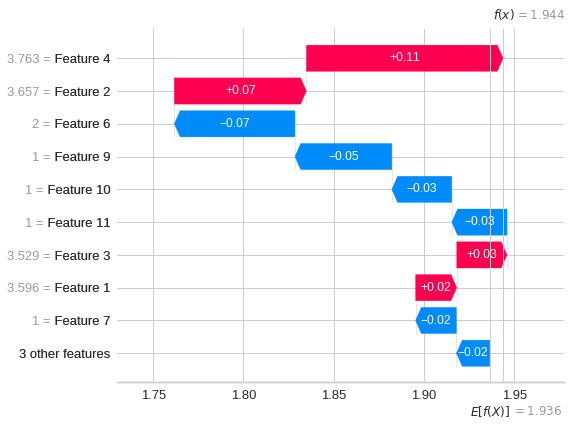

Calling catboost_regression

bestTest = 0.6427467526
bestIteration = 99

0:	loss: 0.6427468	best: 0.6427468 (0)	total: 69ms	remaining: 6.55s

bestTest = 0.6142226857
bestIteration = 61

1:	loss: 0.6142227	best: 0.6142227 (1)	total: 112ms	remaining: 5.28s

bestTest = 0.6439741214
bestIteration = 99

2:	loss: 0.6439741	best: 0.6142227 (1)	total: 155ms	remaining: 4.81s

bestTest = 0.6149179664
bestIteration = 58

3:	loss: 0.6149180	best: 0.6142227 (1)	total: 199ms	remaining: 4.57s

bestTest = 0.6424248802
bestIteration = 99

4:	loss: 0.6424249	best: 0.6142227 (1)	total: 272ms	remaining: 4.95s

bestTest = 0.6158333878
bestIteration = 61

5:	loss: 0.6158334	best: 0.6142227 (1)	total: 322ms	remaining: 4.83s

bestTest = 0.6493756535
bestIteration = 99

6:	loss: 0.6493757	best: 0.6142227 (1)	total: 374ms	remaining: 4.76s

bestTest = 0.6179679249
bestIteration = 91

7:	loss: 0.6179679	best: 0.6142227 (1)	total: 440ms	remaining: 4.84s

bestTest = 0.616964237
bestIteration = 148

8:	loss: 0.61696

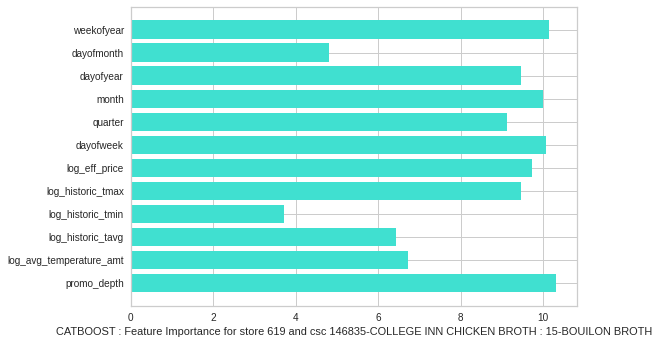

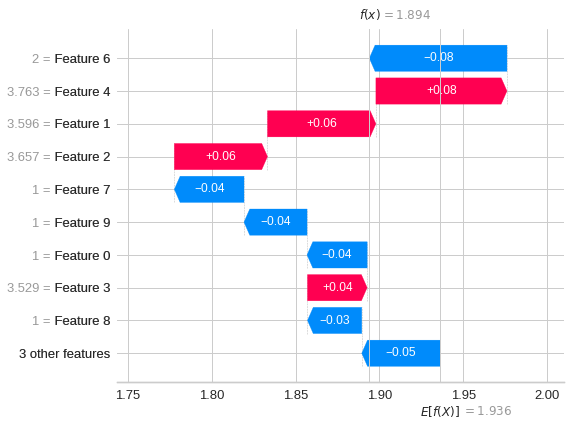

Processing store : 619 and csc : 322045
322045-GMILLS CINN TST CRNCH SWTND WHL WHT RICE 1-READY TO EAT CEREAL
Length of train data :  787
Length of test data :  151


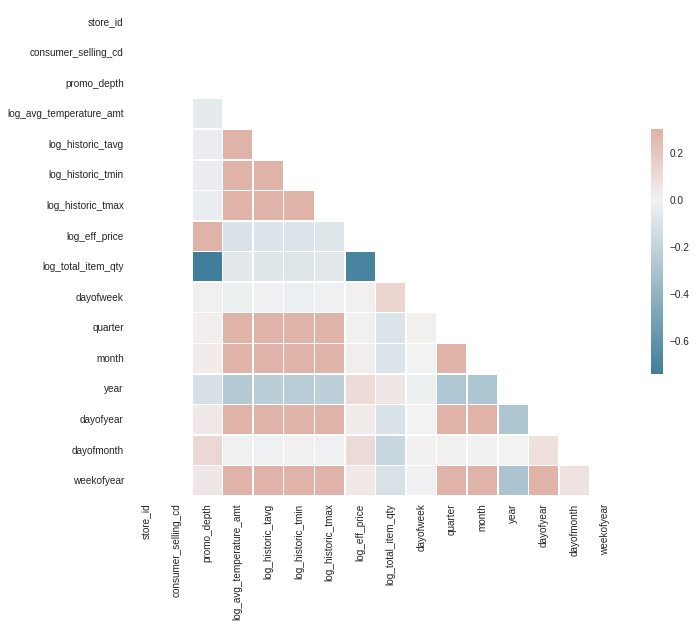

Calling xgboost_regression
Best parameters: {'subsample': 0.8999999999999999, 'n_estimators': 10, 'max_depth': 3, 'learning_rate': 0.3, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.5}
Lowest RMSE:  0.719442911380328


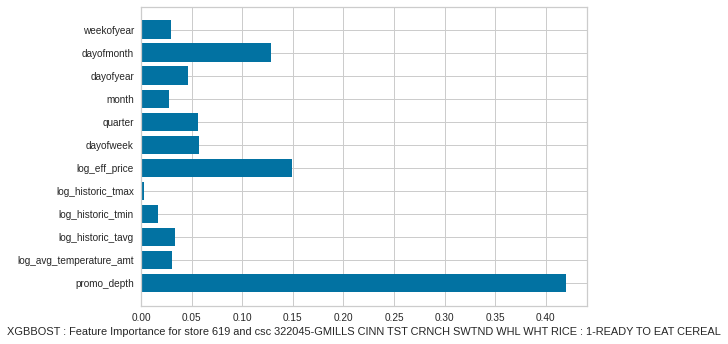

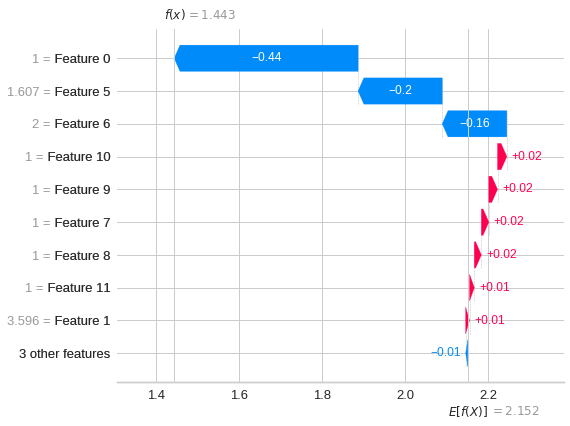

Calling lightgbm_regression
Fitting 5 folds for each of 19 candidates, totalling 95 fits


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


{'subsample': 0.7, 'random_state': 501, 'objective': 'regression', 'num_leaves': 10, 'min_split_gain': 0.01, 'min_data_in_leaf': 10, 'metric': 'mse', 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.5, 'boosting_type': 'gbdt'}


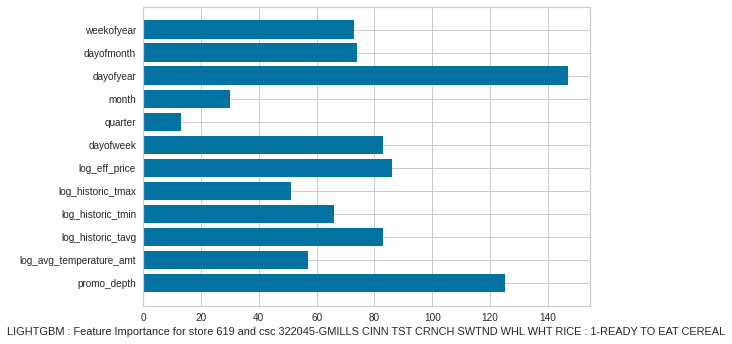

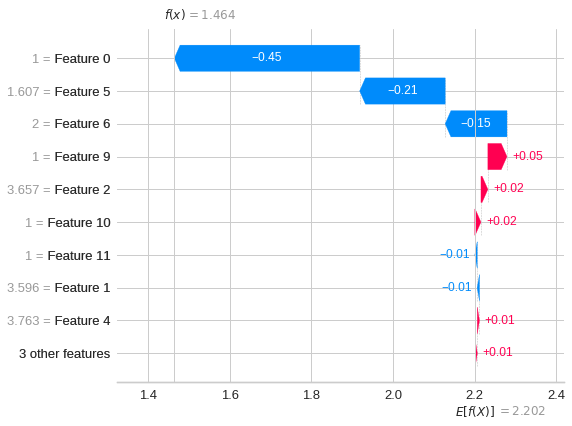

Calling catboost_regression

bestTest = 0.6532551033
bestIteration = 99

0:	loss: 0.6532551	best: 0.6532551 (0)	total: 57.1ms	remaining: 5.43s

bestTest = 0.5684950035
bestIteration = 99

1:	loss: 0.5684950	best: 0.5684950 (1)	total: 105ms	remaining: 4.93s

bestTest = 0.6517641387
bestIteration = 99

2:	loss: 0.6517641	best: 0.5684950 (1)	total: 154ms	remaining: 4.78s

bestTest = 0.5675789433
bestIteration = 98

3:	loss: 0.5675789	best: 0.5675789 (3)	total: 231ms	remaining: 5.31s

bestTest = 0.6536415453
bestIteration = 99

4:	loss: 0.6536415	best: 0.5675789 (3)	total: 280ms	remaining: 5.1s

bestTest = 0.5649900043
bestIteration = 98

5:	loss: 0.5649900	best: 0.5649900 (5)	total: 327ms	remaining: 4.9s

bestTest = 0.6531305375
bestIteration = 99

6:	loss: 0.6531305	best: 0.5649900 (5)	total: 374ms	remaining: 4.76s

bestTest = 0.5784848731
bestIteration = 98

7:	loss: 0.5784849	best: 0.5649900 (5)	total: 421ms	remaining: 4.63s

bestTest = 0.6190396333
bestIteration = 149

8:	loss: 0.6190

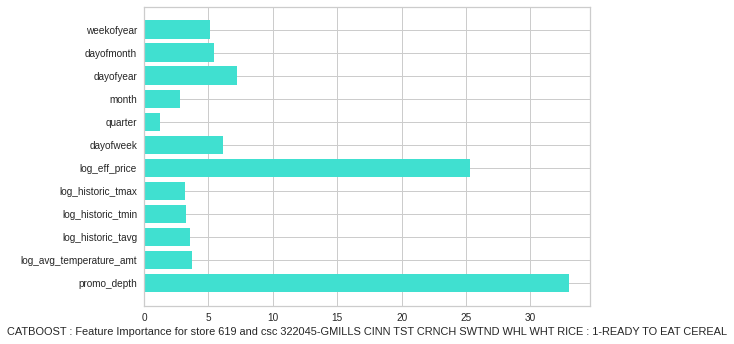

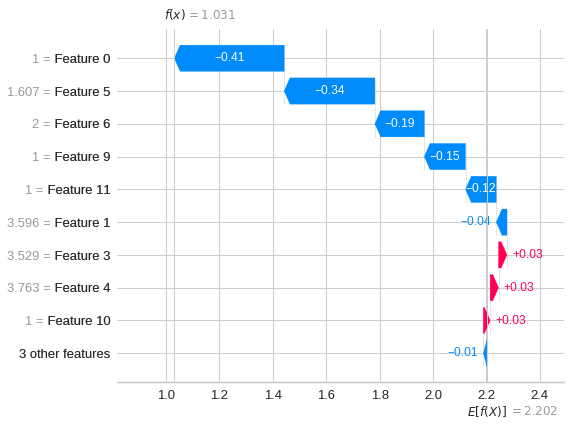

Processing store : 619 and csc : 322058
322058-GM CHEERIOS 1-READY TO EAT CEREAL
Length of train data :  816
Length of test data :  172


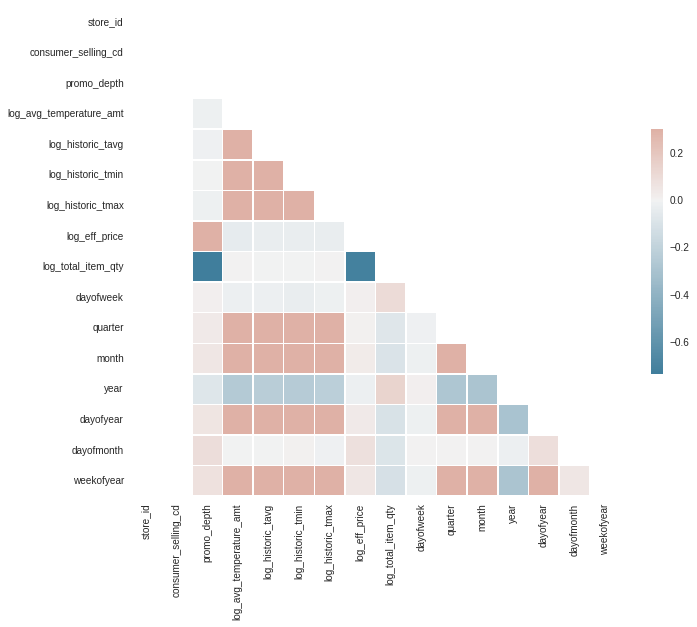

Calling xgboost_regression
Best parameters: {'subsample': 0.5, 'n_estimators': 10, 'max_depth': 3, 'learning_rate': 0.3, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.8999999999999999}
Lowest RMSE:  0.6635018920904129


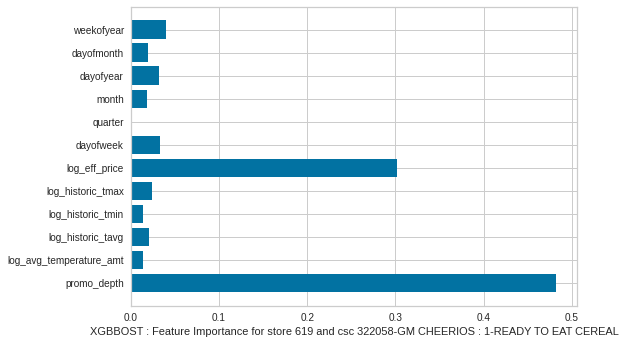

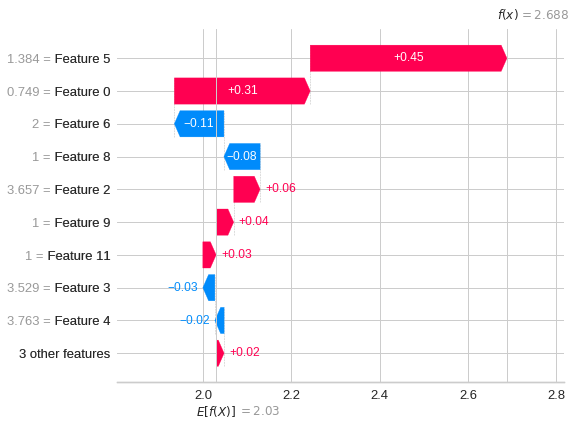

Calling lightgbm_regression
Fitting 5 folds for each of 91 candidates, totalling 455 fits


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


{'subsample': 0.5, 'random_state': 501, 'objective': 'regression', 'num_leaves': 10, 'min_split_gain': 0.01, 'min_data_in_leaf': 10, 'metric': 'mse', 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.5, 'boosting_type': 'gbdt'}


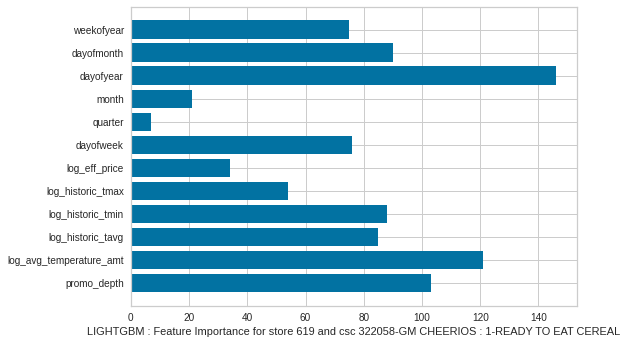

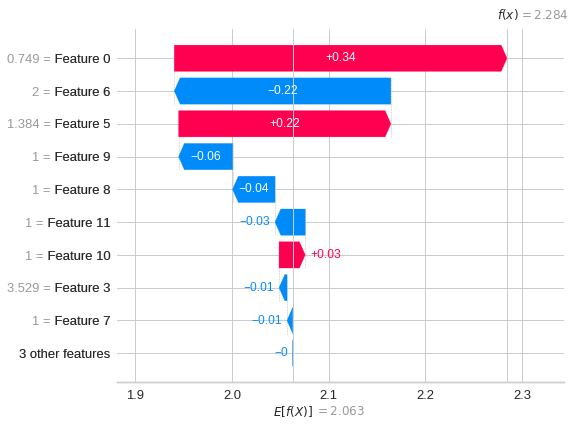

Calling catboost_regression

bestTest = 0.6000412909
bestIteration = 99

0:	loss: 0.6000413	best: 0.6000413 (0)	total: 90.4ms	remaining: 8.59s

bestTest = 0.5499080253
bestIteration = 73

1:	loss: 0.5499080	best: 0.5499080 (1)	total: 139ms	remaining: 6.54s

bestTest = 0.599286451
bestIteration = 99

2:	loss: 0.5992865	best: 0.5499080 (1)	total: 189ms	remaining: 5.84s

bestTest = 0.5484045778
bestIteration = 80

3:	loss: 0.5484046	best: 0.5484046 (3)	total: 261ms	remaining: 6s

bestTest = 0.6020326133
bestIteration = 99

4:	loss: 0.6020326	best: 0.5484046 (3)	total: 311ms	remaining: 5.66s

bestTest = 0.5467143588
bestIteration = 73

5:	loss: 0.5467144	best: 0.5467144 (5)	total: 356ms	remaining: 5.34s

bestTest = 0.6014855618
bestIteration = 99

6:	loss: 0.6014856	best: 0.5467144 (5)	total: 403ms	remaining: 5.12s

bestTest = 0.5479489109
bestIteration = 91

7:	loss: 0.5479489	best: 0.5467144 (5)	total: 447ms	remaining: 4.92s

bestTest = 0.5671576168
bestIteration = 149

8:	loss: 0.567157

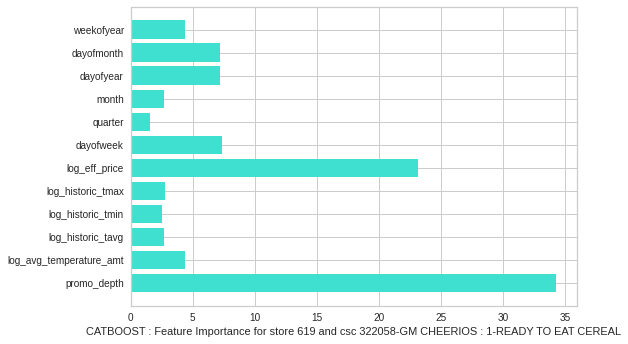

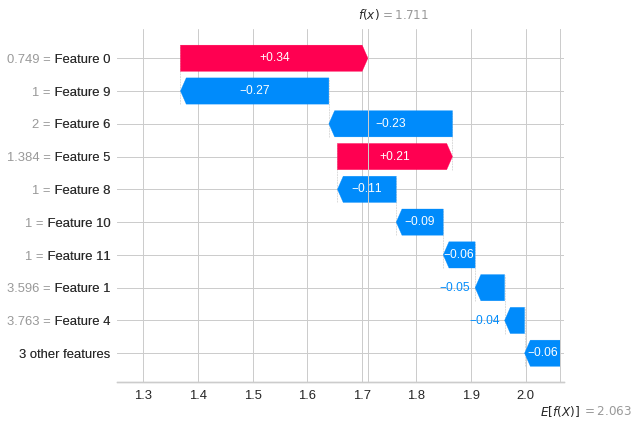

Processing store : 619 and csc : 322059
322059-GM CHEERIOS HONEY NUT 1-READY TO EAT CEREAL
Length of train data :  803
Length of test data :  169


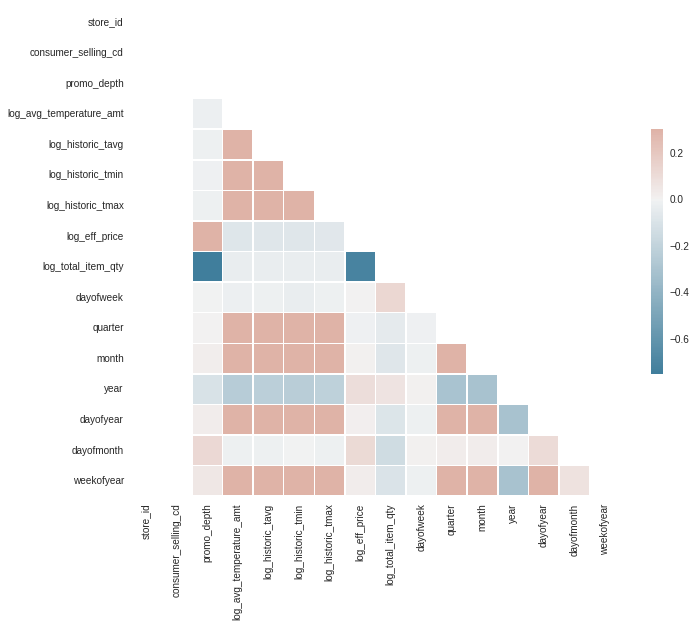

Calling xgboost_regression
Best parameters: {'subsample': 0.5, 'n_estimators': 10, 'max_depth': 3, 'learning_rate': 0.3, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.7}
Lowest RMSE:  0.6807576113035211


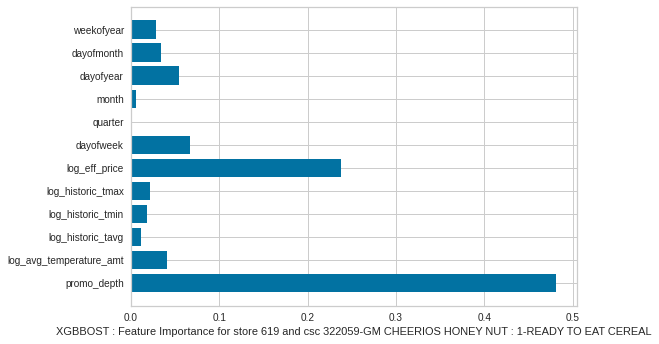

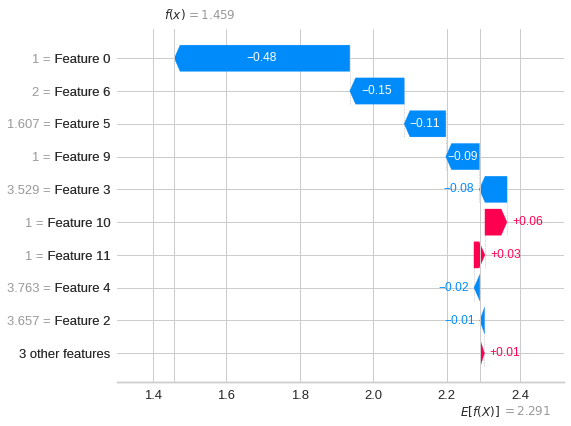

Calling lightgbm_regression
Fitting 5 folds for each of 65 candidates, totalling 325 fits


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


{'subsample': 0.5, 'random_state': 501, 'objective': 'regression', 'num_leaves': 10, 'min_split_gain': 0.01, 'min_data_in_leaf': 10, 'metric': 'mse', 'max_depth': 6, 'learning_rate': 0.05, 'colsample_bytree': 0.5, 'boosting_type': 'gbdt'}


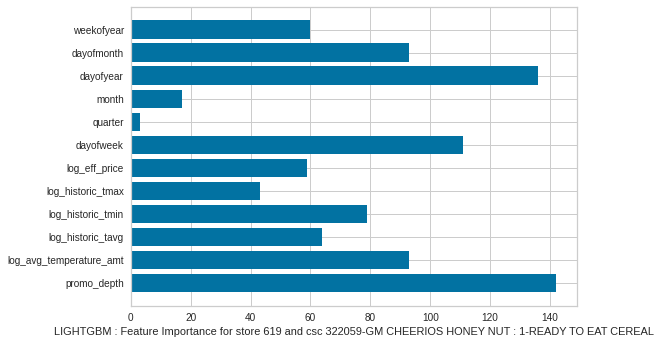

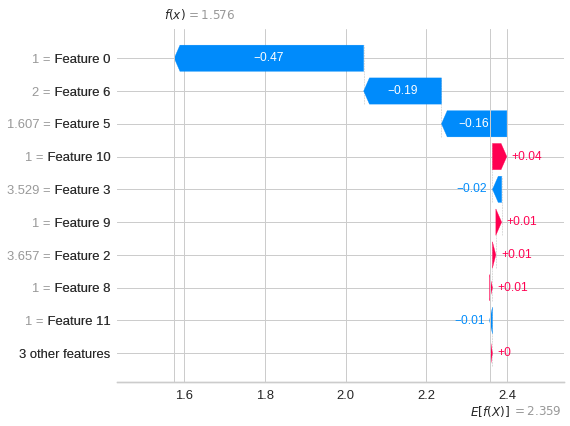

Calling catboost_regression

bestTest = 0.6362445322
bestIteration = 99

0:	loss: 0.6362445	best: 0.6362445 (0)	total: 74.7ms	remaining: 7.09s

bestTest = 0.5625006857
bestIteration = 89

1:	loss: 0.5625007	best: 0.5625007 (1)	total: 130ms	remaining: 6.12s

bestTest = 0.6342372523
bestIteration = 99

2:	loss: 0.6342373	best: 0.5625007 (1)	total: 191ms	remaining: 5.91s

bestTest = 0.5611539467
bestIteration = 99

3:	loss: 0.5611539	best: 0.5611539 (3)	total: 278ms	remaining: 6.39s

bestTest = 0.6348702611
bestIteration = 99

4:	loss: 0.6348703	best: 0.5611539 (3)	total: 325ms	remaining: 5.91s

bestTest = 0.5639632458
bestIteration = 88

5:	loss: 0.5639632	best: 0.5611539 (3)	total: 378ms	remaining: 5.67s

bestTest = 0.6375227545
bestIteration = 99

6:	loss: 0.6375228	best: 0.5611539 (3)	total: 426ms	remaining: 5.42s

bestTest = 0.555877202
bestIteration = 88

7:	loss: 0.5558772	best: 0.5558772 (7)	total: 469ms	remaining: 5.16s

bestTest = 0.5807165051
bestIteration = 149

8:	loss: 0.580

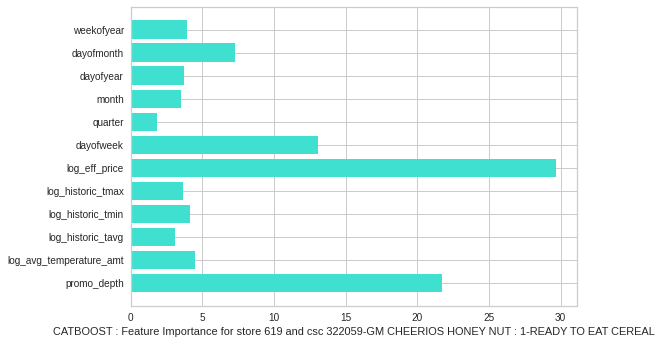

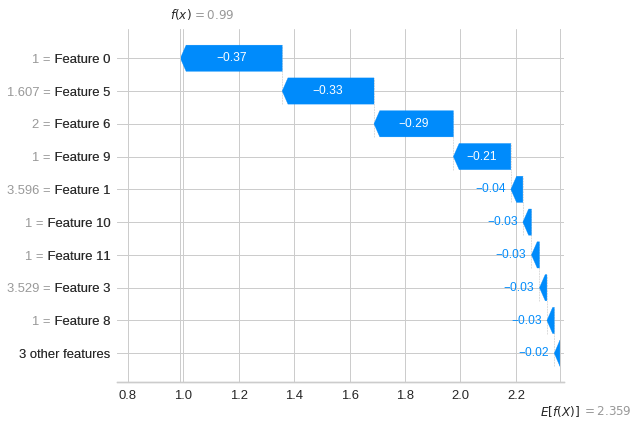

Processing store : 619 and csc : 322060
322060-GM CHEERIOS 1-READY TO EAT CEREAL
Length of train data :  770
Length of test data :  163


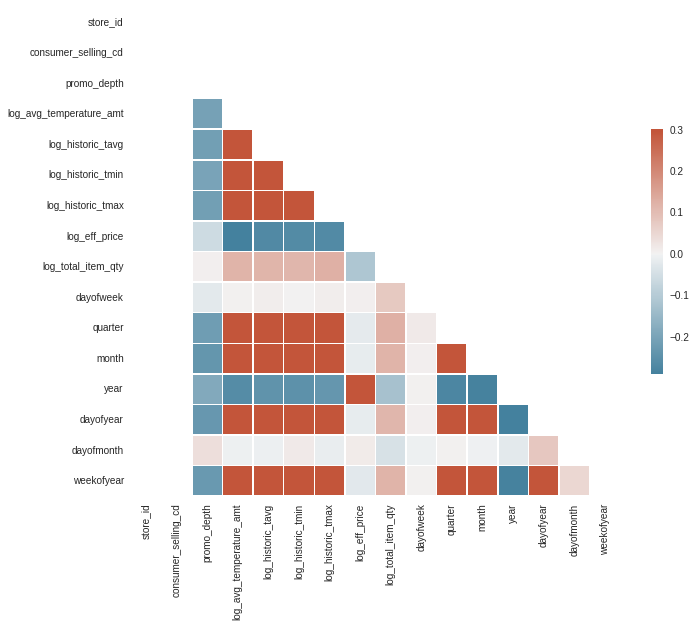

Calling xgboost_regression
Best parameters: {'subsample': 0.7999999999999999, 'n_estimators': 10, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.8999999999999999, 'colsample_bylevel': 0.5}
Lowest RMSE:  0.5141078876764669


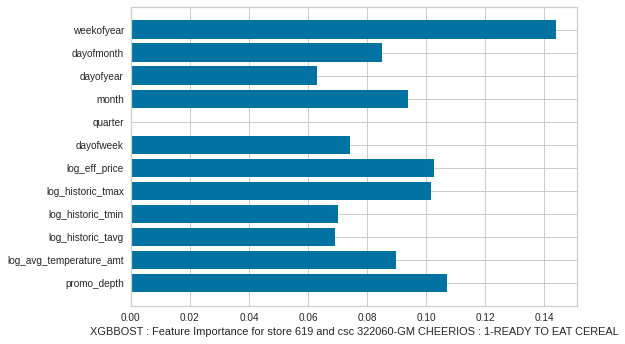

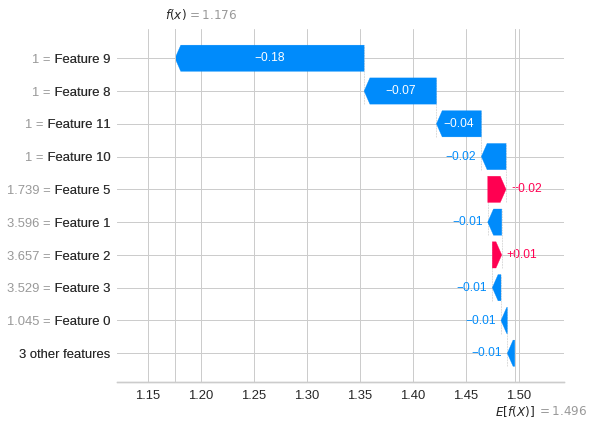

Calling lightgbm_regression
Fitting 5 folds for each of 33 candidates, totalling 165 fits


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


{'subsample': 0.5, 'random_state': 501, 'objective': 'regression', 'num_leaves': 10, 'min_split_gain': 0.01, 'min_data_in_leaf': 10, 'metric': 'mse', 'max_depth': 6, 'learning_rate': 0.05, 'colsample_bytree': 0.5, 'boosting_type': 'gbdt'}


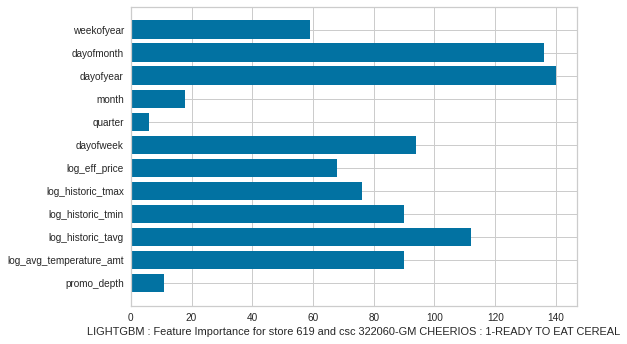

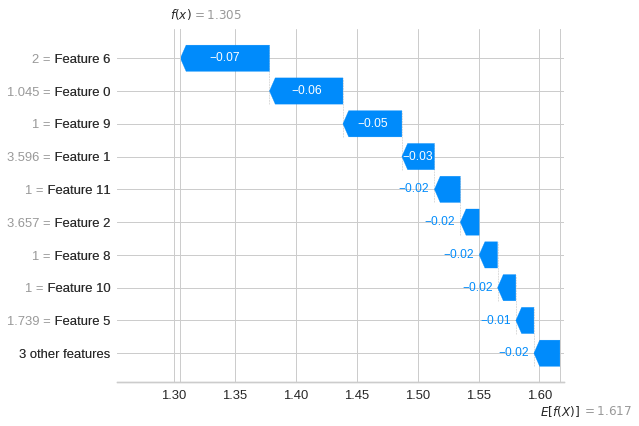

Calling catboost_regression

bestTest = 0.4757084432
bestIteration = 99

0:	loss: 0.4757084	best: 0.4757084 (0)	total: 100ms	remaining: 9.54s

bestTest = 0.4681535814
bestIteration = 44

1:	loss: 0.4681536	best: 0.4681536 (1)	total: 146ms	remaining: 6.88s

bestTest = 0.4754207577
bestIteration = 99

2:	loss: 0.4754208	best: 0.4681536 (1)	total: 200ms	remaining: 6.21s

bestTest = 0.4684481494
bestIteration = 41

3:	loss: 0.4684481	best: 0.4681536 (1)	total: 280ms	remaining: 6.43s

bestTest = 0.475729805
bestIteration = 99

4:	loss: 0.4757298	best: 0.4681536 (1)	total: 327ms	remaining: 5.95s

bestTest = 0.4684160324
bestIteration = 41

5:	loss: 0.4684160	best: 0.4681536 (1)	total: 380ms	remaining: 5.7s

bestTest = 0.476171866
bestIteration = 99

6:	loss: 0.4761719	best: 0.4681536 (1)	total: 439ms	remaining: 5.58s

bestTest = 0.4683912163
bestIteration = 41

7:	loss: 0.4683912	best: 0.4681536 (1)	total: 497ms	remaining: 5.47s

bestTest = 0.4690233155
bestIteration = 137

8:	loss: 0.469023

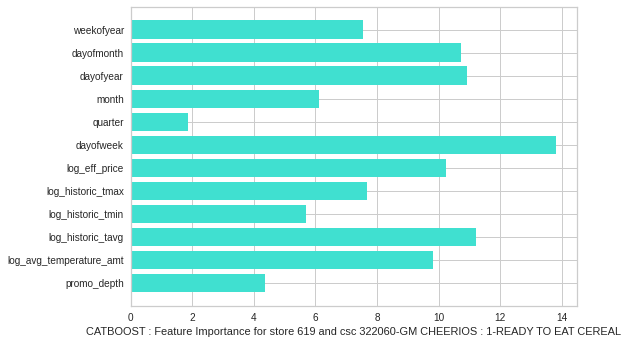

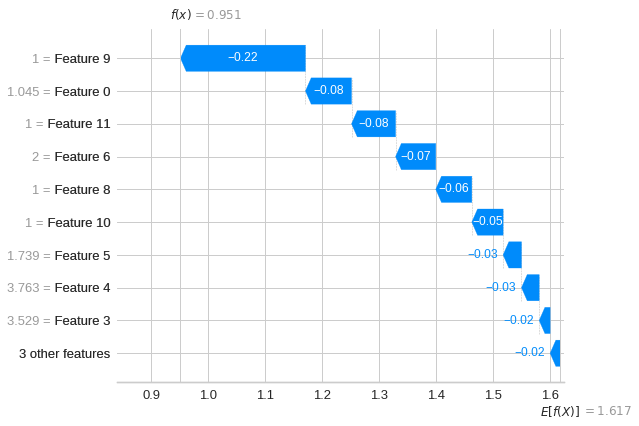

Processing store : 619 and csc : 322087
322087-GEN MILLS SHPR LG CEREAL 1-READY TO EAT CEREAL
Length of train data :  810
Length of test data :  172


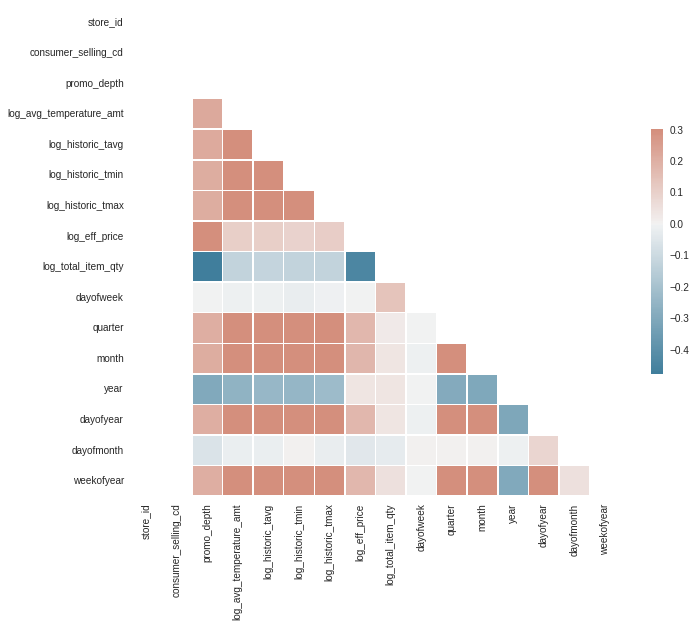

Calling xgboost_regression
Best parameters: {'subsample': 0.7999999999999999, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.7999999999999999}
Lowest RMSE:  0.5768373126858667


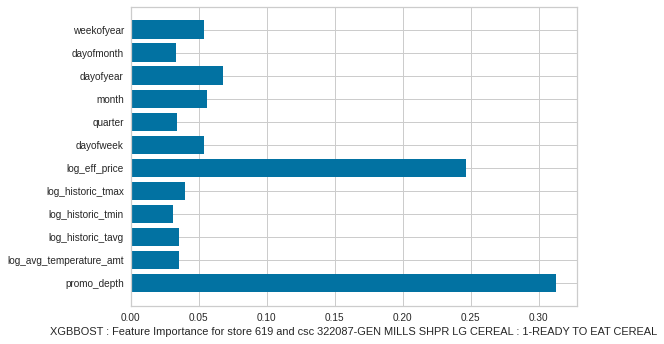

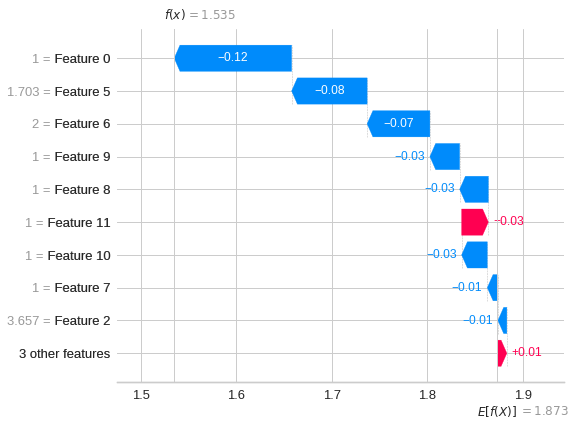

Calling lightgbm_regression
Fitting 5 folds for each of 65 candidates, totalling 325 fits


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


{'subsample': 0.5, 'random_state': 501, 'objective': 'regression', 'num_leaves': 10, 'min_split_gain': 0.01, 'min_data_in_leaf': 10, 'metric': 'mse', 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.7, 'boosting_type': 'gbdt'}


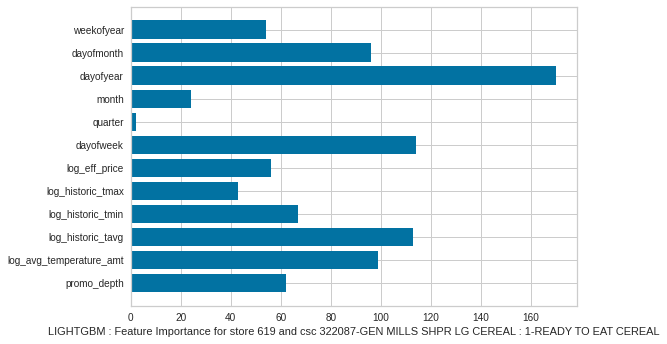

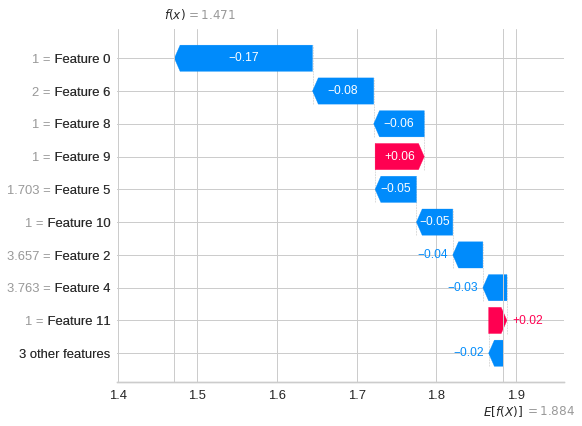

Calling catboost_regression

bestTest = 0.5538182892
bestIteration = 99

0:	loss: 0.5538183	best: 0.5538183 (0)	total: 71.7ms	remaining: 6.81s

bestTest = 0.5272159433
bestIteration = 94

1:	loss: 0.5272159	best: 0.5272159 (1)	total: 122ms	remaining: 5.74s

bestTest = 0.5535691009
bestIteration = 99

2:	loss: 0.5535691	best: 0.5272159 (1)	total: 167ms	remaining: 5.18s

bestTest = 0.5265273383
bestIteration = 98

3:	loss: 0.5265273	best: 0.5265273 (3)	total: 245ms	remaining: 5.63s

bestTest = 0.5556485731
bestIteration = 99

4:	loss: 0.5556486	best: 0.5265273 (3)	total: 294ms	remaining: 5.36s

bestTest = 0.5276655148
bestIteration = 79

5:	loss: 0.5276655	best: 0.5265273 (3)	total: 339ms	remaining: 5.09s

bestTest = 0.5562820096
bestIteration = 99

6:	loss: 0.5562820	best: 0.5265273 (3)	total: 385ms	remaining: 4.9s

bestTest = 0.5287035286
bestIteration = 79

7:	loss: 0.5287035	best: 0.5265273 (3)	total: 434ms	remaining: 4.77s

bestTest = 0.5385461811
bestIteration = 149

8:	loss: 0.538

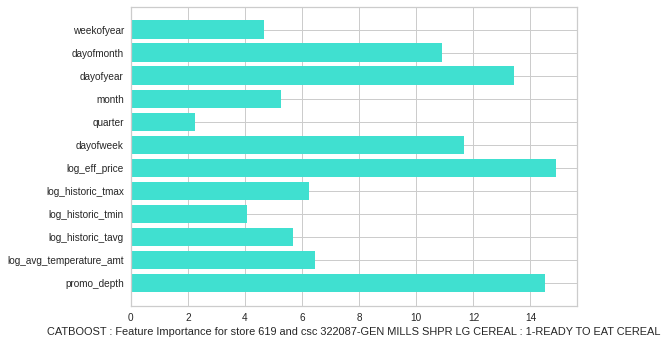

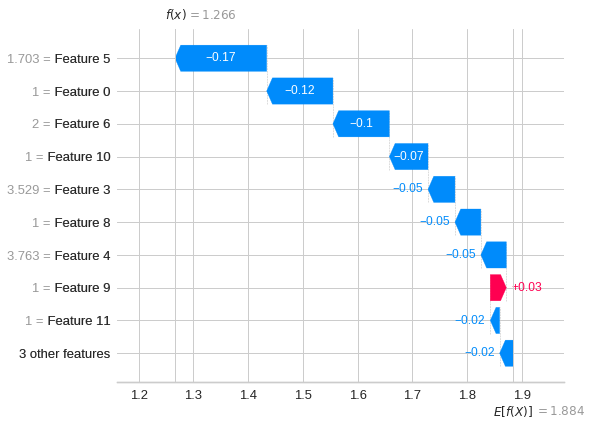

Processing store : 619 and csc : 322554
322554-KLLGG MIXED CRL BRANDS 4 FLAVORS     DSP 1-READY TO EAT CEREAL
Length of train data :  784
Length of test data :  160


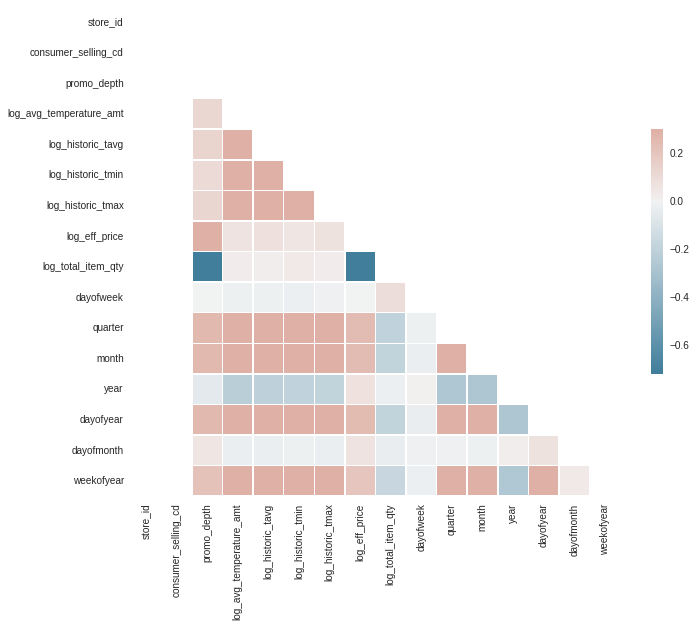

Calling xgboost_regression
Best parameters: {'subsample': 0.5, 'n_estimators': 10, 'max_depth': 3, 'learning_rate': 0.3, 'colsample_bytree': 0.8999999999999999, 'colsample_bylevel': 0.6}
Lowest RMSE:  0.6069313260908086


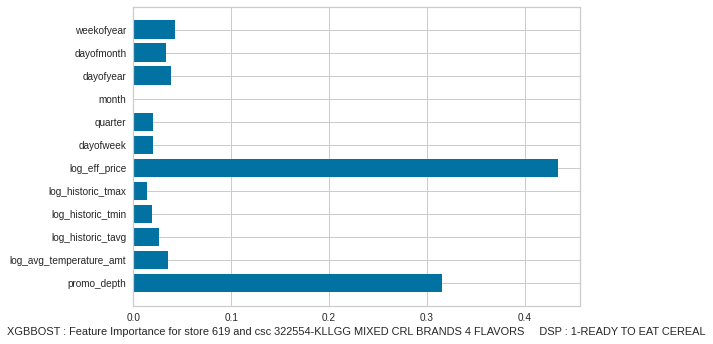

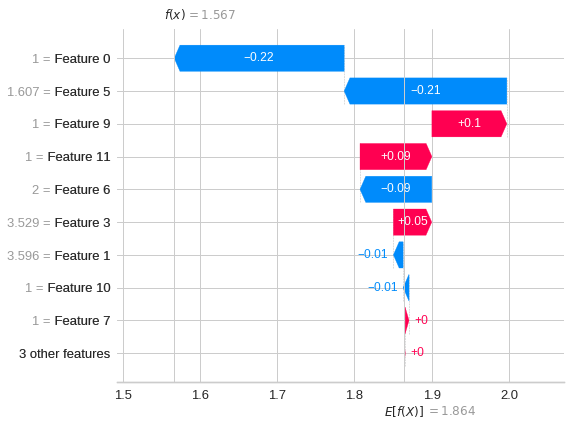

Calling lightgbm_regression
Fitting 5 folds for each of 82 candidates, totalling 410 fits


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


{'subsample': 0.7, 'random_state': 501, 'objective': 'regression', 'num_leaves': 10, 'min_split_gain': 0.01, 'min_data_in_leaf': 10, 'metric': 'mse', 'max_depth': 6, 'learning_rate': 0.05, 'colsample_bytree': 0.5, 'boosting_type': 'gbdt'}


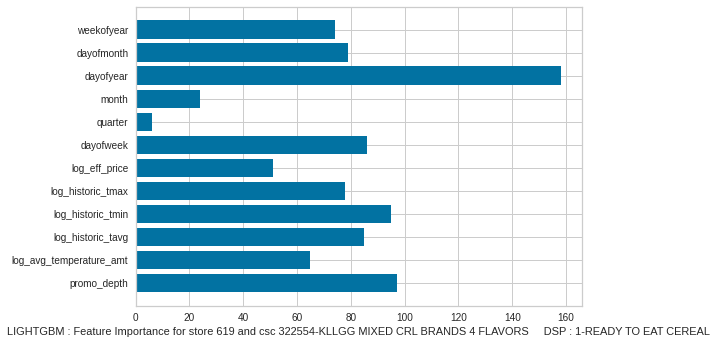

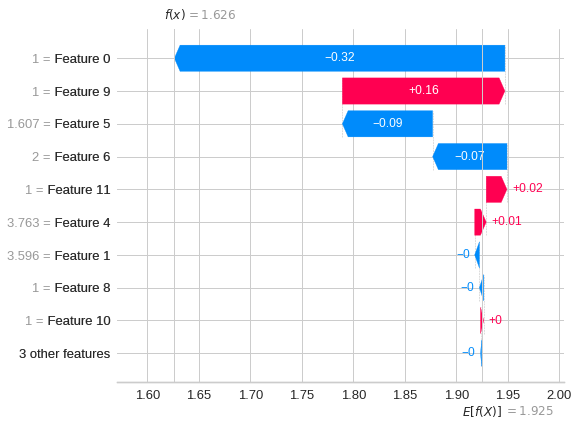

Calling catboost_regression

bestTest = 0.5923106466
bestIteration = 99

0:	loss: 0.5923106	best: 0.5923106 (0)	total: 84.2ms	remaining: 8s

bestTest = 0.5887938553
bestIteration = 98

1:	loss: 0.5887939	best: 0.5887939 (1)	total: 137ms	remaining: 6.44s

bestTest = 0.5922654261
bestIteration = 99

2:	loss: 0.5922654	best: 0.5887939 (1)	total: 192ms	remaining: 5.96s

bestTest = 0.5906456674
bestIteration = 99

3:	loss: 0.5906457	best: 0.5887939 (1)	total: 285ms	remaining: 6.54s

bestTest = 0.5920435127
bestIteration = 99

4:	loss: 0.5920435	best: 0.5887939 (1)	total: 336ms	remaining: 6.12s

bestTest = 0.5912856457
bestIteration = 32

5:	loss: 0.5912856	best: 0.5887939 (1)	total: 390ms	remaining: 5.84s

bestTest = 0.5917096321
bestIteration = 98

6:	loss: 0.5917096	best: 0.5887939 (1)	total: 439ms	remaining: 5.58s

bestTest = 0.5926551847
bestIteration = 35

7:	loss: 0.5926552	best: 0.5887939 (1)	total: 512ms	remaining: 5.63s

bestTest = 0.5884939594
bestIteration = 149

8:	loss: 0.58849

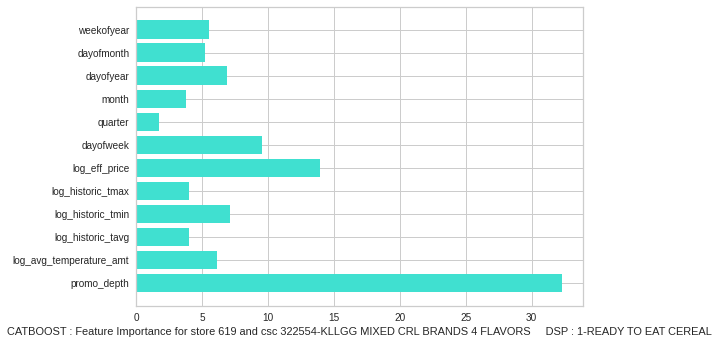

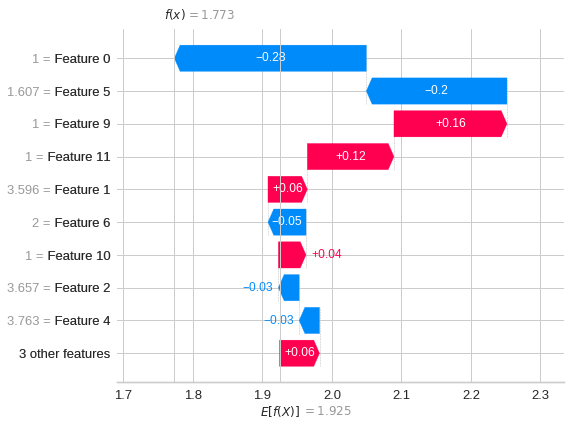

Processing store : 619 and csc : 146761
146761-SWNSN BROTH ASEPTIC CHICKEN 15-BOUILON BROTH
Length of train data :  700
Length of test data :  128


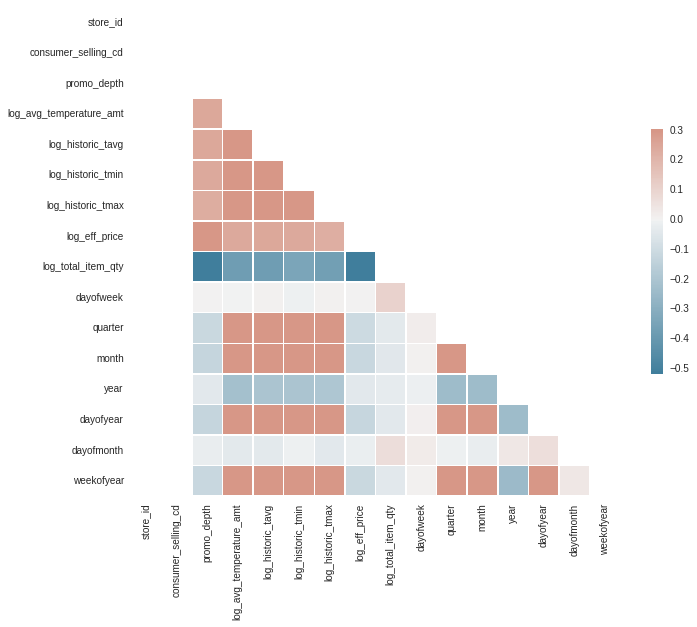

Calling xgboost_regression
Best parameters: {'subsample': 0.7, 'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.4}
Lowest RMSE:  0.5615961285940839


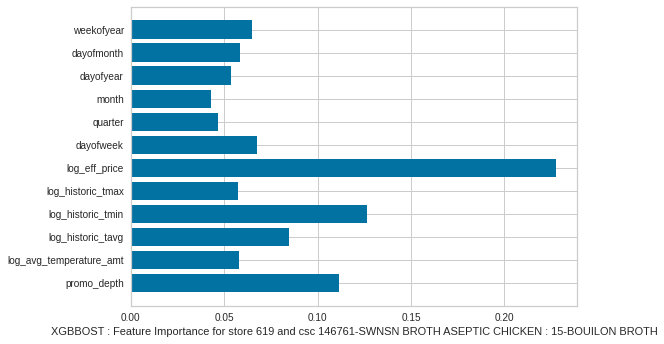

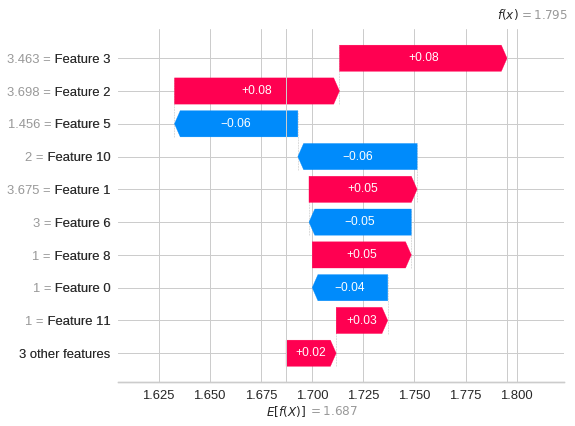

Calling lightgbm_regression
Fitting 5 folds for each of 58 candidates, totalling 290 fits


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


{'subsample': 0.7, 'random_state': 501, 'objective': 'regression', 'num_leaves': 10, 'min_split_gain': 0.01, 'min_data_in_leaf': 10, 'metric': 'mse', 'max_depth': 6, 'learning_rate': 0.05, 'colsample_bytree': 0.5, 'boosting_type': 'gbdt'}


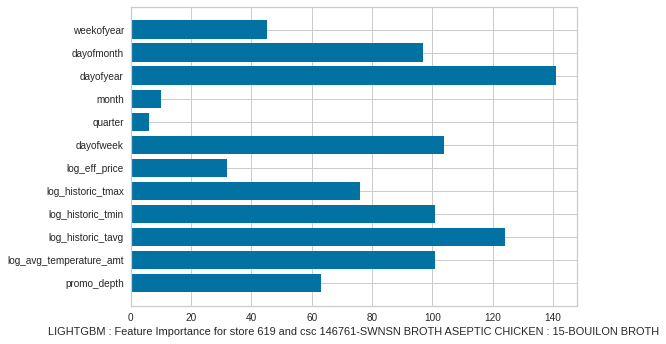

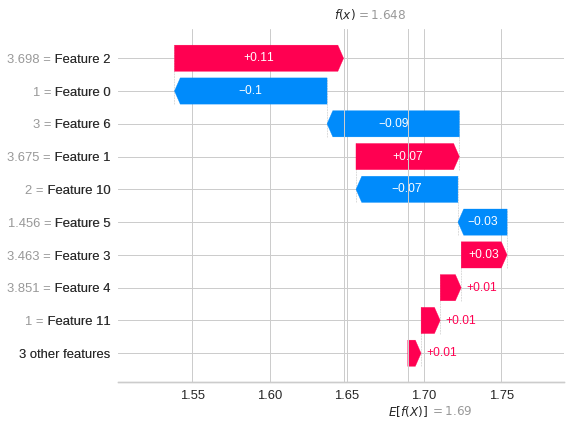

Calling catboost_regression

bestTest = 0.5719122994
bestIteration = 99

0:	loss: 0.5719123	best: 0.5719123 (0)	total: 95.6ms	remaining: 9.08s

bestTest = 0.5585249203
bestIteration = 98

1:	loss: 0.5585249	best: 0.5585249 (1)	total: 145ms	remaining: 6.83s

bestTest = 0.5723143465
bestIteration = 99

2:	loss: 0.5723143	best: 0.5585249 (1)	total: 206ms	remaining: 6.38s

bestTest = 0.5559766167
bestIteration = 97

3:	loss: 0.5559766	best: 0.5559766 (3)	total: 296ms	remaining: 6.81s

bestTest = 0.5735482496
bestIteration = 99

4:	loss: 0.5735482	best: 0.5559766 (3)	total: 342ms	remaining: 6.23s

bestTest = 0.5542582503
bestIteration = 82

5:	loss: 0.5542583	best: 0.5542583 (5)	total: 385ms	remaining: 5.77s

bestTest = 0.5743019063
bestIteration = 99

6:	loss: 0.5743019	best: 0.5542583 (5)	total: 455ms	remaining: 5.78s

bestTest = 0.5574756769
bestIteration = 99

7:	loss: 0.5574757	best: 0.5542583 (5)	total: 521ms	remaining: 5.72s

bestTest = 0.5639830839
bestIteration = 149

8:	loss: 0.56

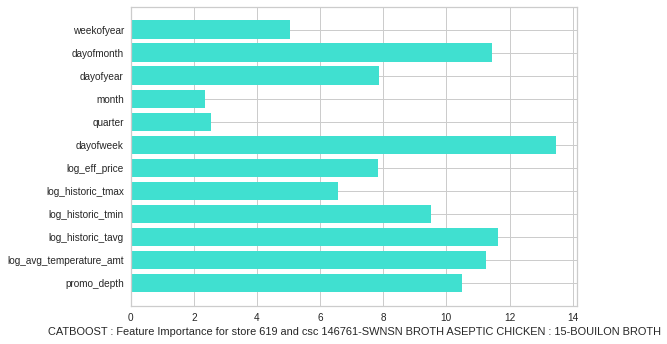

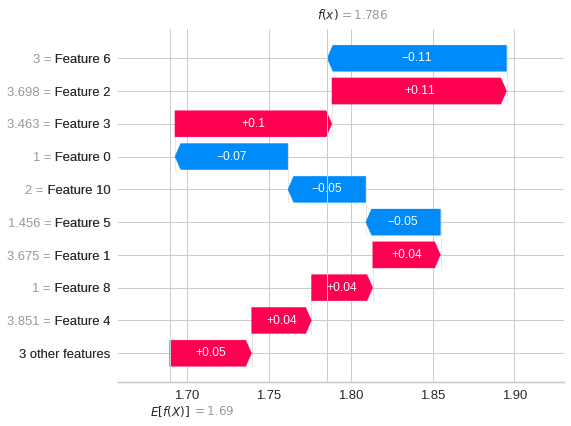

Processing store : 619 and csc : 322082
322082-GM CHEERIOS 1-READY TO EAT CEREAL
Length of train data :  797
Length of test data :  173


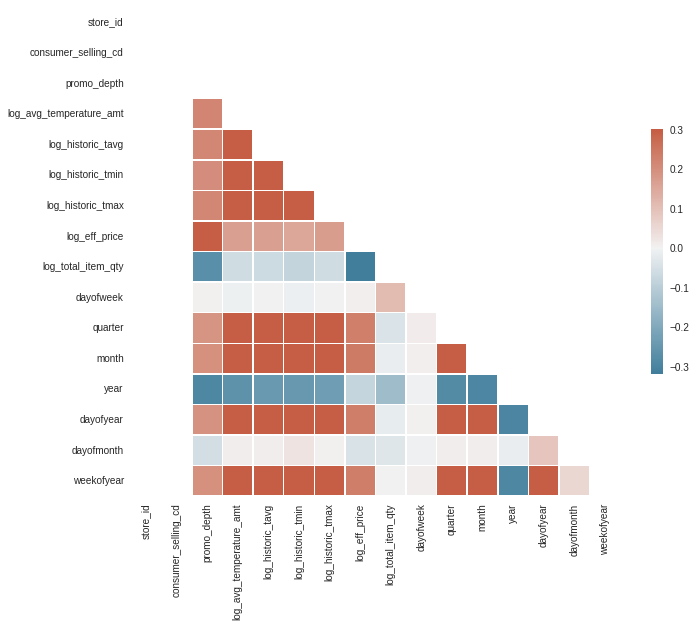

Calling xgboost_regression
Best parameters: {'subsample': 0.5, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.8999999999999999, 'colsample_bylevel': 0.5}
Lowest RMSE:  0.5577362173707493


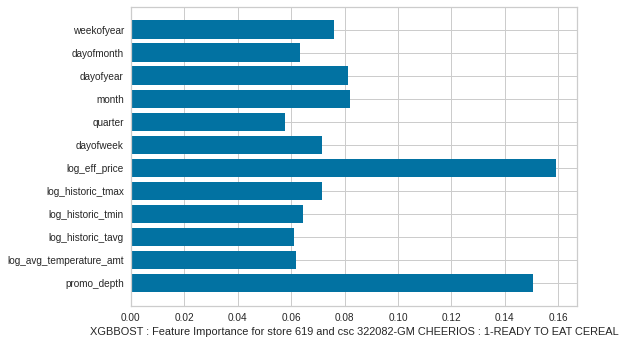

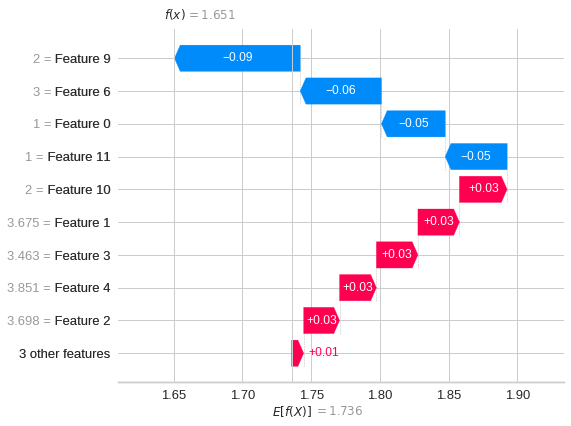

Calling lightgbm_regression
Fitting 5 folds for each of 56 candidates, totalling 280 fits


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


{'subsample': 0.5, 'random_state': 501, 'objective': 'regression', 'num_leaves': 10, 'min_split_gain': 0.01, 'min_data_in_leaf': 10, 'metric': 'mse', 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.7, 'boosting_type': 'gbdt'}


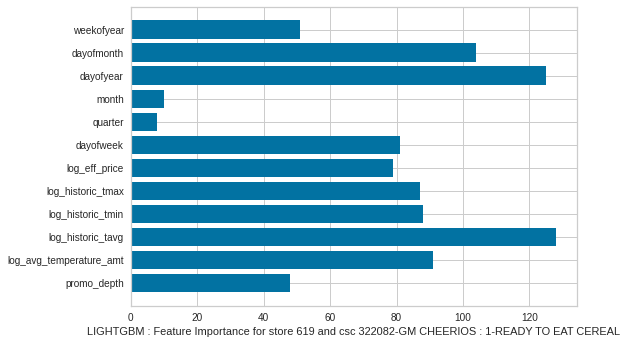

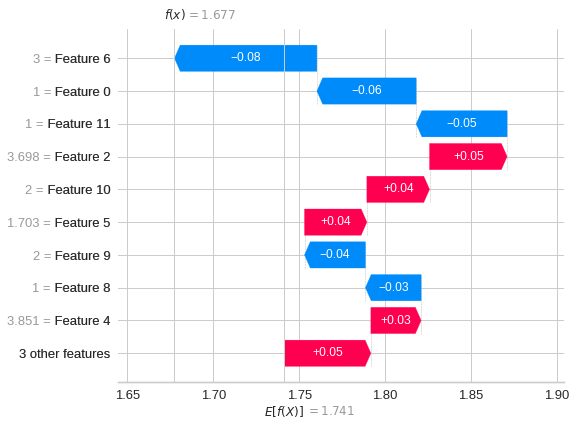

Calling catboost_regression

bestTest = 0.5879331885
bestIteration = 99

0:	loss: 0.5879332	best: 0.5879332 (0)	total: 91.3ms	remaining: 8.68s

bestTest = 0.5643764751
bestIteration = 98

1:	loss: 0.5643765	best: 0.5643765 (1)	total: 144ms	remaining: 6.78s

bestTest = 0.5886362444
bestIteration = 99

2:	loss: 0.5886362	best: 0.5643765 (1)	total: 197ms	remaining: 6.12s

bestTest = 0.5676926858
bestIteration = 98

3:	loss: 0.5676927	best: 0.5643765 (1)	total: 275ms	remaining: 6.33s

bestTest = 0.5890182968
bestIteration = 99

4:	loss: 0.5890183	best: 0.5643765 (1)	total: 338ms	remaining: 6.15s

bestTest = 0.569568683
bestIteration = 92

5:	loss: 0.5695687	best: 0.5643765 (1)	total: 383ms	remaining: 5.75s

bestTest = 0.5903911864
bestIteration = 99

6:	loss: 0.5903912	best: 0.5643765 (1)	total: 431ms	remaining: 5.48s

bestTest = 0.5693953407
bestIteration = 87

7:	loss: 0.5693953	best: 0.5643765 (1)	total: 510ms	remaining: 5.61s

bestTest = 0.5742230265
bestIteration = 149

8:	loss: 0.574

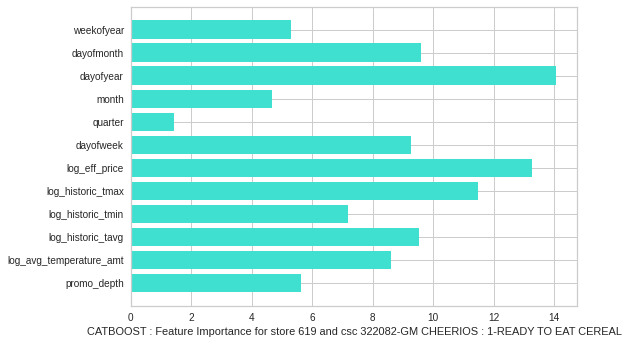

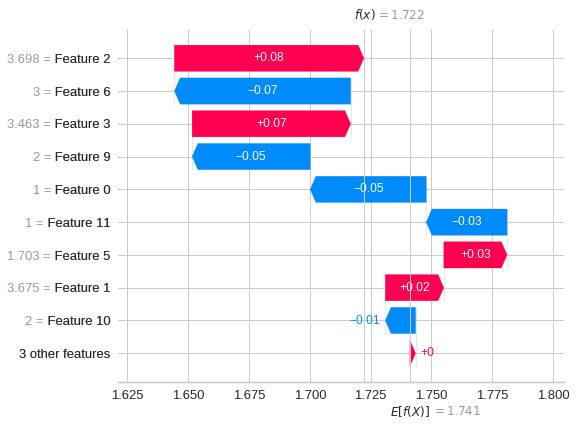

Processing store : 619 and csc : 322625
322625-KLLGGS SPCL K CEREAL RED BERRIES 1-READY TO EAT CEREAL
Length of train data :  746
Length of test data :  163


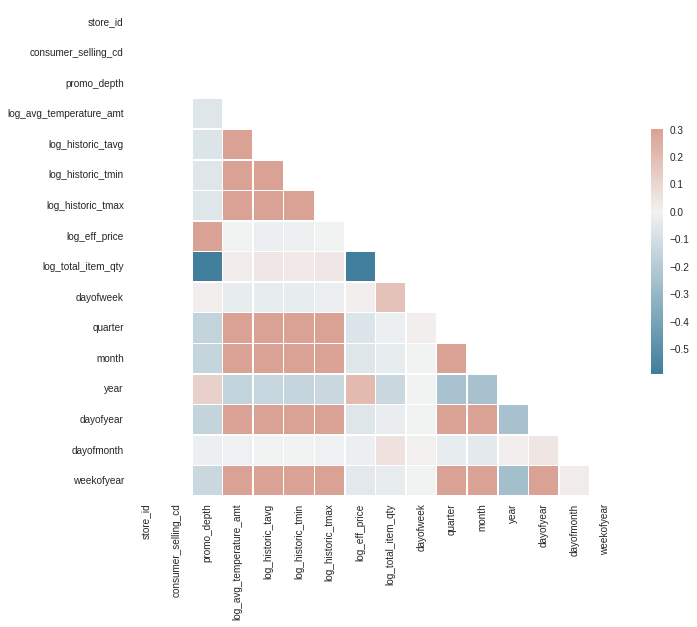

Calling xgboost_regression
Best parameters: {'subsample': 0.8999999999999999, 'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.7999999999999999, 'colsample_bylevel': 0.4}
Lowest RMSE:  0.6453800242633029


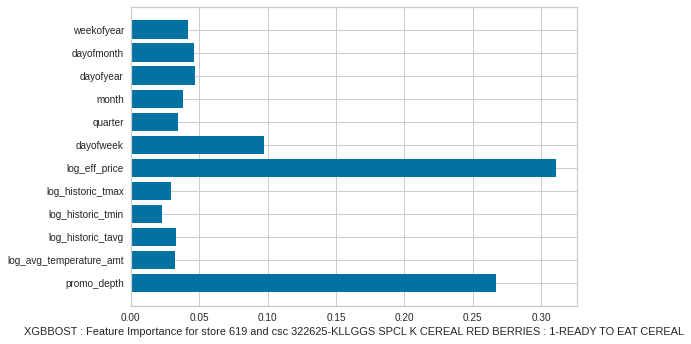

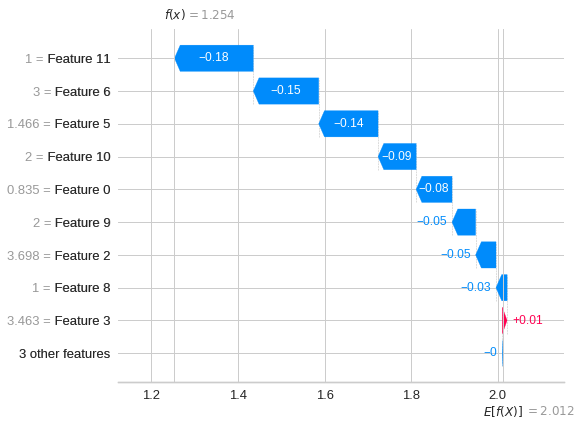

Calling lightgbm_regression
Fitting 5 folds for each of 14 candidates, totalling 70 fits


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


{'subsample': 0.7, 'random_state': 501, 'objective': 'regression', 'num_leaves': 40, 'min_split_gain': 0.01, 'min_data_in_leaf': 10, 'metric': 'mse', 'max_depth': 6, 'learning_rate': 0.05, 'colsample_bytree': 0.5, 'boosting_type': 'gbdt'}


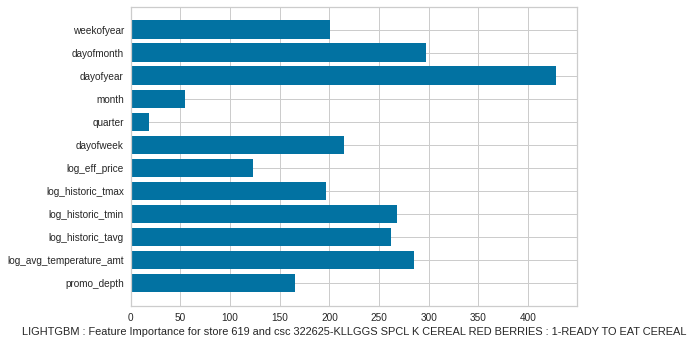

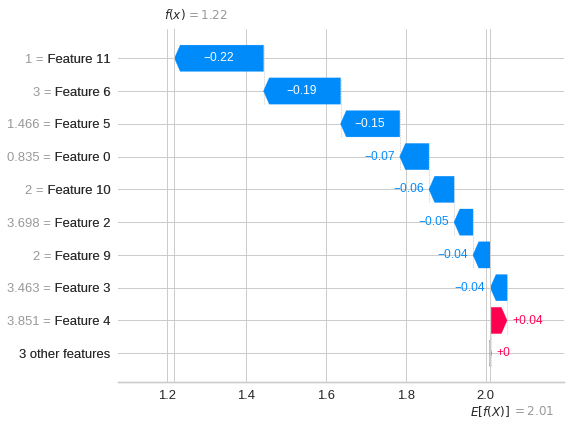

Calling catboost_regression

bestTest = 0.6804590383
bestIteration = 99

0:	loss: 0.6804590	best: 0.6804590 (0)	total: 96.3ms	remaining: 9.14s

bestTest = 0.6340617683
bestIteration = 77

1:	loss: 0.6340618	best: 0.6340618 (1)	total: 146ms	remaining: 6.88s

bestTest = 0.6807160181
bestIteration = 99

2:	loss: 0.6807160	best: 0.6340618 (1)	total: 205ms	remaining: 6.36s

bestTest = 0.6397141581
bestIteration = 63

3:	loss: 0.6397142	best: 0.6340618 (1)	total: 277ms	remaining: 6.36s

bestTest = 0.6816508426
bestIteration = 99

4:	loss: 0.6816508	best: 0.6340618 (1)	total: 326ms	remaining: 5.93s

bestTest = 0.642074455
bestIteration = 91

5:	loss: 0.6420745	best: 0.6340618 (1)	total: 370ms	remaining: 5.55s

bestTest = 0.6815115357
bestIteration = 99

6:	loss: 0.6815115	best: 0.6340618 (1)	total: 454ms	remaining: 5.78s

bestTest = 0.6383435777
bestIteration = 79

7:	loss: 0.6383436	best: 0.6340618 (1)	total: 529ms	remaining: 5.82s

bestTest = 0.6585333462
bestIteration = 149

8:	loss: 0.658

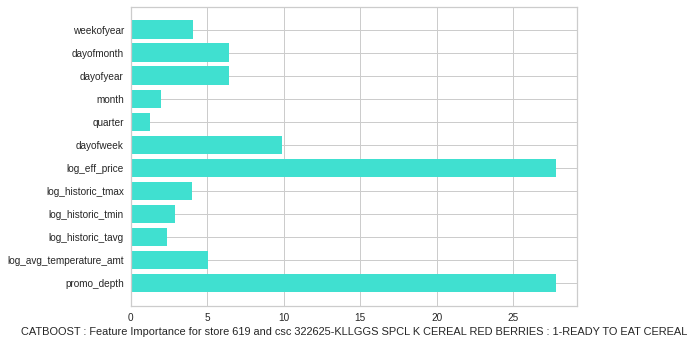

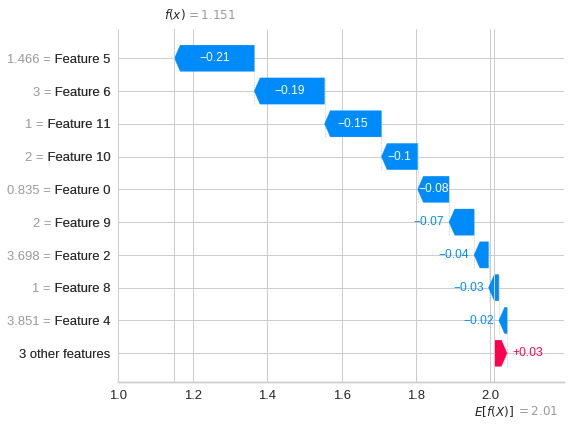

Processing store : 619 and csc : 460913
460913-GM CHEERIOS HONEY NUT 1-READY TO EAT CEREAL
Length of train data :  761
Length of test data :  153


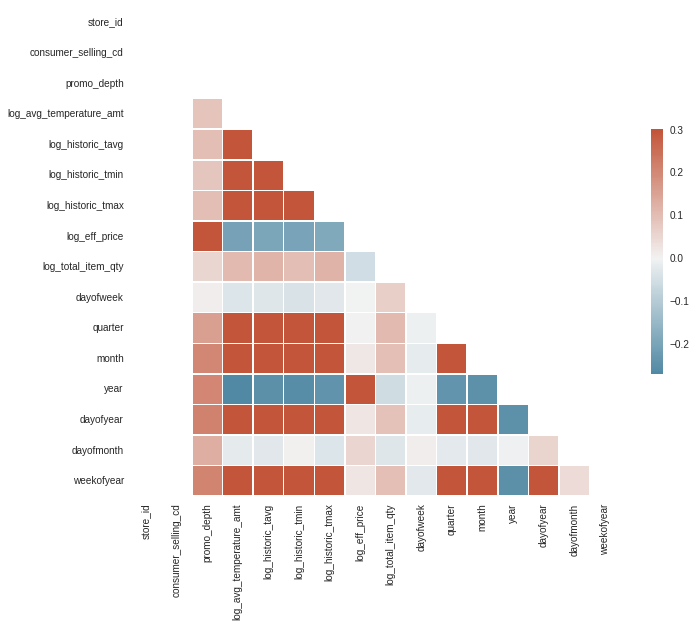

Calling xgboost_regression
Best parameters: {'subsample': 0.8999999999999999, 'n_estimators': 10, 'max_depth': 3, 'learning_rate': 0.3, 'colsample_bytree': 0.7999999999999999, 'colsample_bylevel': 0.4}
Lowest RMSE:  0.5303846052419284


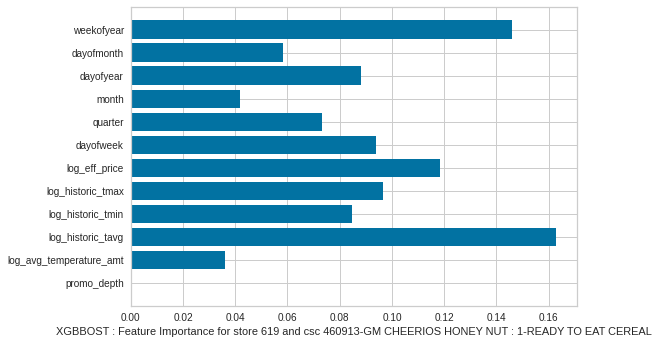

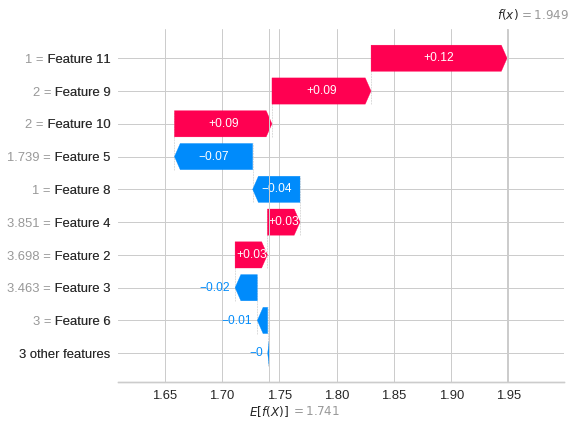

Calling lightgbm_regression
Fitting 5 folds for each of 39 candidates, totalling 195 fits


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


{'subsample': 0.5, 'random_state': 501, 'objective': 'regression', 'num_leaves': 10, 'min_split_gain': 0.01, 'min_data_in_leaf': 10, 'metric': 'mse', 'max_depth': 8, 'learning_rate': 0.05, 'colsample_bytree': 0.5, 'boosting_type': 'gbdt'}


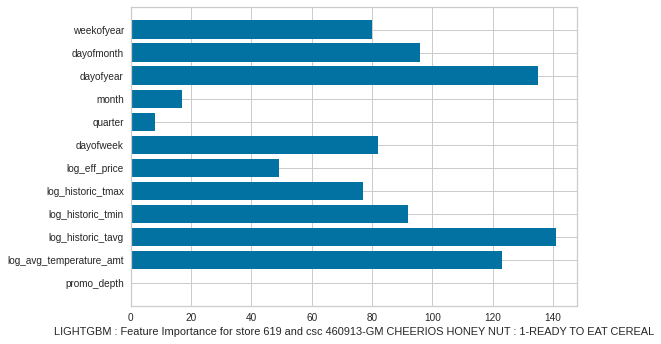

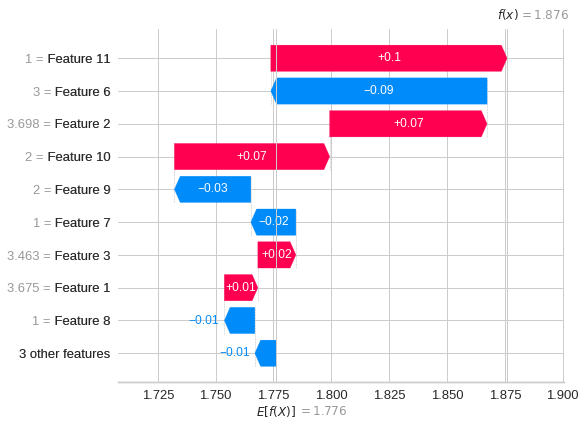

Calling catboost_regression

bestTest = 0.529635837
bestIteration = 99

0:	loss: 0.5296358	best: 0.5296358 (0)	total: 80.5ms	remaining: 7.65s

bestTest = 0.5108974658
bestIteration = 92

1:	loss: 0.5108975	best: 0.5108975 (1)	total: 127ms	remaining: 5.95s

bestTest = 0.5296556077
bestIteration = 99

2:	loss: 0.5296556	best: 0.5108975 (1)	total: 172ms	remaining: 5.33s

bestTest = 0.5121839197
bestIteration = 98

3:	loss: 0.5121839	best: 0.5108975 (1)	total: 238ms	remaining: 5.47s

bestTest = 0.5297839858
bestIteration = 99

4:	loss: 0.5297840	best: 0.5108975 (1)	total: 328ms	remaining: 5.97s

bestTest = 0.5131620781
bestIteration = 98

5:	loss: 0.5131621	best: 0.5108975 (1)	total: 377ms	remaining: 5.66s

bestTest = 0.5305780552
bestIteration = 99

6:	loss: 0.5305781	best: 0.5108975 (1)	total: 423ms	remaining: 5.38s

bestTest = 0.5107799246
bestIteration = 99

7:	loss: 0.5107799	best: 0.5107799 (7)	total: 492ms	remaining: 5.42s

bestTest = 0.5205048609
bestIteration = 149

8:	loss: 0.520

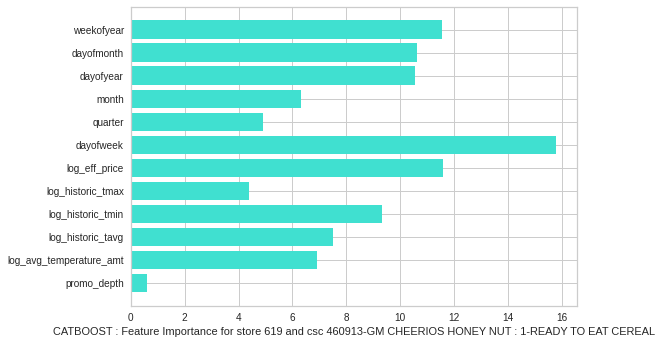

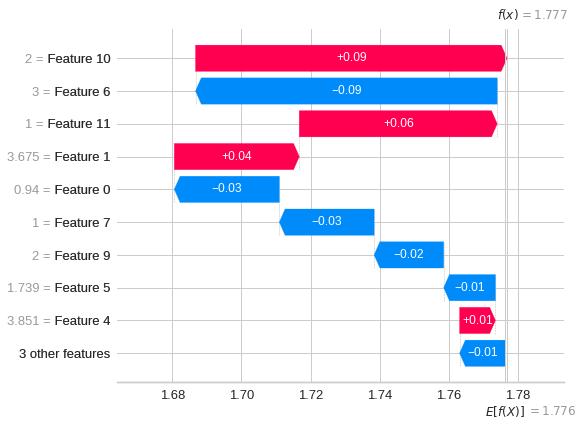

Processing store : 619 and csc : 322557
322557-RB FF FMW MOD GACB                   DSP 1-READY TO EAT CEREAL
Length of train data :  807
Length of test data :  191


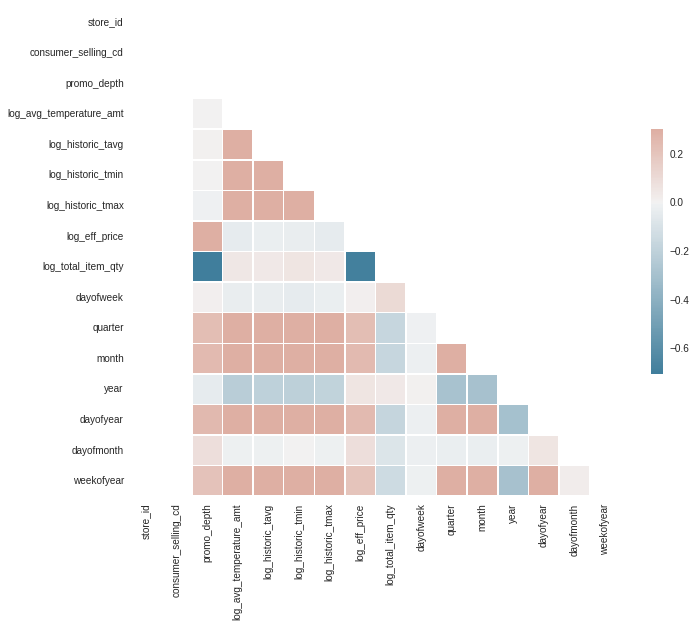

Calling xgboost_regression
Best parameters: {'subsample': 0.6, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.8999999999999999, 'colsample_bylevel': 0.7999999999999999}
Lowest RMSE:  0.691591023204673


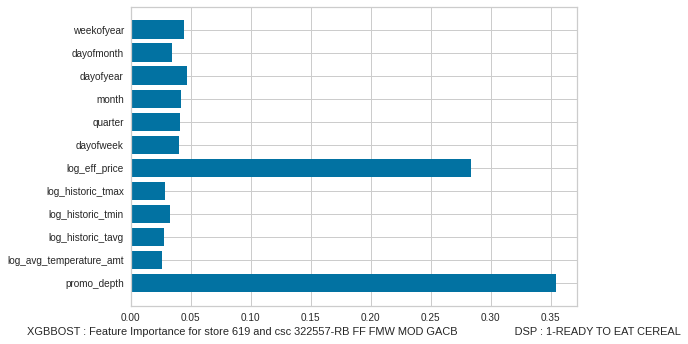

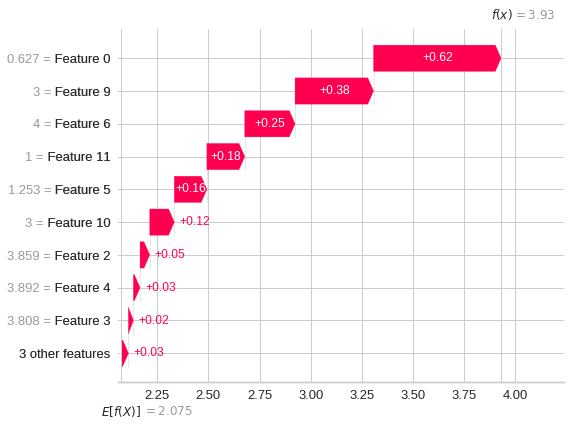

Calling lightgbm_regression
Fitting 5 folds for each of 92 candidates, totalling 460 fits


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


{'subsample': 0.5, 'random_state': 501, 'objective': 'regression', 'num_leaves': 10, 'min_split_gain': 0.01, 'min_data_in_leaf': 10, 'metric': 'mse', 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.7, 'boosting_type': 'gbdt'}


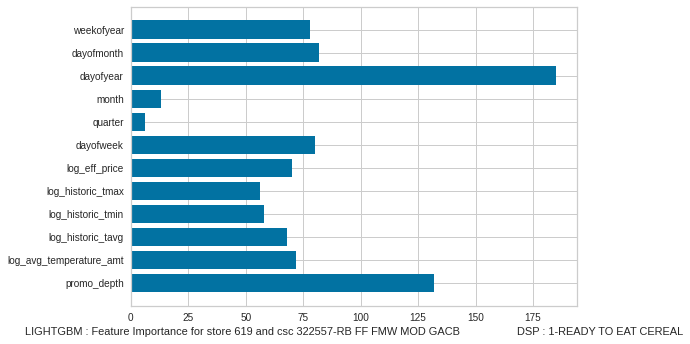

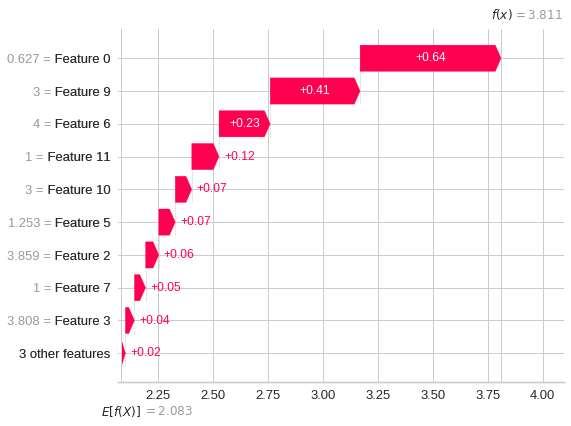

Calling catboost_regression

bestTest = 0.6896038944
bestIteration = 99

0:	loss: 0.6896039	best: 0.6896039 (0)	total: 109ms	remaining: 10.3s

bestTest = 0.6402633032
bestIteration = 94

1:	loss: 0.6402633	best: 0.6402633 (1)	total: 157ms	remaining: 7.37s

bestTest = 0.6902057683
bestIteration = 99

2:	loss: 0.6902058	best: 0.6402633 (1)	total: 242ms	remaining: 7.51s

bestTest = 0.6398822167
bestIteration = 97

3:	loss: 0.6398822	best: 0.6398822 (3)	total: 325ms	remaining: 7.47s

bestTest = 0.6886924819
bestIteration = 99

4:	loss: 0.6886925	best: 0.6398822 (3)	total: 370ms	remaining: 6.74s

bestTest = 0.6389456966
bestIteration = 97

5:	loss: 0.6389457	best: 0.6389457 (5)	total: 422ms	remaining: 6.33s

bestTest = 0.6927574371
bestIteration = 99

6:	loss: 0.6927574	best: 0.6389457 (5)	total: 493ms	remaining: 6.27s

bestTest = 0.6486483803
bestIteration = 84

7:	loss: 0.6486484	best: 0.6389457 (5)	total: 557ms	remaining: 6.13s

bestTest = 0.6630404095
bestIteration = 149

8:	loss: 0.663

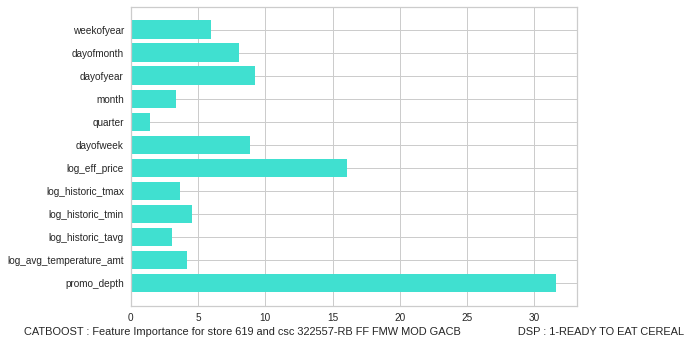

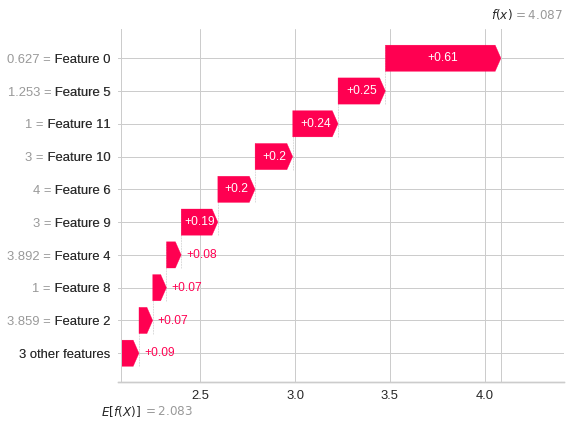

Processing store : 619 and csc : 413364
413364-O ORGNC BROTH CHICKEN LOW SODIUM ASEPTIC 15-BOUILON BROTH
Length of train data :  580
Length of test data :  146


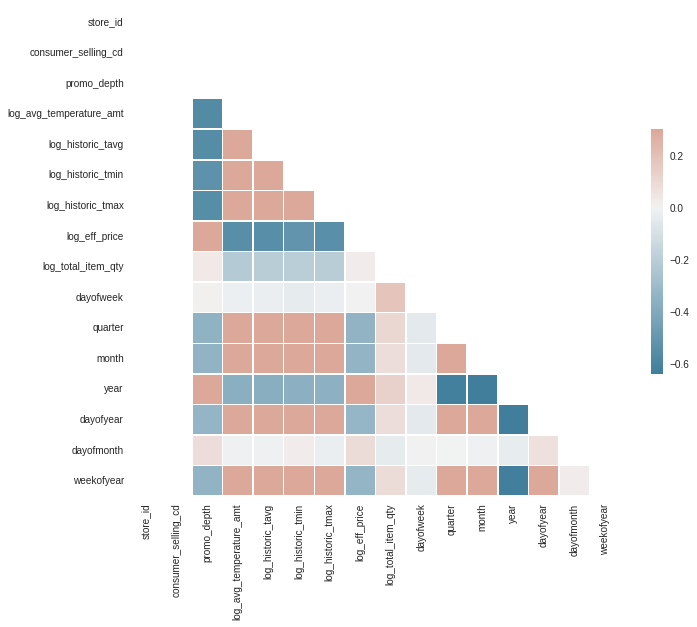

Calling xgboost_regression
Best parameters: {'subsample': 0.7, 'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.5}
Lowest RMSE:  0.6248851681517912


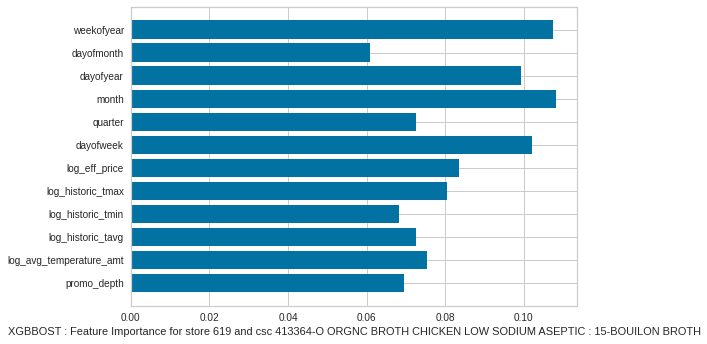

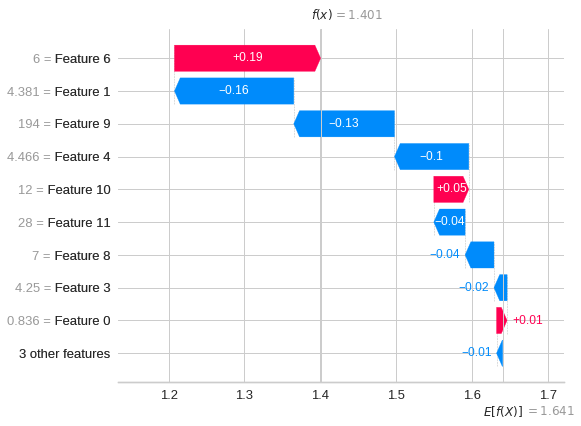

Calling lightgbm_regression
Fitting 5 folds for each of 20 candidates, totalling 100 fits


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


{'subsample': 0.5, 'random_state': 501, 'objective': 'regression', 'num_leaves': 10, 'min_split_gain': 0.01, 'min_data_in_leaf': 10, 'metric': 'mse', 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.5, 'boosting_type': 'gbdt'}


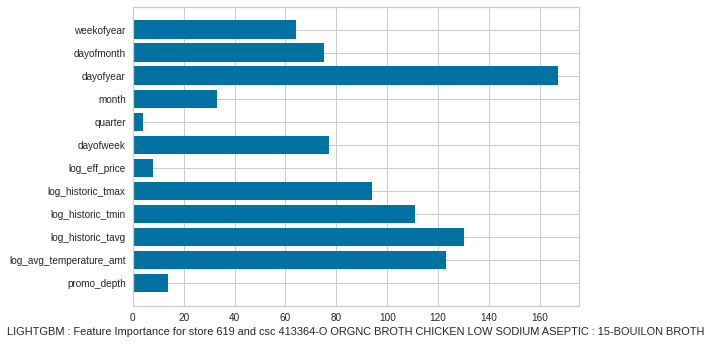

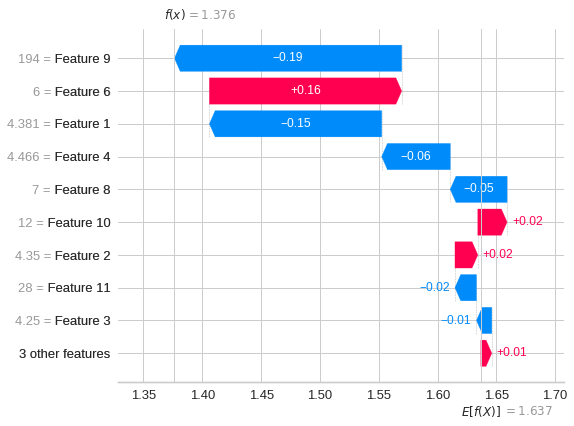

Calling catboost_regression

bestTest = 0.5834540119
bestIteration = 99

0:	loss: 0.5834540	best: 0.5834540 (0)	total: 104ms	remaining: 9.9s

bestTest = 0.5592635764
bestIteration = 64

1:	loss: 0.5592636	best: 0.5592636 (1)	total: 161ms	remaining: 7.55s

bestTest = 0.583706672
bestIteration = 99

2:	loss: 0.5837067	best: 0.5592636 (1)	total: 219ms	remaining: 6.79s

bestTest = 0.5572478387
bestIteration = 65

3:	loss: 0.5572478	best: 0.5572478 (3)	total: 291ms	remaining: 6.69s

bestTest = 0.5846276743
bestIteration = 99

4:	loss: 0.5846277	best: 0.5572478 (3)	total: 343ms	remaining: 6.24s

bestTest = 0.5586426064
bestIteration = 67

5:	loss: 0.5586426	best: 0.5572478 (3)	total: 389ms	remaining: 5.83s

bestTest = 0.5858537362
bestIteration = 99

6:	loss: 0.5858537	best: 0.5572478 (3)	total: 456ms	remaining: 5.8s

bestTest = 0.5584090848
bestIteration = 66

7:	loss: 0.5584091	best: 0.5572478 (3)	total: 532ms	remaining: 5.85s

bestTest = 0.5637939335
bestIteration = 149

8:	loss: 0.563793

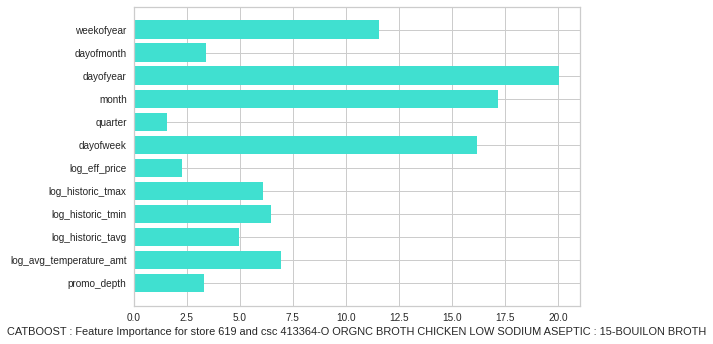

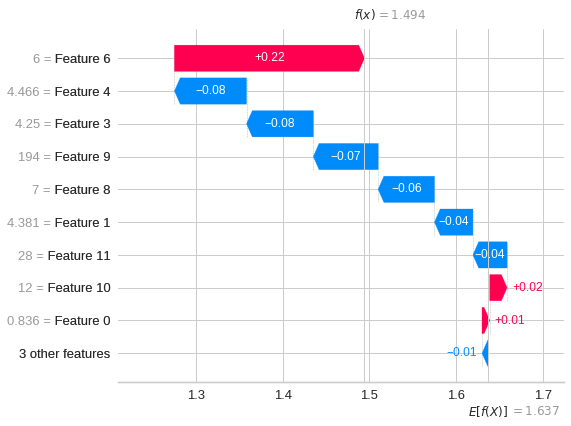

Processing store : 326 and csc : 147065
147065-O ORGNC BROTH CHICKEN ASEPTIC 15-BOUILON BROTH
Length of train data :  389
Length of test data :  93


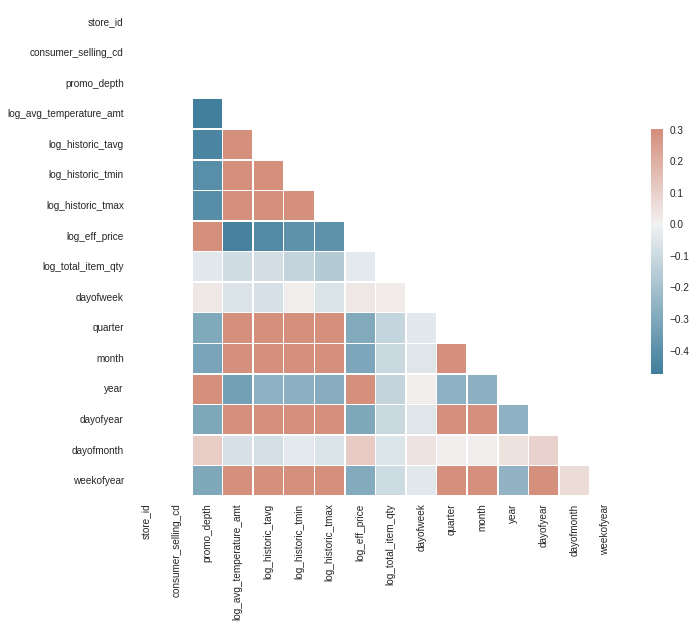

Calling xgboost_regression
Best parameters: {'subsample': 0.8999999999999999, 'n_estimators': 10, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.7}
Lowest RMSE:  0.452352198836325


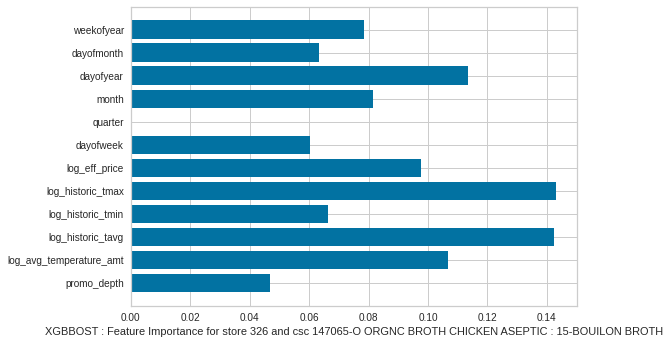

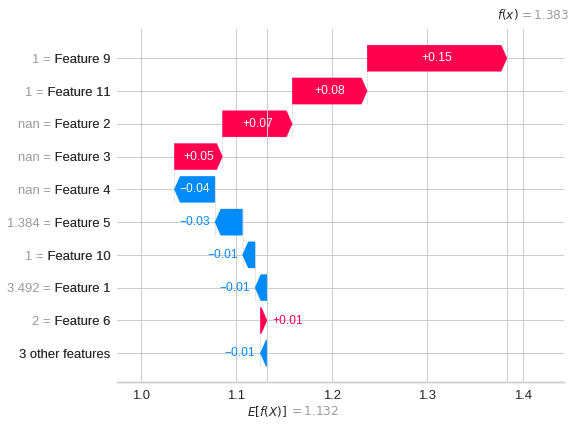

Calling lightgbm_regression
Fitting 5 folds for each of 79 candidates, totalling 395 fits


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


{'subsample': 0.5, 'random_state': 501, 'objective': 'regression', 'num_leaves': 10, 'min_split_gain': 0.01, 'min_data_in_leaf': 10, 'metric': 'mse', 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.5, 'boosting_type': 'gbdt'}


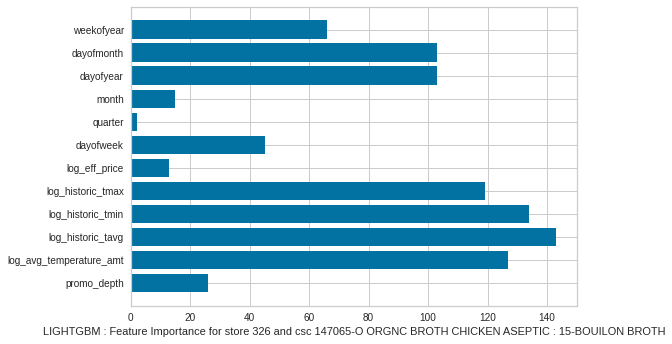

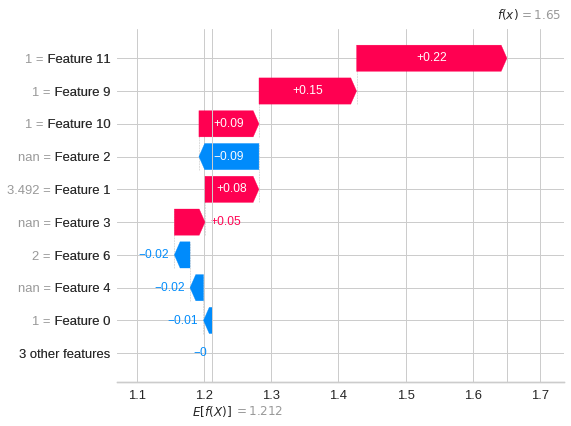

Calling catboost_regression

bestTest = 0.4125910165
bestIteration = 99

0:	loss: 0.4125910	best: 0.4125910 (0)	total: 94.9ms	remaining: 9.01s

bestTest = 0.3996638479
bestIteration = 43

1:	loss: 0.3996638	best: 0.3996638 (1)	total: 149ms	remaining: 7s

bestTest = 0.4124163473
bestIteration = 99

2:	loss: 0.4124163	best: 0.3996638 (1)	total: 192ms	remaining: 5.96s

bestTest = 0.4006044619
bestIteration = 53

3:	loss: 0.4006045	best: 0.3996638 (1)	total: 262ms	remaining: 6.01s

bestTest = 0.4129422689
bestIteration = 99

4:	loss: 0.4129423	best: 0.3996638 (1)	total: 332ms	remaining: 6.05s

bestTest = 0.4005996022
bestIteration = 43

5:	loss: 0.4005996	best: 0.3996638 (1)	total: 375ms	remaining: 5.62s

bestTest = 0.4131514829
bestIteration = 99

6:	loss: 0.4131515	best: 0.3996638 (1)	total: 417ms	remaining: 5.29s

bestTest = 0.4019192319
bestIteration = 43

7:	loss: 0.4019192	best: 0.3996638 (1)	total: 458ms	remaining: 5.04s

bestTest = 0.4039104432
bestIteration = 149

8:	loss: 0.40391

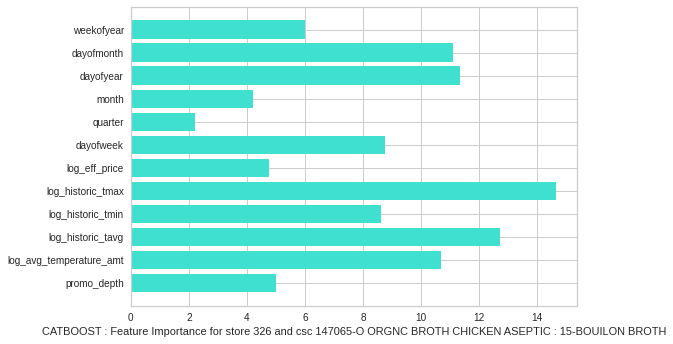

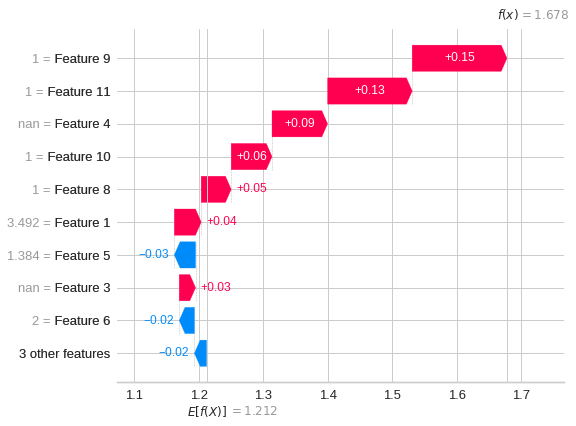

Processing store : 326 and csc : 322059
322059-GM CHEERIOS HONEY NUT 1-READY TO EAT CEREAL
Length of train data :  601
Length of test data :  130


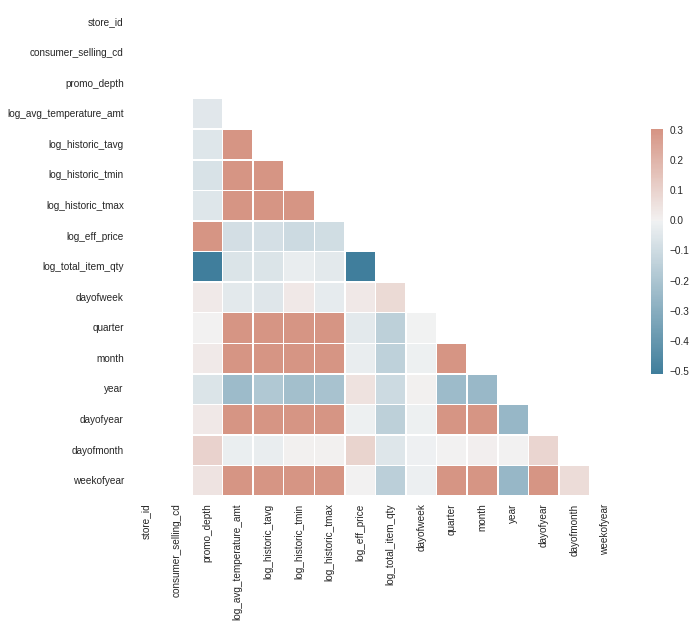

Calling xgboost_regression
Best parameters: {'subsample': 0.6, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.8999999999999999}
Lowest RMSE:  0.5192428143044584


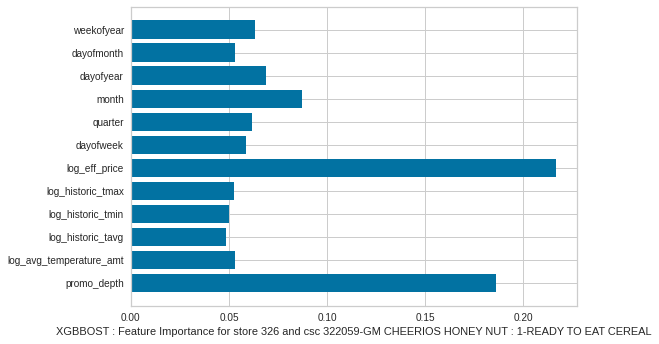

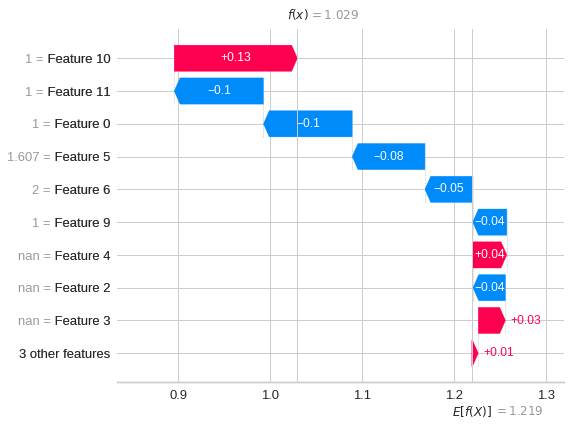

Calling lightgbm_regression
Fitting 5 folds for each of 35 candidates, totalling 175 fits


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


{'subsample': 0.7, 'random_state': 501, 'objective': 'regression', 'num_leaves': 10, 'min_split_gain': 0.01, 'min_data_in_leaf': 10, 'metric': 'mse', 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.5, 'boosting_type': 'gbdt'}


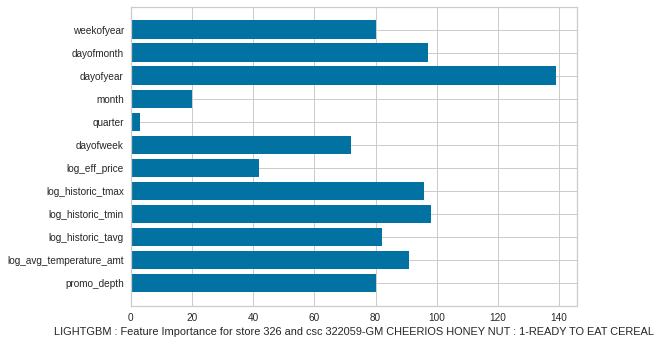

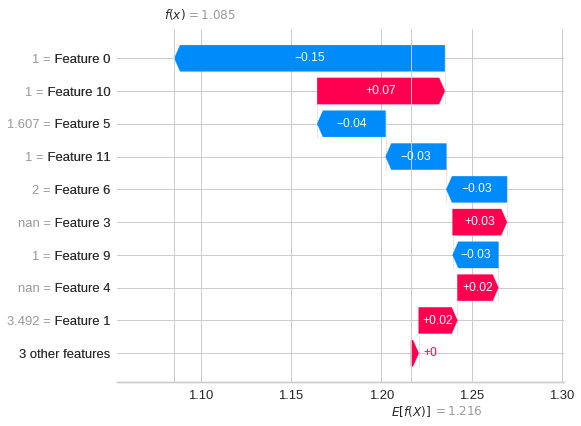

Calling catboost_regression

bestTest = 0.4736341237
bestIteration = 99

0:	loss: 0.4736341	best: 0.4736341 (0)	total: 97.1ms	remaining: 9.23s

bestTest = 0.4547881463
bestIteration = 72

1:	loss: 0.4547881	best: 0.4547881 (1)	total: 144ms	remaining: 6.79s

bestTest = 0.4733173522
bestIteration = 99

2:	loss: 0.4733174	best: 0.4547881 (1)	total: 200ms	remaining: 6.19s

bestTest = 0.4565510657
bestIteration = 70

3:	loss: 0.4565511	best: 0.4547881 (1)	total: 285ms	remaining: 6.57s

bestTest = 0.473741266
bestIteration = 99

4:	loss: 0.4737413	best: 0.4547881 (1)	total: 346ms	remaining: 6.29s

bestTest = 0.4538756898
bestIteration = 69

5:	loss: 0.4538757	best: 0.4538757 (5)	total: 430ms	remaining: 6.45s

bestTest = 0.472561116
bestIteration = 99

6:	loss: 0.4725611	best: 0.4538757 (5)	total: 518ms	remaining: 6.58s

bestTest = 0.4555183706
bestIteration = 69

7:	loss: 0.4555184	best: 0.4538757 (5)	total: 566ms	remaining: 6.23s

bestTest = 0.4643034309
bestIteration = 149

8:	loss: 0.4643

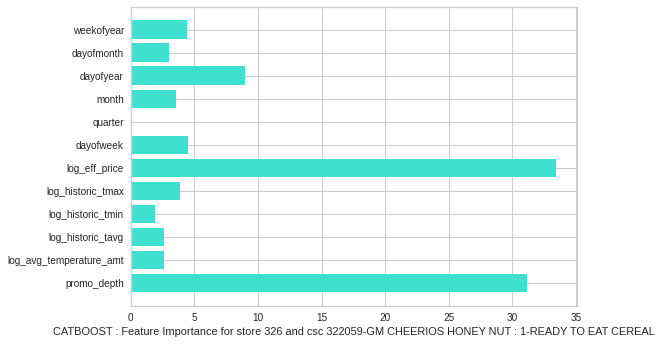

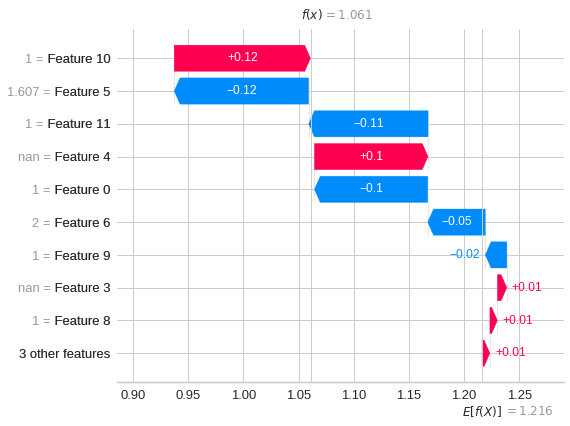

Processing store : 326 and csc : 322060
322060-GM CHEERIOS 1-READY TO EAT CEREAL
Length of train data :  582
Length of test data :  101


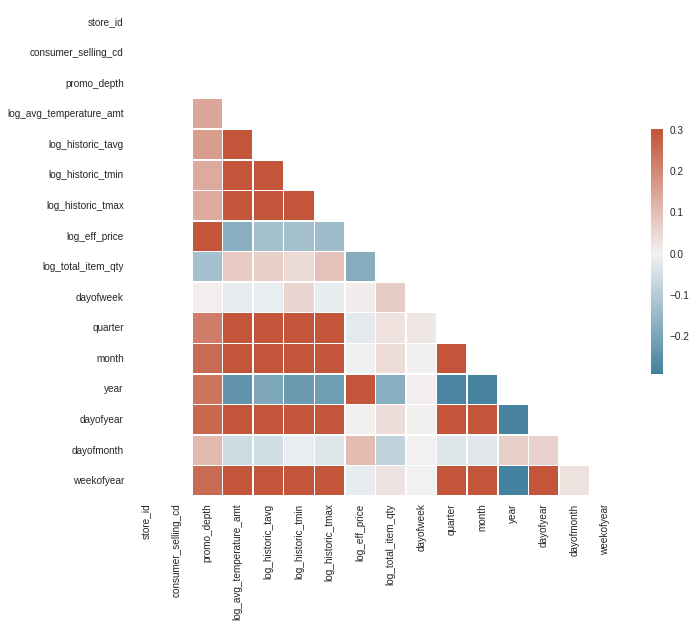

Calling xgboost_regression
Best parameters: {'subsample': 0.8999999999999999, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.7}
Lowest RMSE:  0.36989081151726216


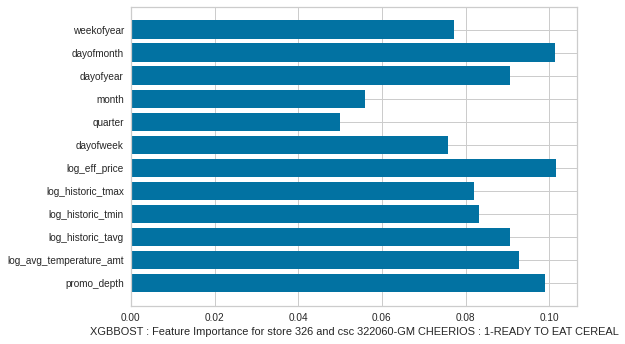

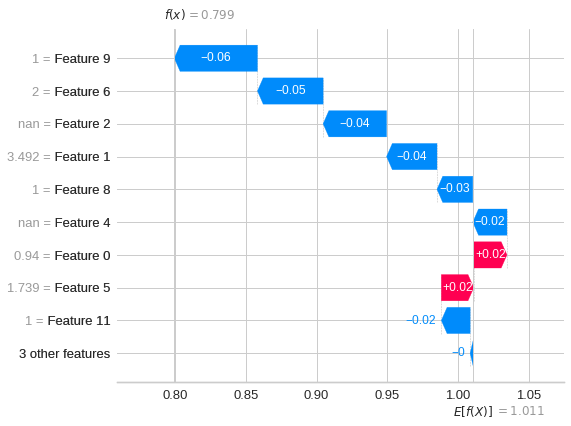

In [ ]:
for e in unique_str_csc_list:

    store, csc = e[0], e[1]
    print(f"Processing store : {store} and csc : {csc}")

    csc_desc          = df_upc_2[df_upc_2['consumer_selling_cd'] == csc]['item_dsc'].values[0]
    smic_group_dsc    = df_upc_2[df_upc_2['consumer_selling_cd'] == csc]['smic_group_dsc'].values[0]
    smic_group_cd     = df_upc_2[df_upc_2['consumer_selling_cd'] == csc]['smic_group_cd'].values[0]
    smic_category_dsc = df_upc_2[df_upc_2['consumer_selling_cd'] == csc]['smic_category_dsc'].values[0]
    smic_category_cd = df_upc_2[df_upc_2['consumer_selling_cd'] == csc]['smic_category_cd'].values[0]
    smic_grp_info    = str(smic_group_cd) + '-' + smic_group_dsc
    smic_ctg_info    = str(smic_category_cd) + '-' + smic_category_dsc
    csc_info         = str(csc) + '-' + csc_desc
    print(csc_info, smic_ctg_info)

    print("Length of train data : ", len(df_train[(df_train.store_id == store) & (df_train.consumer_selling_cd == csc)]))
    print("Length of test data : ", len(df_test[(df_test.store_id == store) & (df_test.consumer_selling_cd == csc)]))
    #print("Length of val data : ", len(df_val[(df_val.store_id == store) & (df_val.consumer_selling_cd == csc)]))
    
    df_train_modified = df_train[(df_train.store_id == store) & (df_train.consumer_selling_cd == csc)]
    df_test_modified = df_test[(df_test.store_id == store) & (df_test.consumer_selling_cd == csc)]
    #df_val_modified = df_val[(df_val.store_id == store) & (df_val.consumer_selling_cd == csc)]

    train_indices = df_train_modified.index
    test_indices = df_test_modified.index
    #val_indices = df_val_modified.index

    X_train = df_train_modified[x_cols].values
    y_train = df_train_modified[y_col].values

    #X_val = df_val_modified[x_cols].values
    #y_val = df_val_modified[y_col].values

    X_test = df_test_modified[x_cols].values
    y_test = df_test_modified[y_col].values

    corr = df_train_modified.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show(block = False)

    print("Calling xgboost_regression")
    y_test_combined_xgbmr = xgboost_regression(X_train, y_train, X_test, y_test, test_indices, store, csc, csc_info, smic_ctg_info, smic_ctg_info)
    df_test_actual_vs_predicted_xgbmr = df_test_actual_vs_predicted_xgbmr.append(y_test_combined_xgbmr)

    print("Calling lightgbm_regression")
    y_test_combined_lgbmr = lightgbm_regression(X_train, y_train, X_test, y_test, test_indices, store, csc, csc_info, smic_ctg_info, smic_ctg_info)
    df_test_actual_vs_predicted_lgbmr = df_test_actual_vs_predicted_lgbmr.append(y_test_combined_lgbmr)
    
    print("Calling catboost_regression")
    y_test_combined_cbstr = catboost_regression(X_train, y_train, X_test, y_test, test_indices, store, csc, csc_info, smic_ctg_info, smic_ctg_info)
    df_test_actual_vs_predicted_cbstr = df_test_actual_vs_predicted_cbstr.append(y_test_combined_cbstr)

In [ ]:
df_test_actual_vs_predicted_xgbmr.index, df_test_actual_vs_predicted_lgbmr.index, df_test_actual_vs_predicted_cbstr.index

(Index(['2022-05-01', '2022-05-02', '2022-05-03', '2022-05-04', '2022-05-05',
        '2022-05-06', '2022-05-07', '2022-05-08', '2022-05-09', '2022-05-10',
        ...
        '2022-07-18', '2022-07-23', '2022-07-30', '2022-08-03', '2022-08-07',
        '2022-08-11', '2022-08-14', '2022-08-17', '2022-08-19', '2022-08-20'],
       dtype='object', name='day_dt', length=4858),
 Index(['2022-05-01', '2022-05-02', '2022-05-03', '2022-05-04', '2022-05-05',
        '2022-05-06', '2022-05-07', '2022-05-08', '2022-05-09', '2022-05-10',
        ...
        '2022-07-18', '2022-07-23', '2022-07-30', '2022-08-03', '2022-08-07',
        '2022-08-11', '2022-08-14', '2022-08-17', '2022-08-19', '2022-08-20'],
       dtype='object', name='day_dt', length=4858),
 Index(['2022-05-01', '2022-05-02', '2022-05-03', '2022-05-04', '2022-05-05',
        '2022-05-06', '2022-05-07', '2022-05-08', '2022-05-09', '2022-05-10',
        ...
        '2022-07-18', '2022-07-23', '2022-07-30', '2022-08-03', '2022-08-07',


In [ ]:
df_feature_importance_xgbmr = pd.DataFrame(feature_importance_xgbmr_list)
df_feature_importance_xgbmr.columns = ['store_id', 'csc', 'csc_info', 'smic_ctg_info'] + [col + '_feature_importance' for col in x_cols]

df_feature_importance_lgbmr = pd.DataFrame(feature_importance_lgbmr_list)
df_feature_importance_lgbmr.columns = ['store_id', 'csc', 'csc_info', 'smic_ctg_info'] + [col + '_feature_importance' for col in x_cols]

df_feature_importance_cbstr = pd.DataFrame(feature_importance_cbstr_list)
df_feature_importance_cbstr.columns = ['store_id', 'csc', 'csc_info', 'smic_ctg_info'] + [col + '_feature_importance' for col in x_cols]

In [ ]:
df_test_actual_vs_predicted_xgbmr['y_test_actual_transformed'] = df_test_actual_vs_predicted_xgbmr['y_test_actual'].apply(lambda x : np.round(np.exp(x) - 1))
df_test_actual_vs_predicted_xgbmr['y_test_predicted_transformed'] = df_test_actual_vs_predicted_xgbmr['y_test_predicted'].apply(lambda x : np.round(np.exp(x) - 1))

df_test_actual_vs_predicted_lgbmr['y_test_actual_transformed'] = df_test_actual_vs_predicted_lgbmr['y_test_actual'].apply(lambda x : np.round(np.exp(x) - 1))
df_test_actual_vs_predicted_lgbmr['y_test_predicted_transformed'] = df_test_actual_vs_predicted_lgbmr['y_test_predicted'].apply(lambda x : np.round(np.exp(x) - 1))

df_test_actual_vs_predicted_cbstr['y_test_actual_transformed'] = df_test_actual_vs_predicted_cbstr['y_test_actual'].apply(lambda x : np.round(np.exp(x) - 1))
df_test_actual_vs_predicted_cbstr['y_test_predicted_transformed'] = df_test_actual_vs_predicted_cbstr['y_test_predicted'].apply(lambda x : np.round(np.exp(x) - 1))

In [ ]:
wmape_list_xgbmr = df_test_actual_vs_predicted_xgbmr.groupby(['store_id','csc']).apply(lambda x: weighted_mape(x['y_test_actual_transformed'], x['y_test_predicted_transformed']))
wmape_list_xgbmr = np.asarray(wmape_list_xgbmr)
wmape_list_xgbmr = [e.numpy() for e in wmape_list_xgbmr]

df_kpi_xgbmr = df_test_actual_vs_predicted_xgbmr[['store_id', 'csc']].drop_duplicates().reset_index().iloc[:,1:]
df_kpi_xgbmr['wmape'] = wmape_list_xgbmr
df_kpi_xgbmr['accuracy'] = 100 - df_kpi_xgbmr['wmape']
df_kpi_xgbmr.sort_values(by=['accuracy'], ascending = False)

store_id     csc        wmape     accuracy
10       619  322059  23.20000000  76.80000000
4        619  146453  32.75862069  67.24137931
17       619  460913  36.53846154  63.46153846
34       326  146399  37.39554318  62.60445682
33       326  322455  39.70588235  60.29411765
16       619  322625  41.91919192  58.08080808
2        619  146399  42.43542435  57.56457565
19       619  413364  42.50000000  57.50000000
12       619  322087  42.64705882  57.35294118
0        619  146385  42.96875000  57.03125000
35       326  146408  44.16961131  55.83038869
3        619  146408  44.54545455  55.45454545
15       619  322082  45.26315789  54.73684211
13       619  322554  45.28301887  54.71698113
20       326  147065  45.97014925  54.02985075
22       326  322060  46.85466377  53.14533623
5        619  146629  47.25274725  52.74725275
1        619  146393  47.32142857  52.67857143
27       326  460913  48.43750000  51.56250000
25       326  410691  48.57703631  51.42296369
9        619  322058  48.84488449  51.15511551
26       326  460651  49.00542495  50.99457505
36       326  146761  49.93587003  50.06412997
18       619  322557  50.00000000  50.00000000
8        619  322045  50.53763441  49.46236559
14       619  146761  51.85185185  48.14814815
11       619  322060  52.00000000  48.00000000
21       326  322059  52.82258065  47.17741935
30       326  146629  54.07774390  45.92225610
7        619  146835  54.37500000  45.62500000
6        619  146675  54.89690722  45.10309278
38       326  322325  55.34883721  44.65116279
32       326  322389  57.30337079  42.69662921
28       326  466564  58.07560137  41.92439863
31       326  322087  59.06976744  40.93023256
29       326  778229  59.30283224  40.69716776
24       326  322390  59.73154362  40.26845638
23       326  322082  62.86201022  37.13798978
39       326  461103  64.04109589  35.95890411
37       326  146835  87.92079208  12.07920792

In [ ]:
wmape_list_lgbmr = df_test_actual_vs_predicted_lgbmr.groupby(['store_id','csc']).apply(lambda x: weighted_mape(x['y_test_actual_transformed'], x['y_test_predicted_transformed']))
wmape_list_lgbmr = np.asarray(wmape_list_lgbmr)
wmape_list_lgbmr = [e.numpy() for e in wmape_list_lgbmr]

df_kpi_lgbmr = df_test_actual_vs_predicted_lgbmr[['store_id', 'csc']].drop_duplicates().reset_index().iloc[:,1:]
df_kpi_lgbmr['wmape'] = wmape_list_lgbmr
df_kpi_lgbmr['accuracy'] = 100 - df_kpi_lgbmr['wmape']
df_kpi_lgbmr.sort_values(by=['accuracy'], ascending = False)

store_id     csc        wmape     accuracy
10       619  322059  29.60000000  70.40000000
0        619  146385  37.50000000  62.50000000
34       326  146399  38.30083565  61.69916435
33       326  322455  38.97058824  61.02941176
2        619  146399  39.11439114  60.88560886
12       619  322087  41.17647059  58.82352941
15       619  322082  43.68421053  56.31578947
5        619  146629  43.95604396  56.04395604
13       619  322554  44.33962264  55.66037736
19       619  413364  45.00000000  55.00000000
3        619  146408  45.45454545  54.54545455
27       326  460913  45.65972222  54.34027778
17       619  460913  46.15384615  53.84615385
20       326  147065  46.16915423  53.83084577
8        619  322045  46.23655914  53.76344086
4        619  146453  46.55172414  53.44827586
16       619  322625  46.96969697  53.03030303
22       326  322060  46.99927693  53.00072307
35       326  146408  47.91519435  52.08480565
36       326  146761  48.05472424  51.94527576
1        619  146393  49.10714286  50.89285714
9        619  322058  49.50495050  50.49504950
18       619  322557  50.75757576  49.24242424
30       326  146629  50.80030488  49.19969512
21       326  322059  50.80645161  49.19354839
32       326  322389  51.20385233  48.79614767
6        619  146675  51.28865979  48.71134021
26       326  460651  51.89873418  48.10126582
14       619  146761  52.26337449  47.73662551
11       619  322060  53.71428571  46.28571429
7        619  146835  53.75000000  46.25000000
25       326  410691  54.36702650  45.63297350
29       326  778229  55.51198257  44.48801743
31       326  322087  55.70824524  44.29175476
28       326  466564  57.56013746  42.43986254
38       326  322325  60.00000000  40.00000000
24       326  322390  62.63982103  37.36017897
23       326  322082  64.90630324  35.09369676
39       326  461103  67.63698630  32.36301370
37       326  146835  87.32673267  12.67326733

In [ ]:
wmape_list_cbstr = df_test_actual_vs_predicted_cbstr.groupby(['store_id','csc']).apply(lambda x: weighted_mape(x['y_test_actual_transformed'], x['y_test_predicted_transformed']))
wmape_list_cbstr = np.asarray(wmape_list_cbstr)
wmape_list_cbstr = [e.numpy() for e in wmape_list_cbstr]

df_kpi_cbstr = df_test_actual_vs_predicted_cbstr[['store_id', 'csc']].drop_duplicates().reset_index().iloc[:,1:]
df_kpi_cbstr['wmape'] = wmape_list_cbstr
df_kpi_cbstr['accuracy'] = 100 - df_kpi_cbstr['wmape']
df_kpi_cbstr.sort_values(by=['accuracy'], ascending = False)

store_id     csc        wmape     accuracy
10       619  322059  29.60000000  70.40000000
12       619  322087  33.82352941  66.17647059
17       619  460913  36.53846154  63.46153846
0        619  146385  39.06250000  60.93750000
4        619  146453  39.65517241  60.34482759
3        619  146408  40.00000000  60.00000000
34       326  146399  41.08635097  58.91364903
33       326  322455  41.28151261  58.71848739
13       619  322554  41.50943396  58.49056604
2        619  146399  42.80442804  57.19557196
5        619  146629  43.40659341  56.59340659
15       619  322082  43.68421053  56.31578947
19       619  413364  45.00000000  55.00000000
20       326  147065  45.77114428  54.22885572
22       326  322060  46.71005061  53.28994939
1        619  146393  47.32142857  52.67857143
35       326  146408  47.56183746  52.43816254
8        619  322045  47.84946237  52.15053763
27       326  460913  48.09027778  51.90972222
7        619  146835  48.75000000  51.25000000
18       619  322557  49.24242424  50.75757576
26       326  460651  49.54792043  50.45207957
9        619  322058  50.16501650  49.83498350
36       326  146761  50.32064985  49.67935015
21       326  322059  50.67204301  49.32795699
38       326  322325  50.85271318  49.14728682
14       619  146761  52.51028807  47.48971193
30       326  146629  52.85823171  47.14176829
6        619  146675  53.35051546  46.64948454
11       619  322060  53.71428571  46.28571429
32       326  322389  53.77207063  46.22792937
28       326  466564  54.98281787  45.01718213
16       619  322625  56.56565657  43.43434343
29       326  778229  56.68845316  43.31154684
25       326  410691  58.19430815  41.80569185
23       326  322082  60.13628620  39.86371380
24       326  322390  60.40268456  39.59731544
31       326  322087  61.75475687  38.24524313
39       326  461103  63.86986301  36.13013699
37       326  146835  92.47524752   7.52475248

In [ ]:
np.exp(1.92986488)-1, np.exp(2.63905733)-1, np.log(5.88857942 + 1)

(5.88857939384694, 13.00000000538638, 1.9298648837965826)

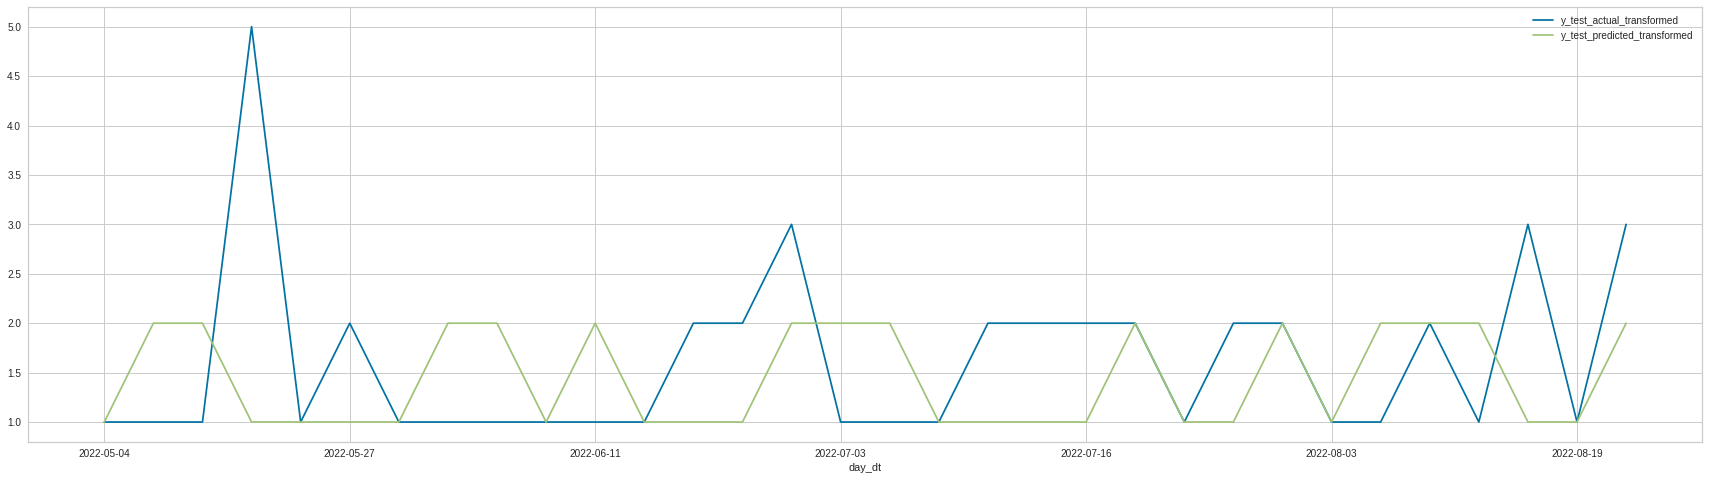

In [ ]:
df_test_actual_vs_predicted_lgbmr[(df_test_actual_vs_predicted_lgbmr.store_id == 326) & (df_test_actual_vs_predicted_lgbmr.csc.isin([461103]))][['y_test_actual_transformed','y_test_predicted_transformed']].plot(figsize=(30,8))

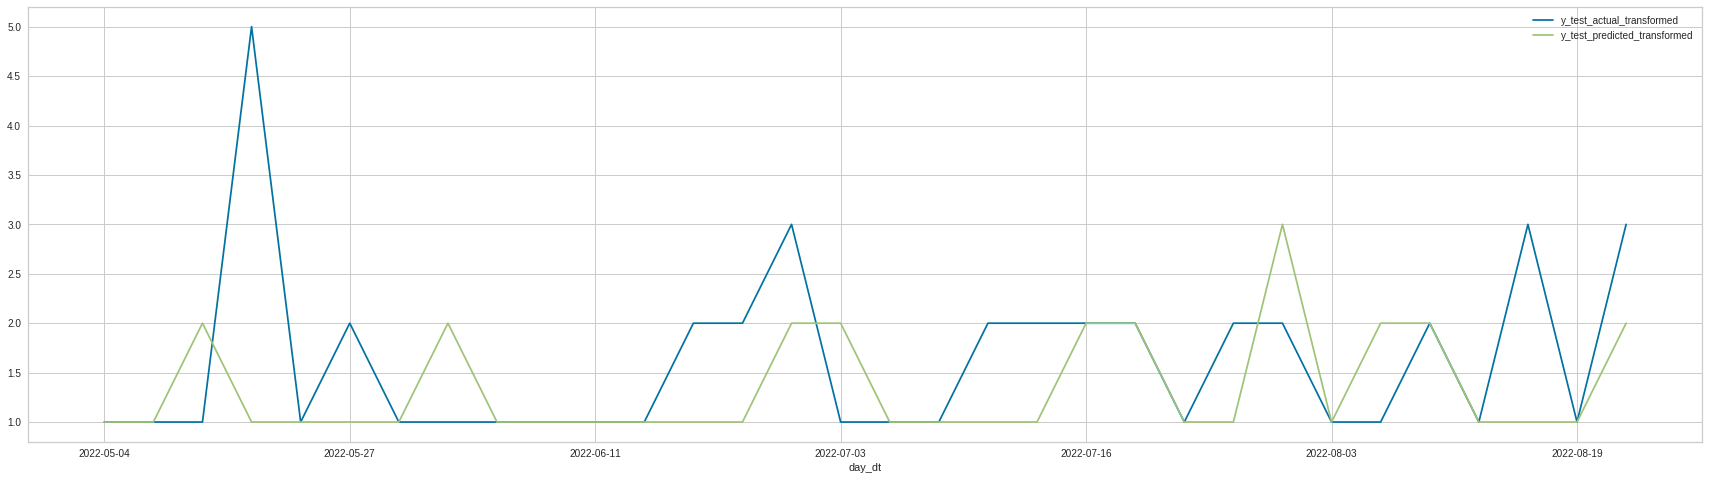

In [ ]:
df_test_actual_vs_predicted_xgbmr[(df_test_actual_vs_predicted_xgbmr.store_id == 326) & (df_test_actual_vs_predicted_xgbmr.csc.isin([461103]))][['y_test_actual_transformed','y_test_predicted_transformed']].plot(figsize=(30,8))

In [ ]:
df_upc_2[df_upc_2.consumer_selling_cd == 322045]

upc_d1_sk     upc_nbr  corporation_id  \
111   62450707  1600012254               1   

                                     item_dsc  \
111  GMILLS CINN TST CRNCH SWTND WHL WHT RICE   

                                     internet_item_dsc  smic_sub_sub_class_id  \
111  GMILLS CINN TST CRNCH SWEETENED WHL WHT RICE C...             1101020101   

     smic_sub_sub_class_cd                smic_sub_sub_class_dsc  \
111                      1  RTE CEREAL MAINSTREAM BOX SWT MID SZ   

     smic_sub_class_id  smic_sub_class_cd  \
111           11010201                  1   

                      smic_sub_class_dsc  smic_class_id  smic_class_cd  \
111  RTE CEREAL MAINSTREAM BOX SWEET -NS         110102              2   

                smic_class_dsc  smic_category_id  smic_category_cd  \
111  RTE CEREAL MAINSTREAM BOX              1101                 1   

       smic_category_dsc  smic_group_id  smic_group_cd        smic_group_dsc  \
111  READY TO EAT CEREAL             11             11  CEREAL AND BREAKFAST   

     section_cd         section_nm  retail_department_id department_nm  \
111         301  GROCERY MAIN MEAL                   301       GROCERY   

     corporate_item_cd  corporate_item_integration_id  consumer_selling_cd  \
111           11013513                           7348               322045   

     primary_consumer_selling_code_ind  prefered_corporate_item_lock_ind  \
111                               True                             False   

    preferred_cic_update_dt preferred_cic_update_cd retail_status_ind  \
111              2018-03-24                       A                 V   

      create_dt  scan_unit_ind  common_retail_cd  brand_cd  \
111  2018-02-26           True             91178         0   

    manufacturer_type_ind  equivalized_unit_fctr  safeway_upc_ind  \
111                     N                   0.75             True   

     equivalized_factor_source_update_ind  own_brands_brand_cd  \
111                                  True                    0   

     own_brands_ind                   dw_create_ts  \
111           False  2022-08-10 06:48:17.000 -0600   

                 dw_last_update_ts  dw_logical_delete_ind  
111  2022-08-12 13:15:42.338 -0600                  False

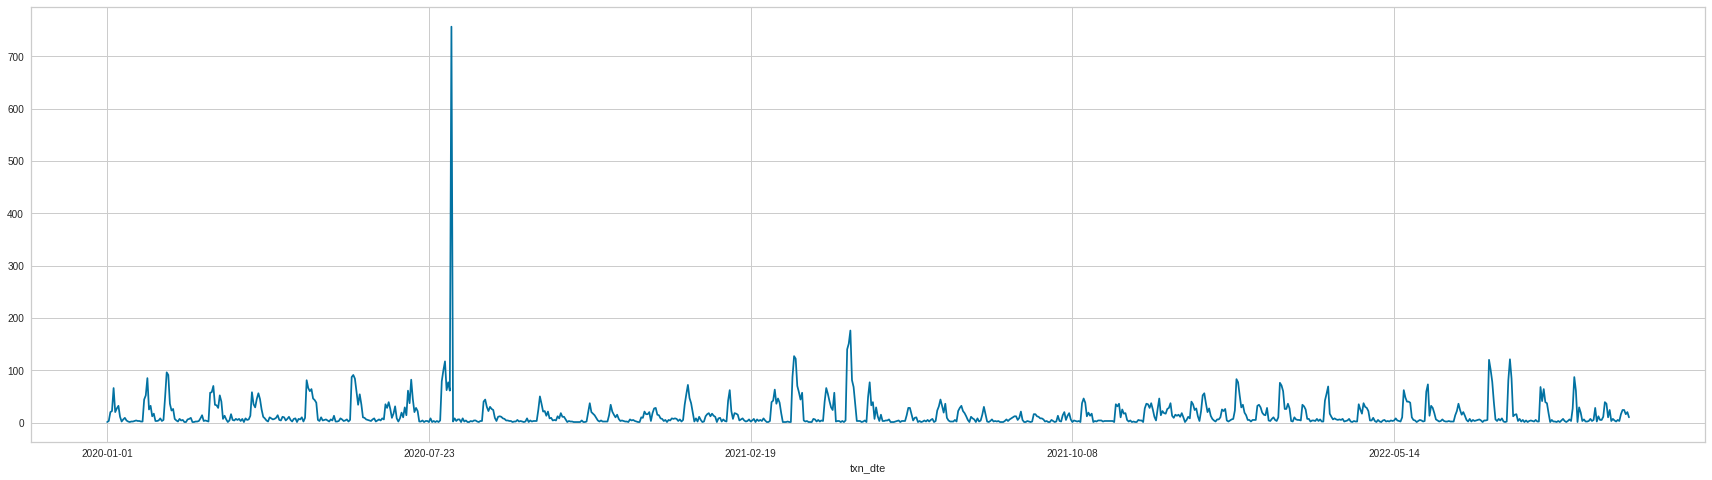

In [ ]:
df_txn[(df_txn.store_id == 619) & (df_txn.consumer_selling_cd.isin([322045]))].set_index('txn_dte')['total_item_qty'].plot(figsize=(30,8))

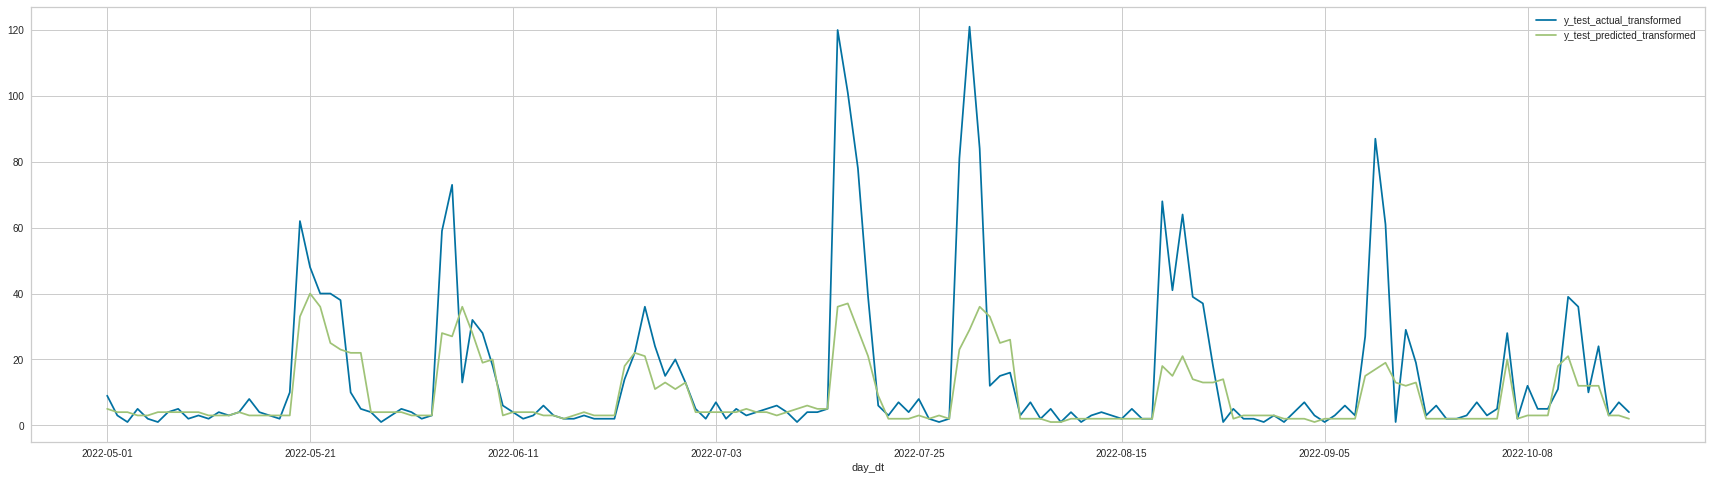

In [ ]:
df_test_actual_vs_predicted_cbstr[(df_test_actual_vs_predicted_cbstr.store_id == 619) & (df_test_actual_vs_predicted_cbstr.csc.isin([322045]))][['y_test_actual_transformed','y_test_predicted_transformed']].plot(figsize=(30,8))

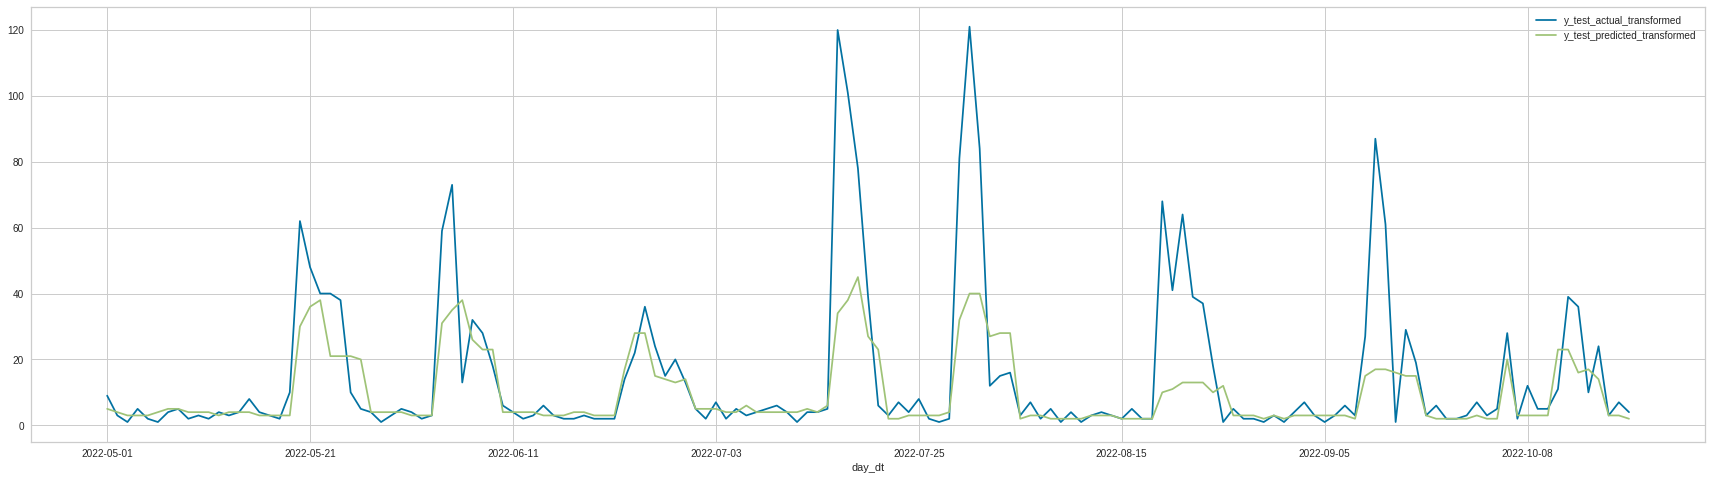

In [ ]:
df_test_actual_vs_predicted_lgbmr[(df_test_actual_vs_predicted_lgbmr.store_id == 619) & (df_test_actual_vs_predicted_lgbmr.csc.isin([322045]))][['y_test_actual_transformed','y_test_predicted_transformed']].plot(figsize=(30,8))

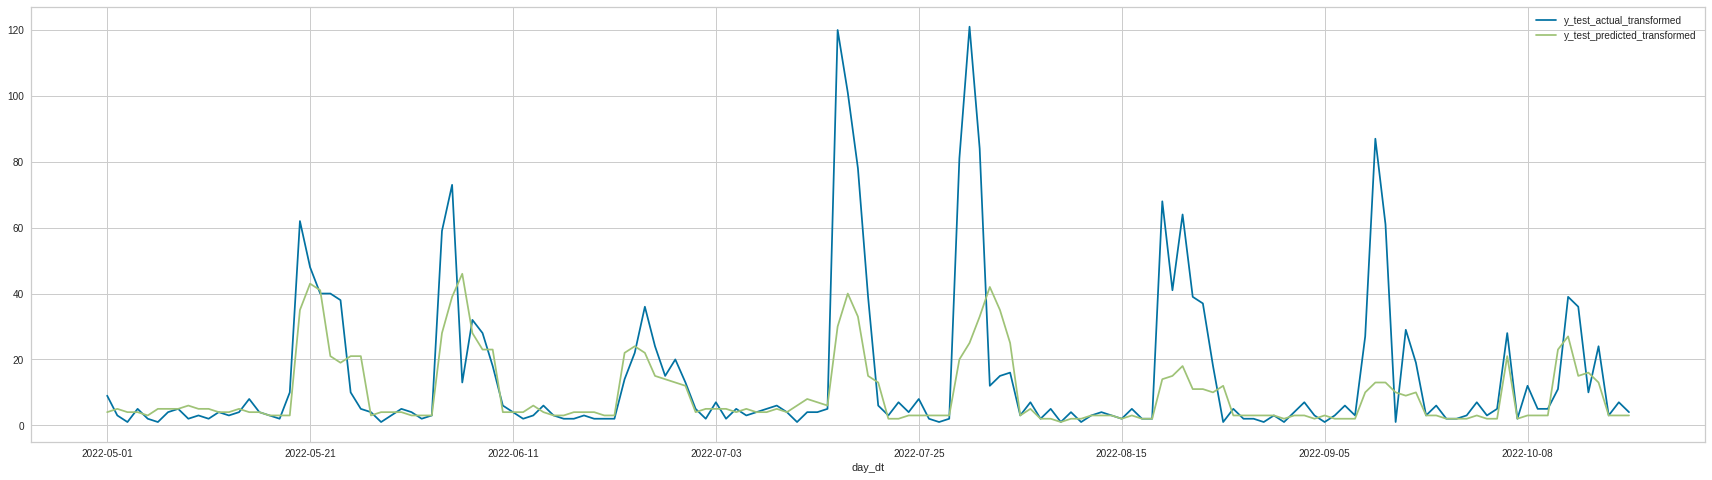

In [ ]:
df_test_actual_vs_predicted_xgbmr[(df_test_actual_vs_predicted_xgbmr.store_id == 619) & (df_test_actual_vs_predicted_xgbmr.csc.isin([322045]))][['y_test_actual_transformed','y_test_predicted_transformed']].plot(figsize=(30,8))

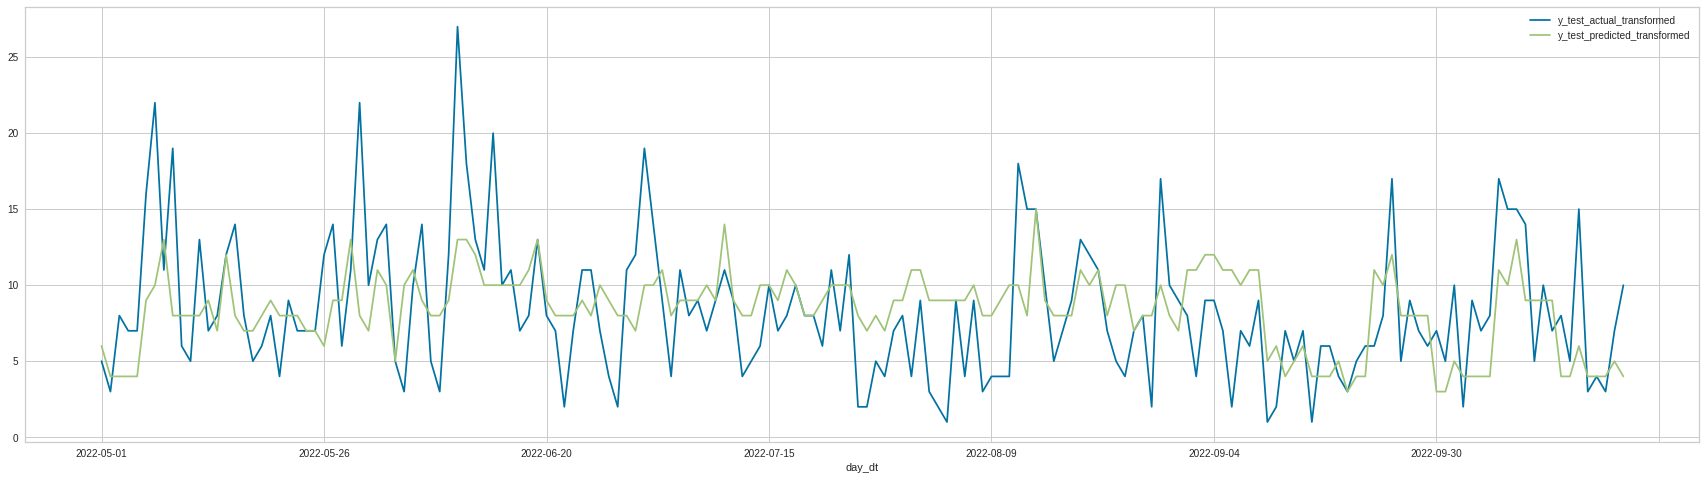

In [ ]:
df_test_actual_vs_predicted_lgbmr[(df_test_actual_vs_predicted_lgbmr.store_id == 619) & (df_test_actual_vs_predicted_lgbmr.csc.isin([322087]))][['y_test_actual_transformed','y_test_predicted_transformed']].plot(figsize=(30,8))

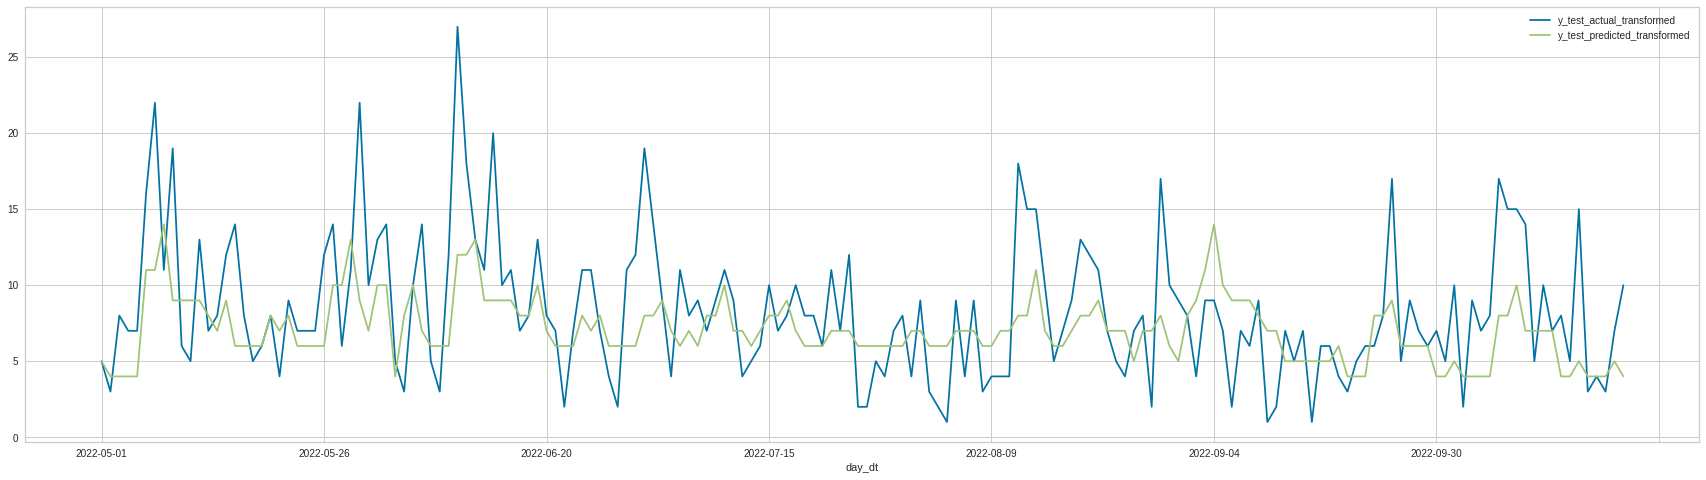

In [ ]:
df_test_actual_vs_predicted_xgbmr[(df_test_actual_vs_predicted_xgbmr.store_id == 619) & (df_test_actual_vs_predicted_xgbmr.csc.isin([322087]))][['y_test_actual_transformed','y_test_predicted_transformed']].plot(figsize=(30,8))

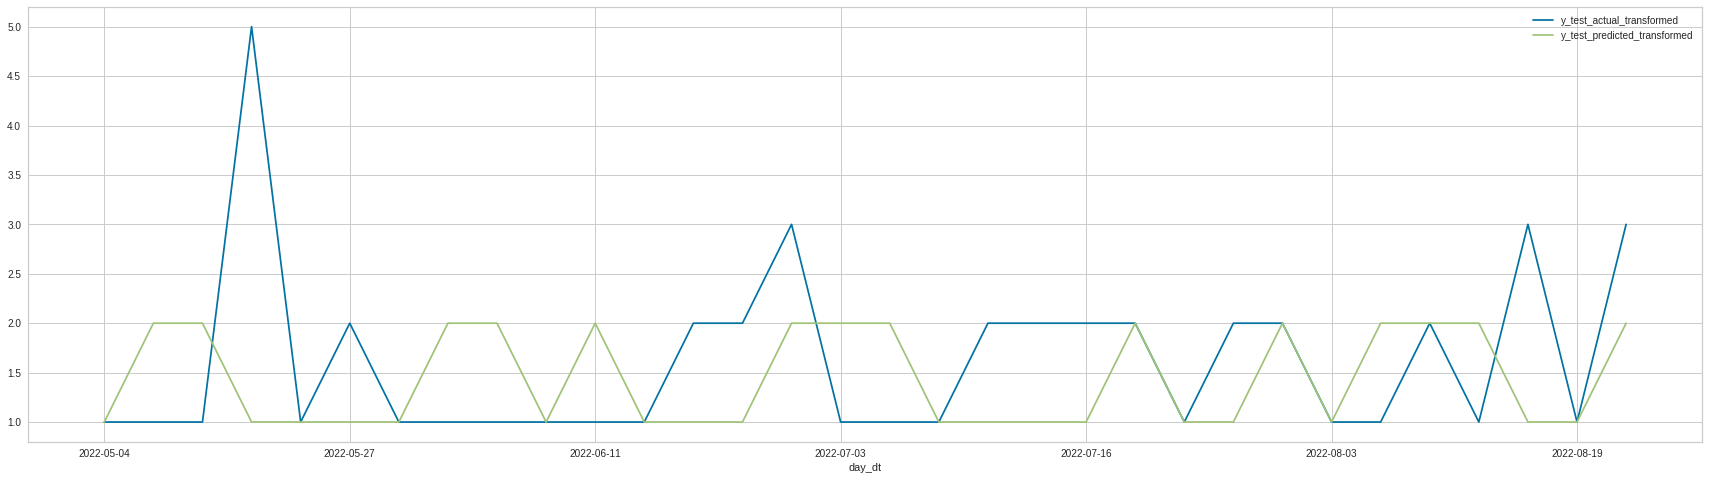

In [ ]:
df_test_actual_vs_predicted_lgbmr[(df_test_actual_vs_predicted_lgbmr.store_id == 326) & (df_test_actual_vs_predicted_lgbmr.csc == 461103)][['y_test_actual_transformed','y_test_predicted_transformed']].plot(figsize=(30,8))

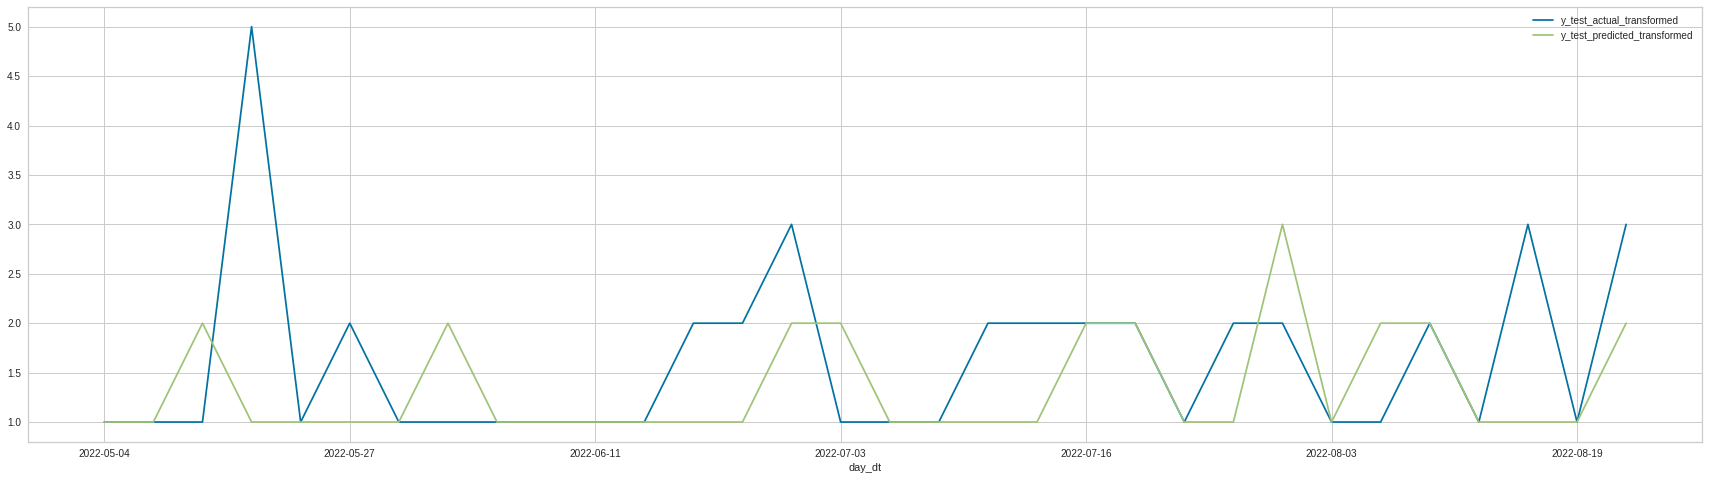

In [ ]:
df_test_actual_vs_predicted_xgbmr[(df_test_actual_vs_predicted_xgbmr.store_id == 326) & (df_test_actual_vs_predicted_xgbmr.csc == 461103)][['y_test_actual_transformed','y_test_predicted_transformed']].plot(figsize=(30,8))

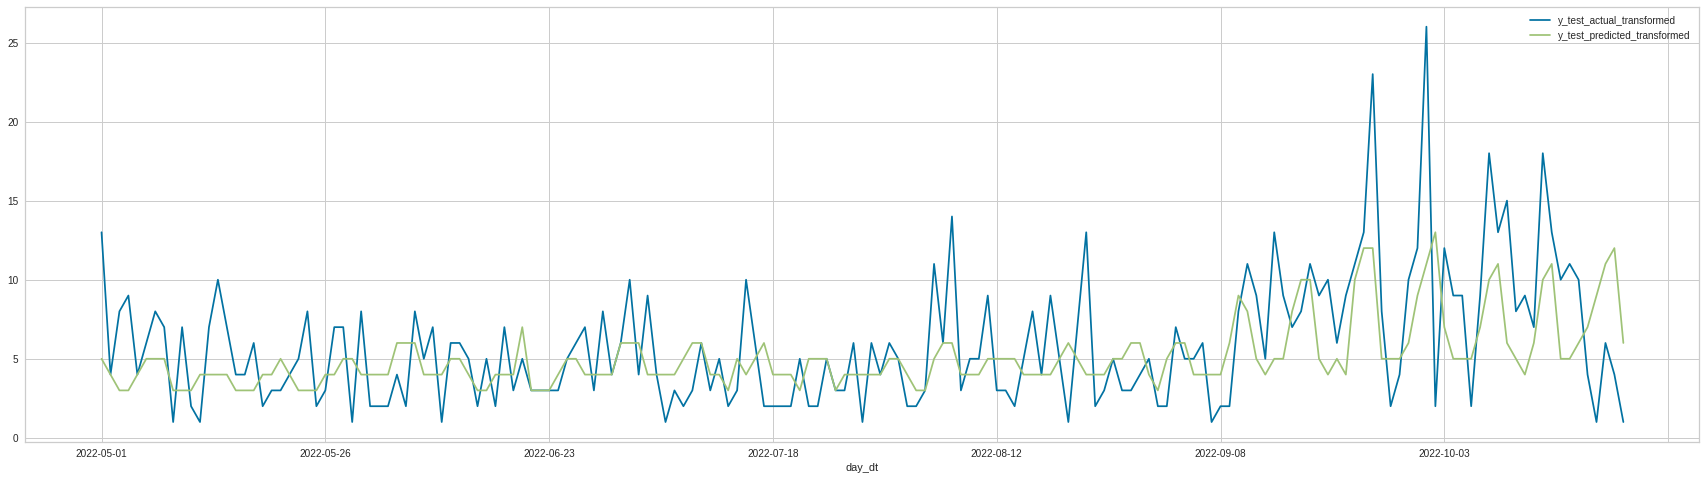

In [ ]:
df_test_actual_vs_predicted_lgbmr[(df_test_actual_vs_predicted_lgbmr.store_id == 619) & (df_test_actual_vs_predicted_lgbmr.csc == 146385)][['y_test_actual_transformed','y_test_predicted_transformed']].plot(figsize=(30,8))

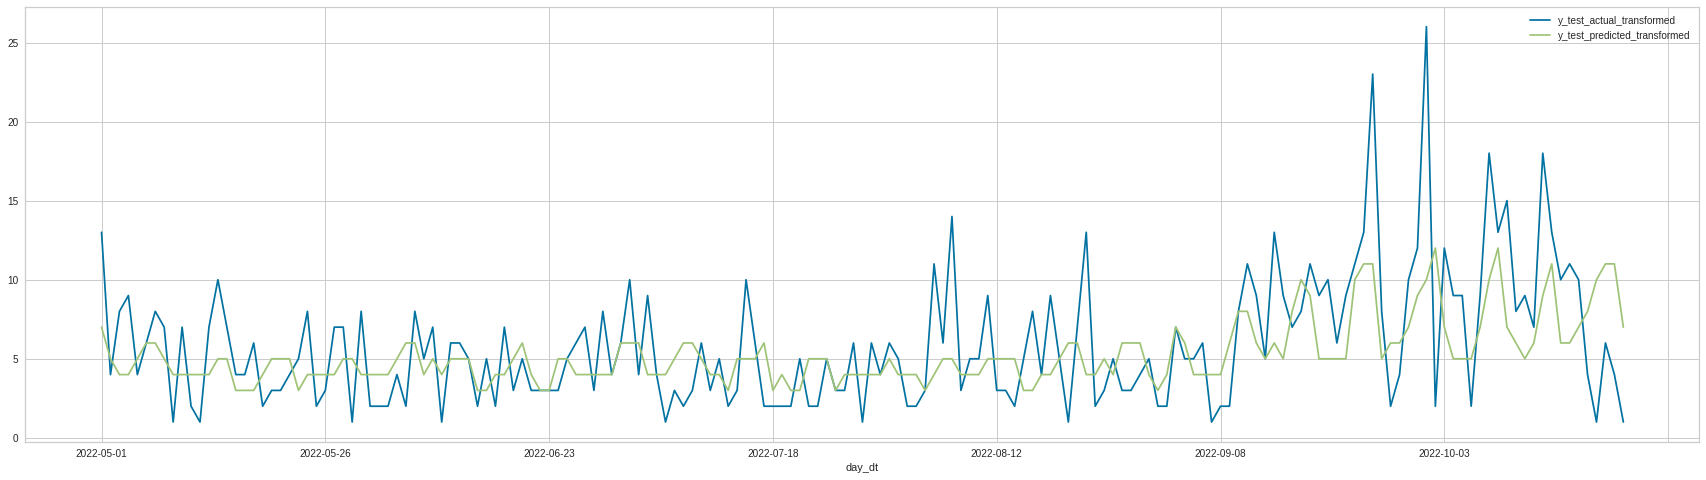

In [ ]:
df_test_actual_vs_predicted_xgbmr[(df_test_actual_vs_predicted_xgbmr.store_id == 619) & (df_test_actual_vs_predicted_xgbmr.csc == 146385)][['y_test_actual_transformed','y_test_predicted_transformed']].plot(figsize=(30,8))

In [94]:
len(df_test_actual_vs_predicted_cbstr)

0

In [ ]:
df_test_actual_vs_predicted_xgbmr_copy = df_test_actual_vs_predicted_xgbmr.reset_index().copy()
df_test_actual_vs_predicted_lgbmr_copy = df_test_actual_vs_predicted_lgbmr.reset_index().copy()
df_test_actual_vs_predicted_cbstr_copy = df_test_actual_vs_predicted_cbstr.reset_index().copy()

df_test_actual_vs_predicted_xgbmr_copy.columns = ['day_dt', 'y_test_actual_xgbmr', 'y_test_predicted_xgbmr', 'store_id', 'csc', 'y_test_actual_transformed_xgbmr', 'y_test_predicted_transformed_xgbmr']
df_test_actual_vs_predicted_lgbmr_copy.columns = ['day_dt', 'y_test_actual_lgbmr', 'y_test_predicted_lgbmr', 'store_id', 'csc', 'y_test_actual_transformed_lgbmr', 'y_test_predicted_transformed_lgbmr']
df_test_actual_vs_predicted_cbstr_copy.columns = ['day_dt', 'y_test_actual_lgbmr', 'y_test_predicted_lgbmr', 'store_id', 'csc', 'y_test_actual_transformed_cbstr', 'y_test_predicted_transformed_cbstr']

df_stacked = pd.merge(df_test_actual_vs_predicted_xgbmr_copy, df_test_actual_vs_predicted_lgbmr_copy, df_test_actual_vs_predicted_cbstr_copy, how = 'inner', on = ['day_dt', 'store_id', 'csc'])
df_stacked['stacked_prediction'] = df_stacked.apply(lambda x : np.round((x.y_test_predicted_transformed_xgbmr + x.y_test_predicted_transformed_lgbmr + x.y_test_predicted_transformed_cbstr) / 2), axis = 1)
df_stacked

TypeError: ignored

In [ ]:
df_stacked_refined = df_stacked[['day_dt', 'store_id', 'csc', 'y_test_actual_transformed_xgbmr', 'stacked_prediction']]
#df_stacked_refined.set_index('day_dt', inplace = True)
df_stacked_refined.columns = ['day_dt', 'store_id', 'csc', 'y_test_actual_transformed', 'y_test_predicted_transformed']

wmape_list_stacked = df_stacked.groupby(['store_id','csc']).apply(lambda x: weighted_mape(x['y_test_actual_transformed_xgbmr'], x['stacked_prediction']))
wmape_list_stacked = np.asarray(wmape_list_stacked)
wmape_list_stacked = [e.numpy() for e in wmape_list_stacked]

df_kpi_stacked = df_stacked[['store_id', 'csc']].drop_duplicates().reset_index().iloc[:,1:]
df_kpi_stacked['wmape'] = wmape_list_stacked
df_kpi_stacked['accuracy'] = 100 - df_kpi_stacked['wmape']
df_kpi_stacked.sort_values(by=['accuracy'], ascending = False)

# ***Aggregate Forecast to Week Level***

In [ ]:
df_train.columns

In [ ]:
df_txn_weekly = pd.merge(df_txn[df_txn.txn_dte <= '2022-04-30'], df_day_week, how = 'inner', left_on = 'txn_dte', right_on = 'date_val').groupby(['week_start_date', 'week_end_date', 'store_id', 'consumer_selling_cd']).agg({'total_item_qty' : np.sum}).reset_index()
#df_txn_weekly['week_end_date'] = pd.to_datetime(df_txn_weekly['week_end_date'])
df_txn_weekly.set_index('week_end_date', inplace = True)
df_txn_weekly.iloc[0]

In [ ]:
#df_fcst_actual_week = pd.merge(df_test_actual_vs_predicted_xgbmr.reset_index(), df_day_week, how = 'inner', left_on = 'day_dt', right_on = 'date_val')
df_fcst_actual_week = pd.merge(df_stacked_refined.reset_index(), df_day_week, how = 'inner', left_on = 'day_dt', right_on = 'date_val')

In [ ]:
df_fcst_actual_week.columns

In [ ]:
df_fcst_actual_week.iloc[0]

In [ ]:
df_fcst_actual_week_refined = df_fcst_actual_week[['store_id', 'csc', 'day_dt', 'y_test_actual_transformed', 'y_test_predicted_transformed', 'week_start_date', 'week_end_date']]

In [ ]:
df_fcst_actual_week_refined.iloc[0]

In [ ]:
df_test_act_vs_pred_wkly = df_fcst_actual_week_refined.groupby(['store_id', 'csc', 'week_start_date', 'week_end_date']).agg({'y_test_actual_transformed' : np.sum, 'y_test_predicted_transformed' : np.sum}).reset_index()

In [ ]:
df_fcst_actual_week_refined

In [ ]:
df_test_act_vs_pred_wkly

In [ ]:
df_kpi_wkly = df_test_act_vs_pred_wkly[['store_id', 'csc']].drop_duplicates()
wkly_wmape_list = df_test_act_vs_pred_wkly.groupby(['store_id','csc']).apply(lambda x: weighted_mape(x['y_test_actual_transformed'], x['y_test_predicted_transformed']))

wkly_wmape_list = np.asarray(wkly_wmape_list)
wkly_wmape_list = [e.numpy() for e in wkly_wmape_list]
wkly_wmape_list

df_kpi_wkly['wmape_wkly'] = wkly_wmape_list
df_kpi_wkly['accuracy_wkly'] = 100 - df_kpi_wkly['wmape_wkly']
df_kpi_wkly.sort_values(by=['accuracy_wkly'], ascending = False, inplace = True)
df_kpi_wkly

In [ ]:
df_test_act_vs_pred_wkly.columns

In [ ]:
df_test_act_vs_pred_wkly.index

In [ ]:
orig_df_test_act_vs_pred_wkly = df_test_act_vs_pred_wkly.copy()

In [ ]:
df_test_act_vs_pred_wkly = pd.merge(df_test_act_vs_pred_wkly, df_str_zip, how='inner', on = ['store_id'])
df_test_act_vs_pred_wkly

In [ ]:
df_wkly = pd.merge(df_test_act_vs_pred_wkly, df_wkly_weather_stats, how = 'inner', on = ['zip5', 'store_id', 'week_start_date', 'week_end_date'])
df_wkly = pd.merge(df_wkly, df_upc_2[['consumer_selling_cd', 'item_dsc', 'smic_group_cd', 'smic_group_dsc', 'smic_category_cd', 'smic_category_dsc']], how = 'inner', left_on = 'csc', right_on = 'consumer_selling_cd')
df_wkly.drop(columns = ['consumer_selling_cd'], inplace = True)
#df_wkly.set_index(['week_end_date'], inplace = True)
df_wkly.iloc[0]

In [ ]:
df_wkly.index

In [ ]:
df_wkly_weather_stats.columns

In [ ]:
df_txn_weekly[(df_txn_weekly.store_id == 619) & (df_txn_weekly.consumer_selling_cd == 413364)]

In [ ]:
df_wkly

In [ ]:
#fig, ax = plt.subplots(figsize=(20, 9))
#sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(20,9)})

ax = sns.lineplot(data=df_wkly_weather_stats[df_wkly_weather_stats.store_id.astype(int) == 619], x ='week_end_date', y = 'wkly_avg_high_temperature_amt',
                  palette='viridis',
                  lw=3)
ax = sns.lineplot(data=df_wkly_weather_stats[df_wkly_weather_stats.store_id.astype(int) == 619], x ='week_end_date', y = 'wkly_avg_temperature_amt',
                  palette='viridis',
                  lw=3)
ax = sns.lineplot(data=df_wkly_weather_stats[df_wkly_weather_stats.store_id.astype(int) == 619], x ='week_end_date', y = 'wkly_avg_low_temperature_amt',
                  palette='viridis',
                  lw=3)
ax.fill_between(df_wkly_weather_stats[df_wkly_weather_stats.store_id.astype(int) == 619].index, df_wkly_weather_stats[df_wkly_weather_stats.store_id.astype(int) == 619].wkly_avg_high_temperature_amt)
ax.fill_between(df_wkly_weather_stats[df_wkly_weather_stats.store_id.astype(int) == 619].index, df_wkly_weather_stats[df_wkly_weather_stats.store_id.astype(int) == 619].wkly_avg_temperature_amt)
ax.fill_between(df_wkly_weather_stats[df_wkly_weather_stats.store_id.astype(int) == 619].index, df_wkly_weather_stats[df_wkly_weather_stats.store_id.astype(int) == 619].wkly_avg_low_temperature_amt)

ax = sns.lineplot(data=df_txn_weekly[(df_txn_weekly.store_id == 619) & (df_txn_weekly.consumer_selling_cd == 413364)].reset_index(), x ='week_end_date', y = 'total_item_qty',
                  palette='magma',
                  lw=3)
ax = sns.lineplot(data=df_wkly[(df_wkly.store_id == 619) & (df_wkly.csc == 413364)], x ='week_end_date', y = 'y_test_actual_transformed',
                  palette='magma',
                  lw=3)
ax = sns.lineplot(data=df_wkly[(df_wkly.store_id == 619) & (df_wkly.csc == 413364)], x ='week_end_date', y = 'y_test_predicted_transformed',
                  palette='magma',
                  lw=3)
ax.vlines(x=120, ymin=-10, ymax=100, color='black', ls='solid', linewidth = 4)

ax.xaxis.set_major_locator(ticker.MultipleLocator(12))
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Date')
plt.show()

In [ ]:
df_wkly_weather_stats[df_wkly_weather_stats.store_id.astype(int) == 326].head()

In [ ]:
df_wkly_weather_stats.iloc[0]

In [ ]:
#fig, ax = plt.subplots(figsize=(20, 9))
#sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(20,9)})

ax = sns.lineplot(data=df_wkly_weather_stats[df_wkly_weather_stats.store_id.astype(int) == 326], x ='week_end_date', y = 'wkly_avg_high_temperature_amt',
                  palette='viridis',
                  lw=3)
ax = sns.lineplot(data=df_wkly_weather_stats[df_wkly_weather_stats.store_id.astype(int) == 326], x ='week_end_date', y = 'wkly_avg_temperature_amt',
                  palette='viridis',
                  lw=3)
ax = sns.lineplot(data=df_wkly_weather_stats[df_wkly_weather_stats.store_id.astype(int) == 326], x ='week_end_date', y = 'wkly_avg_low_temperature_amt',
                  palette='viridis',
                  lw=3)

ax.fill_between(df_wkly_weather_stats[df_wkly_weather_stats.store_id.astype(int) == 326].week_end_date, df_wkly_weather_stats[df_wkly_weather_stats.store_id.astype(int) == 326].wkly_avg_high_temperature_amt)
ax.fill_between(df_wkly_weather_stats[df_wkly_weather_stats.store_id.astype(int) == 326].week_end_date, df_wkly_weather_stats[df_wkly_weather_stats.store_id.astype(int) == 326].wkly_avg_temperature_amt)
ax.fill_between(df_wkly_weather_stats[df_wkly_weather_stats.store_id.astype(int) == 326].week_end_date, df_wkly_weather_stats[df_wkly_weather_stats.store_id.astype(int) == 326].wkly_avg_low_temperature_amt)

ax = sns.lineplot(data=df_txn_weekly[(df_txn_weekly.store_id == 326) & (df_txn_weekly.consumer_selling_cd == 778229)].reset_index(), x ='week_end_date', y = 'total_item_qty',
                  palette='magma',
                  lw=3)
ax = sns.lineplot(data=df_wkly[(df_wkly.store_id == 326) & (df_wkly.csc == 778229)], x ='week_end_date', y = 'y_test_actual_transformed',
                  palette='magma',
                  lw=3)
ax = sns.lineplot(data=df_wkly[(df_wkly.store_id == 326) & (df_wkly.csc == 778229)], x ='week_end_date', y = 'y_test_predicted_transformed',
                  palette='magma',
                  lw=3)
ax.vlines(x=120, ymin=-10, ymax=100, color='black', ls='solid', linewidth = 4)

ax.xaxis.set_major_locator(ticker.MultipleLocator(12))

plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Date')
plt.show()

In [ ]:
#fig, ax = plt.subplots(figsize=(20, 9))
#sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(20,9)})

ax = sns.lineplot(data=df_wkly_weather_stats[df_wkly_weather_stats.store_id.astype(int) == 326], x ='week_end_date', y = 'wkly_avg_high_temperature_amt',
                  palette='viridis',
                  lw=3)
ax = sns.lineplot(data=df_wkly_weather_stats[df_wkly_weather_stats.store_id.astype(int) == 326], x ='week_end_date', y = 'wkly_avg_temperature_amt',
                  palette='viridis',
                  lw=3)
ax = sns.lineplot(data=df_wkly_weather_stats[df_wkly_weather_stats.store_id.astype(int) == 326], x ='week_end_date', y = 'wkly_avg_low_temperature_amt',
                  palette='viridis',
                  lw=3)
ax.fill_between(df_wkly_weather_stats[df_wkly_weather_stats.store_id.astype(int) == 326].week_end_date, df_wkly_weather_stats[df_wkly_weather_stats.store_id.astype(int) == 326].wkly_avg_high_temperature_amt)
ax.fill_between(df_wkly_weather_stats[df_wkly_weather_stats.store_id.astype(int) == 326].week_end_date, df_wkly_weather_stats[df_wkly_weather_stats.store_id.astype(int) == 326].wkly_avg_temperature_amt)
ax.fill_between(df_wkly_weather_stats[df_wkly_weather_stats.store_id.astype(int) == 326].week_end_date, df_wkly_weather_stats[df_wkly_weather_stats.store_id.astype(int) == 326].wkly_avg_low_temperature_amt)

ax = sns.lineplot(data=df_txn_weekly[(df_txn_weekly.store_id == 326) & (df_txn_weekly.consumer_selling_cd == 146761)].reset_index(), x ='week_end_date', y = 'total_item_qty',
                  palette='magma',
                  lw=3)
ax = sns.lineplot(data=df_wkly[(df_wkly.store_id == 326) & (df_wkly.csc == 146761)], x ='week_end_date', y = 'y_test_actual_transformed',
                  palette='magma',
                  lw=3)
ax = sns.lineplot(data=df_wkly[(df_wkly.store_id == 326) & (df_wkly.csc == 146761)], x ='week_end_date', y = 'y_test_predicted_transformed',
                  palette='magma',
                  lw=3)
ax.vlines(x=120, ymin=-10, ymax=100, color='black', ls='solid', linewidth = 4)

ax.xaxis.set_major_locator(ticker.MultipleLocator(12))
#plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Date')
plt.show()

In [ ]:
df_wkly.sort_index(inplace=True)
df_wkly = pd.merge(df_wkly, df_upc[['consumer_selling_cd', 'smic_category_id']], how = 'inner', left_on = 'csc', right_on = 'consumer_selling_cd')
df_wkly.drop(columns = ['consumer_selling_cd'], axis = 1, inplace = True)
df_wkly.sort_values(by=['week_start_date', 'store_id', 'smic_category_id', 'csc'], inplace = True)

In [ ]:
df_wkly.columns

In [ ]:
df_wkly.index

In [ ]:
for e in df_wkly[['store_id', 'csc']].drop_duplicates().values:
    store_id = e[0]
    csc = e[1]
    csc_desc          = df_upc_2[df_upc_2['consumer_selling_cd'] == csc]['item_dsc'].values[0]
    smic_group_dsc    = df_upc_2[df_upc_2['consumer_selling_cd'] == csc]['smic_group_dsc'].values[0]
    smic_group_cd     = df_upc_2[df_upc_2['consumer_selling_cd'] == csc]['smic_group_cd'].values[0]
    smic_category_dsc = df_upc_2[df_upc_2['consumer_selling_cd'] == csc]['smic_category_dsc'].values[0]
    smic_category_cd = df_upc_2[df_upc_2['consumer_selling_cd'] == csc]['smic_category_cd'].values[0]
    smic_grp_info    = str(smic_group_cd) + '-' + smic_group_dsc
    smic_ctg_info    = str(smic_category_cd) + '-' + smic_category_dsc
    csc_info         = str(csc) + '-' + csc_desc
    accuracy = df_kpi_wkly[(df_kpi_wkly.store_id == store_id) & (df_kpi_wkly.csc == csc)]['accuracy_wkly'].values[0]
    #print(store_id, csc_info, smic_ctg_info)

    #fig, ax = plt.subplots(figsize=(20, 9))
    #sns.set_style('darkgrid')
    sns.set(rc={'figure.figsize':(20,8)})

    ax = sns.lineplot(data=df_wkly_weather_stats[df_wkly_weather_stats.store_id.astype(int) == store_id], 
                      x ='week_end_date', 
                      y = 'wkly_avg_high_temperature_amt',
                      palette='viridis',
                      lw=3)
    ax = sns.lineplot(data=df_wkly_weather_stats[df_wkly_weather_stats.store_id.astype(int) == store_id], 
                      x ='week_end_date', 
                      y = 'wkly_avg_temperature_amt',
                      palette='viridis',
                      lw=3)
    ax = sns.lineplot(data=df_wkly_weather_stats[df_wkly_weather_stats.store_id.astype(int) == store_id], 
                      x ='week_end_date', 
                      y = 'wkly_avg_low_temperature_amt',
                      palette='viridis',
                      lw=3)
    ax.fill_between(df_wkly_weather_stats[df_wkly_weather_stats.store_id.astype(int) == store_id].week_end_date, 
                    df_wkly_weather_stats[df_wkly_weather_stats.store_id.astype(int) == store_id].wkly_avg_high_temperature_amt)
    ax.fill_between(df_wkly_weather_stats[df_wkly_weather_stats.store_id.astype(int) == store_id].week_end_date, 
                    df_wkly_weather_stats[df_wkly_weather_stats.store_id.astype(int) == store_id].wkly_avg_temperature_amt)
    ax.fill_between(df_wkly_weather_stats[df_wkly_weather_stats.store_id.astype(int) == store_id].week_end_date, 
                    df_wkly_weather_stats[df_wkly_weather_stats.store_id.astype(int) == store_id].wkly_avg_low_temperature_amt)

    ax = sns.lineplot(data=df_txn_weekly[(df_txn_weekly.store_id == store_id) & (df_txn_weekly.consumer_selling_cd == csc)].reset_index(), 
                      x ='week_end_date', 
                      y = 'total_item_qty',
                      palette='magma',
                      lw=3)
    ax = sns.lineplot(data=df_wkly[(df_wkly.store_id == store_id) & (df_wkly.csc == csc)], 
                      x ='week_end_date', 
                      y = 'y_test_actual_transformed',
                      palette='magma',
                      lw=3)
    ax = sns.lineplot(data=df_wkly[(df_wkly.store_id == store_id) & (df_wkly.csc == csc)], 
                      x ='week_end_date', 
                      y = 'y_test_predicted_transformed',
                      palette='magma',
                      lw=3)
    ax.vlines(x=120, 
              ymin=-10, 
              ymax=max(df_txn_weekly[(df_txn_weekly.store_id == store_id) & (df_txn_weekly.consumer_selling_cd == csc)]['total_item_qty'].max(),
                       df_wkly[(df_wkly.store_id == store_id) & (df_wkly.csc == csc)]['y_test_actual_transformed'].max(),
                       df_wkly[(df_wkly.store_id == store_id) & (df_wkly.csc == csc)]['y_test_predicted_transformed'].max(),
                       df_wkly_weather_stats[df_wkly_weather_stats.store_id.astype(int) == store_id]['wkly_avg_high_temperature_amt'].max()
                      ), 
              color='black', 
              ls='solid', 
              linewidth = 4)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(12))
    #plt.legend(bbox_to_anchor=(1, 1))
    plt.xlabel('Date')
    
    #plt.figure(figsize=(200, 100))
    #df_wkly[(df_wkly.store_id == store_id) & (df_wkly.csc == csc)][['y_test_actual_transformed', 'y_test_predicted_transformed', 'wkly_avg_high_temperature_amt', 'wkly_avg_low_temperature_amt', 'wkly_avg_temperature_amt']].plot(figsize=(10, 8))
    #plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    title_string = f"Weekly Forecast Vs Actual along with Weather for store {store_id.astype(str).zfill(5)} and csc {csc_info}, {smic_grp_info}\nForecast accuracy at store-csc-week level {np.round(accuracy)}%"
    #subtitle_string = f"Forecast accuracy at store-csc-week level {np.round(accuracy)}%"
    plt.suptitle(title_string, y=1.00, fontsize=18)
    #plt.title(subtitle_string, y=1.00, fontsize=17)
    plt.savefig('plot_'+ str(store_id).zfill(5) + '_csc_' + str(csc) + '.png')
    plt.show(block = False)
    #plt.savefig('plot_'+ str(store_id).zfill(5) + '_csc_' + str(csc) + '.png')
    #plt.savefig('plot_'+ str(store_id).zfill(5) + '_csc_' + str(csc) + '.pdf', dpi=300)


In [ ]:
df_wkly.head()

In [ ]:
df_wkly.sort_values(by=['week_end_date', 'smic_group_cd', 'csc'], inplace = True)
df_wkly.to_csv('weekly_forecast.csv')

In [ ]:
df_kpi_wkly_extended = pd.merge(df_kpi_wkly, df_upc_2[['consumer_selling_cd','item_dsc','smic_group_dsc','smic_group_cd','smic_category_dsc','smic_category_cd']], how='inner', left_on='csc', right_on='consumer_selling_cd')
df_kpi_wkly_extended.drop(columns = ['consumer_selling_cd'], axis = 1, inplace = True)
df_kpi_wkly_extended

In [ ]:
df_kpi_wkly_extended.groupby(['store_id', 'smic_group_cd']).agg({'accuracy_wkly' : [np.max,np.mean,np.median,np.min]})

In [ ]:
df_kpi_wkly_extended.groupby(['store_id', 'smic_group_cd', 'smic_category_cd']).agg({'accuracy_wkly' : [np.max,np.mean,np.median,np.min]})

In [ ]:
from PIL import Image
import glob
imagelist = []

for idx, image_file_name in enumerate(glob.glob('*.png')):
    #print(image_file_name)
    image = Image.open(image_file_name)
    converted_image = image.convert('RGB')
    imagelist.append(converted_image)
converted_image.save(r'merged_images.pdf',save_all=True, append_images=imagelist[:-1])

# ***End of my experimentation***